In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import util
import random
import embeddings
import nltk

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
EMBEDDING_DIM = 100
HIDDEN_DIM = 100

In [5]:
vocab = embeddings.load_glove()


# language_model = embeddings.load_local_word2vec()
# text = util.get_alphanumeral(collections[0]["texts"][0])
# embeddings.get_doc_embedding(model, text)

In [6]:
#Glove embeddings has single letter words like g, etc.

# "g" in vocab

In [9]:
df = util.get_data("./data/math_final_pairwise.csv")

In [29]:
df_math = util.get_processed_data("./data/collections_math.csv",True)
collections = util.get_collections(df_math)

In [30]:
collections[0]

{'descriptions': array(['  Solve the linear equation:            [1/2] . Please write your answer as a fraction.     ',
        '  If      , then      [1/5]. &nbsp;Please write your answer as a fraction.   ',
        ' Solve the Linear equation:            [2] ',
        ' Solve the linear equation:            [-18] '], dtype='|S92'),
 'id': '0008d66a-753f-4639-8634-81bb3abb3269',
 'resource_ids': array(['231eb4ad-d0e8-4e94-a552-f8bd2358a47a',
        '0b248202-12a9-405b-acd1-4ab8250e4198',
        '2ee6f80f-0851-4cfa-b4bf-2655e9c46ab7',
        '81c6995c-dd95-418e-a8c4-c22d8ccd32e9'], dtype='|S36'),
 'sequence_ids': array([1, 2, 3, 4]),
 'texts': array(['Solve linear equation Solve linear equation Please write answer fraction',
        'nbsp Please write answer fraction',
        'Solve Linear equation Solve Linear equation',
        'Solve linear equation Solve linear equation'], dtype='|S72'),
 'titles': array(['Solve the linear equation: _______', 'If , then _______',
        'Solv

In [28]:
pd.DataFrame.from_dict(collections)

descriptions  \
0     [  Solve the linear equation:            [1/2]...   
1     [I'll say an addition or subtraction sentence....   
2     [Decompose fractions into sums of smaller unit...   
3     [A Maths Dictionary for Kids presents Dictiona...   
4     [There is nothing special about using the func...   
5     [Virtual Nerd presents How Do You Solve a Form...   
6     [ On Saturday night, 23,748 people attended th...   
7     [Add  Fractions with Like Units     \frac{1}{5...   
8     [Change Fractions to Mixed Numbers 3 + 1 =[4],...   
9     [ When someone purchases a new car and begins ...   
10    [YouTube presents The Pythagorean Theorem In E...   
11    [TEXT: Significance Test for Difference of Pro...   
12    [This video shows how to rewrite linear expres...   
13    [Order the following decimals from least to gr...   
14    [Use proportions to find a unit rate or unit c...   
15    [Goes through the steps of proving a quadrilat...   
16    [Label the second quadrant on the coordinate p...   
17    [For each of the following, factor out the gre...   
18    [Determine the value of ? and ? in the followi...   
19    [A textbook chapter on the equation of lines. ...   
20    [Tags, Day 1 Preparing the Learner “Tiling in ...   
21    [Kevin divides 3 pieces of paper into fourths....   
22    [ The correlation   r  &nbsp;for the data in t...   
23    [Khan Academy presents What is Mean, Median an...   
24    [Equivalent Ratios, Present Example 1 by readi...   
25    [Evaluate the expression.  Write the answer as...   
26    [Subtract Fractions with Unlike Units    \frac...   
27    [This video shows step by step approaches and ...   
28    [Use whole number multiplication to express eq...   
29    [Add and subtract multiples of 100, including ...   
...                                                 ...   
4494  [Recognize a digit represents 10 times the val...   
4495  [Model each problem with a tape diagram. Solve...   
4496  [Complete the bar graph using the table with t...   
4497  [Write down another system of two linear equat...   
4498  [Graph each set of three functions in the same...   
4499  [Write Fractions and Decimals    \frac{3}{10}=...   
4500  [ Solve for the variable:    &nbsp; &nbsp;    ...   
4501  [Fun math practice! Improve your skills with f...   
4502  [Simplify the expression by adding the two pol...   
4503  [Solve the word problems using the RDW strateg...   
4504  [This is a quiz on finding angles of elevation...   
4505  [Math is Fun presents Least Common Multiple, a...   
4506  [Measure the lines in inches and centimeters. ...   
4507  [Working with quadratic functions:  a. The ver...   
4508  [Consider the equation ? ⋅ ? ⋅ ? ⋅ ? = 0. What...   
4509  [\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t Wa...   
4510  [Kyra has been babysitting since sixth grade. ...   
4511  [Textbook_Sampling Method, This Concept introd...   
4512  [From 2000 to 2013, the value of the U.S. doll...   
4513  [Your teacher will show you how to use a calcu...   
4514  [Describe how the graph of 𝑦 = 𝑓(𝑥) is prod...   
4515  [Dividing Multi-Digit Numbers Using the Algori...   
4516  [Complete the conversion table. 1.  71 km =  [...   
4517  [Select the number sentence that equals 5., [8...   
4518  [This site will introduce you to the concept o...   
4519  [What is the mean of the data?   186, 181, 176...   
4520  [Determine the mean, median and mode.  12, 12,...   
4521  [The graph in the Exploratory Challenge is mad...   
4522  [Given the rectangular coordinates of Point P ...   
4523  [This textbook chapter on exponential function...   

                                        id  \
0     0008d66a-753f-4639-8634-81bb3abb3269   
1     001bf2c6-8ede-478a-9b8b-d7750488cb1b   
2     00209d65-4e2f-4649-be25-c4731794be6f   
3     0025274f-8826-472b-9ea5-16b55bad990d   
4     00366e2a-f26d-4d9b-8a8c-d0ada390ee77   
5     0047dbfb-ea41-4176-8dd3-400295cfd556   
6     0054df5f-4c05-41b9-87a8-d3268af71910   
7     00619ebd-e3c5

In [22]:
for col in collections:
    lrs = []
    for i,text in enumerate(col["texts"]):
        new_text = ""
        for word in text.split():
            if len(word)>1:
                new_text+=word+" "
        if new_text.strip()!="":
            lrs.append(new_text.strip().lower())
    col["texts"] = lrs

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = []
doc_to_ix = {}
for col in collections:
    for text in col["texts"]:
        if text not in doc_to_ix:
            doc_to_ix[text] = len(doc_to_ix)
            documents.append(text)
vectorizer = TfidfVectorizer()
tf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names()
word_to_ix = {word:index for index, word in enumerate(feature_names)}

In [9]:
train, test = util.get_train_test(collections)

/Users/vibhavagarwal/miniconda2/envs/dl_torch_py2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
training_data = []
for col, label in np.array(train):
    for i in range(len(col)-1):
        training_data.append(([col[i], col[i+1]],label))
        
testing_data = []
for col, label in np.array(test):
    for i in range(len(col)-1):
        testing_data.append(([col[i], col[i+1]],label))

In [27]:
print(len(training_data), len(testing_data))

(32258, 13579)


In [28]:
#Retain only words with POS tag, Noun, Verb, Adverb or Adjective

def keep_pos_NVRJ(text):
    sent = ""
    tagged = nltk.pos_tag(text.strip().split())
    for word, tag in tagged:
        if tag.startswith('N') or tag.startswith('V') or tag.startswith('R') or tag.startswith('J'):
            sent+=word+" "
    return sent.strip()

In [29]:
# for i in doc_to_ix:
#     if doc_to_ix[i] == 0:
#         print (i)

In [18]:
def get_doc_embedding(text, word_embedding_dim):
    global vocab
    global device
    global tf_matrix
    global word_to_ix
    global doc_to_ix
    embeds = []
    text = text.lower()
    for word in text.split():
        if word in vocab:
#             print(word, text)
            tf_idf = tf_matrix[doc_to_ix[text], word_to_ix[word]]
#             if tf_idf == 0:
#                 print("0 tfidf: text", text, "word", word)
            embed = [v * tf_idf for v in vocab[word]]
            embeds.append(torch.tensor(embed, dtype = torch.float, device = device))
        else:
            embeds.append(torch.zeros(word_embedding_dim, device = device, dtype = torch.float))
    embeds = torch.cat(embeds).view(len(text.split()), -1)
    return embeds.sum(dim = 0)/embeds.shape[0]

In [15]:
df.head()

collection_id1                        collection_id2  \
0  bfe09a1a-7cc9-44df-9e70-9b9608af3b04  bfe09a1a-7cc9-44df-9e70-9b9608af3b04   
1  bfe09a1a-7cc9-44df-9e70-9b9608af3b04  bfe09a1a-7cc9-44df-9e70-9b9608af3b04   
2  bfe09a1a-7cc9-44df-9e70-9b9608af3b04  bfe09a1a-7cc9-44df-9e70-9b9608af3b04   
3  bfe09a1a-7cc9-44df-9e70-9b9608af3b04  bfe09a1a-7cc9-44df-9e70-9b9608af3b04   
4  bfe09a1a-7cc9-44df-9e70-9b9608af3b04  bfe09a1a-7cc9-44df-9e70-9b9608af3b04   

   sequence_id1  sequence_id2                          resource_id1  \
0             1             2  46467a0d-6de3-422e-858b-ed55d197a91c   
1             2             3  935b359e-5b7d-4262-9ce3-9e0289a2ea12   
2             3             3  acbd3c7b-413c-4ae9-a12e-daa1157f63c3   
3             3             4  c94e77ce-5949-49fb-8328-e08f9ac31830   
4             4             5  0c5f2e9c-2986-42eb-ad4a-58ce6e80ddf2   

                           resource_id2  \
0  935b359e-5b7d-4262-9ce3-9e0289a2ea12   
1  acbd3c7b-413c-4ae9-a12e-daa1157f63c3   
2  c94e77ce-5949-49fb-8328-e08f9ac31830   
3  0c5f2e9c-2986-42eb-ad4a-58ce6e80ddf2   
4  3552a94d-4586-46cc-8a25-a4e54306332f   

                                               text1  \
0  lesson 3: interpreting and computing division ...   
1  draw model to represent 12 create question or ...   
2  draw model to represent 12/3 a.draw model to r...   
3  8/9÷2/9 write the expression in unit form writ...   
4  9/12÷3/12 write the expression in unit form wr...   

                                               text2  
0  lesson 3: interpreting and computing division ...  
1  draw model to represent 12 create question or ...  
2  draw model to represent 12/3 a.draw model to r...  
3  8/9÷2/9 write the expression in unit form writ...  
4  9/12÷3/12 write the expression in unit form wr...

In [24]:
df['doc2vec_wa_gl'] = df.text1.apply(lambda x: get_doc_embedding(x,EMBEDDING_DIM))

KeyError: 'lesson 3: interpreting and computing division of fraction by fraction-more models (t) begin class with review of how to divide whole number by whole number using model.'

In [31]:
def text_similarity(text1, text2):
    cos = nn.CosineSimilarity(dim = 0)
    embed1 = get_doc_embedding(text1,EMBEDDING_DIM)
    embed2 = get_doc_embedding(text2,EMBEDDING_DIM)
    
    return cos(embed1, embed2)

In [32]:
def word_similarity(word1, word2):
    global vocab
    cos = nn.CosineSimilarity(dim = 0)
    
    word1 = word1.lower()
    word2 = word2.lower()
    
    if word1 in vocab and word2 in vocab:
    
        embed1 = torch.tensor(vocab[word1], dtype = torch.float)
        embed2 = torch.tensor(vocab[word2], dtype = torch.float)
        return cos(embed1, embed2)
    else:
        print ("Word not found in vocabulary")

In [33]:
# for pair, label in training_data:
#     print(text_similarity(pair[0], pair[1]), label)

In [34]:
# correct = 0
# for pair, label in testing_data:
#     if text_similarity(pair[0], pair[1]) > 0.8:
#         pred = 1
#     else:
#         pred = 0
#     if pred == label:
#         correct+=1
# print(correct/len(testing_data))

In [35]:
text1 = "what is the time now"
text2 = "The in sky is bright"

# text1 = keep_pos_NVRJ(text1).split()
# text2 = keep_pos_NVRJ(text2).split()

for word1 in text1.split():
    for word2 in text2.split():
        print (word1, word2, word_similarity(word1,word2))

('what', 'The', tensor(0.7238))
('what', 'in', tensor(0.6513))
('what', 'sky', tensor(0.4045))
('what', 'is', tensor(0.7645))
('what', 'bright', tensor(0.4706))
('is', 'The', tensor(0.8192))
('is', 'in', tensor(0.7871))
('is', 'sky', tensor(0.4343))
('is', 'is', tensor(1.0000))
('is', 'bright', tensor(0.5122))
('the', 'The', tensor(1.))
('the', 'in', tensor(0.9029))
('the', 'sky', tensor(0.5288))
('the', 'is', tensor(0.8192))
('the', 'bright', tensor(0.4566))
('time', 'The', tensor(0.8261))
('time', 'in', tensor(0.8242))
('time', 'sky', tensor(0.4885))
('time', 'is', tensor(0.7322))
('time', 'bright', tensor(0.4272))
('now', 'The', tensor(0.8391))
('now', 'in', tensor(0.8494))
('now', 'sky', tensor(0.4516))
('now', 'is', tensor(0.8341))
('now', 'bright', tensor(0.4560))


In [36]:
def print_word_comparision(text1, text2):
    text1 = keep_pos_NVRJ(text1).split()
    text2 = keep_pos_NVRJ(text2).split()

    for word1 in text1:
        for word2 in text2:
            print (word1, word2, word_similarity(word1,word2))

In [39]:
keep_pos_NVRJ("The in sky is bright")

'sky is bright'

In [57]:
for a,b in np.array(training_data):
    print(a[0])
    print(a[1])

solve using standard algorithm solve using standard algorithm check quotient remainder using multiplication addition


IndexError: list index out of range

In [53]:
for pair, label in np.array(training_data):
#     print(text_similarity(pair[0], pair[1]), label)
    if label == 0 and text_similarity(pair[0], pair[1])>0.8:
        print_word_comparision(pair[0], pair[1])
        print("\n\n")

('decide', 'find', tensor(0.7047))
('decide', 'equivalent', tensor(0.3662))
('decide', 'fractions', tensor(0.0100))
('decide', 'personal', tensor(0.3858))
('decide', 'white', tensor(0.3673))
('decide', 'board', tensor(0.6376))
('decide', 'fill', tensor(0.5762))
('decide', 'unknown', tensor(0.3424))
('decide', 'numbers', tensor(0.4382))
('decide', 'make', tensor(0.7540))
('decide', 'equivalent', tensor(0.3662))
('decide', 'fraction', tensor(0.3129))
('appropriate', 'find', tensor(0.6814))
('appropriate', 'equivalent', tensor(0.5421))
('appropriate', 'fractions', tensor(0.1488))
('appropriate', 'personal', tensor(0.5871))
('appropriate', 'white', tensor(0.3896))
('appropriate', 'board', tensor(0.5102))
('appropriate', 'fill', tensor(0.4720))
('appropriate', 'unknown', tensor(0.3862))
('appropriate', 'numbers', tensor(0.5472))
('appropriate', 'make', tensor(0.7360))
('appropriate', 'equivalent', tensor(0.5421))
('appropriate', 'fraction', tensor(0.3986))
('use', 'find', tensor(0.7181))
('

('means', 'board', tensor(0.5025))
('means', 'fill', tensor(0.5431))
('means', 'unknown', tensor(0.5729))
('means', 'numbers', tensor(0.6830))
('means', 'make', tensor(0.8757))
('means', 'equivalent', tensor(0.6654))
('means', 'fraction', tensor(0.5559))



('solve', 'make', tensor(0.6584))
('solve', 'larger', tensor(0.3976))
('solve', 'units', tensor(0.2347))
('solve', 'make', tensor(0.6584))
('solve', 'larger', tensor(0.3976))
('solve', 'units', tensor(0.2347))
('solve', 'frac', tensor(-0.0469))
('solve', 'frac', tensor(-0.0469))
('solve', 'third', tensor(0.2927))
('drawing', 'make', tensor(0.6409))
('drawing', 'larger', tensor(0.5943))
('drawing', 'units', tensor(0.3614))
('drawing', 'make', tensor(0.6409))
('drawing', 'larger', tensor(0.5943))
('drawing', 'units', tensor(0.3614))
('drawing', 'frac', tensor(-0.3299))
('drawing', 'frac', tensor(-0.3299))
('drawing', 'third', tensor(0.4590))
('chips', 'make', tensor(0.4255))
('chips', 'larger', tensor(0.4071))
('chips', 'units', tenso

('evaluate', 'margin', tensor(0.1953))
('evaluate', 'error', tensor(0.3552))
('evaluate', 'textbook', tensor(0.2866))
('evaluate', 'chapter', tensor(0.2502))
('evaluate', 'helps', tensor(0.6099))
('evaluate', 'explain', tensor(0.7060))
('evaluate', 'properly', tensor(0.6937))
('evaluate', 'plans', tensor(0.5415))
('evaluate', 'conduct', tensor(0.6609))
('evaluate', 'experiment', tensor(0.5771))
('evaluate', 'contains', tensor(0.1897))
('evaluate', 'examples', tensor(0.3885))
('evaluate', 'figures', tensor(0.3058))
('evaluate', 'demonstrate', tensor(0.6841))
('evaluate', 'concepts', tensor(0.5270))
('expression', 'margin', tensor(0.3020))
('expression', 'error', tensor(0.4773))
('expression', 'textbook', tensor(0.3967))
('expression', 'chapter', tensor(0.3576))
('expression', 'helps', tensor(0.4389))
('expression', 'explain', tensor(0.6038))
('expression', 'properly', tensor(0.4293))
('expression', 'plans', tensor(0.1931))
('expression', 'conduct', tensor(0.4469))
('expression', 'experi

('point', 'create', tensor(0.5257))
('point', 'line', tensor(0.7597))
('point', 'best', tensor(0.6125))
('point', 'fit', tensor(0.5839))
('point', 'text', tensor(0.4734))
('point', 'create', tensor(0.5257))
('point', 'line', tensor(0.7597))
('point', 'best', tensor(0.6125))
('point', 'fit', tensor(0.5839))
('round', 'text', tensor(0.3048))
('round', 'create', tensor(0.4034))
('round', 'line', tensor(0.4944))
('round', 'best', tensor(0.6380))
('round', 'fit', tensor(0.5033))
('round', 'text', tensor(0.3048))
('round', 'create', tensor(0.4034))
('round', 'line', tensor(0.4944))
('round', 'best', tensor(0.6380))
('round', 'fit', tensor(0.5033))
('nearest', 'text', tensor(0.1711))
('nearest', 'create', tensor(0.3155))
('nearest', 'line', tensor(0.5948))
('nearest', 'best', tensor(0.2737))
('nearest', 'fit', tensor(0.3148))
('nearest', 'text', tensor(0.1711))
('nearest', 'create', tensor(0.3155))
('nearest', 'line', tensor(0.5948))
('nearest', 'best', tensor(0.2737))
('nearest', 'fit', tens

('group', 'determine', tensor(0.4228))
('group', 'sum', tensor(0.2588))
('group', 'determine', tensor(0.4228))
('group', 'sum', tensor(0.2588))
('group', 'product', tensor(0.4909))
('group', 'even', tensor(0.5031))
('group', 'odd', tensor(0.2283))
('group', 'explain', tensor(0.3574))
('group', 'reasoning', tensor(0.1483))
('count', 'determine', tensor(0.5497))
('count', 'sum', tensor(0.5909))
('count', 'determine', tensor(0.5497))
('count', 'sum', tensor(0.5909))
('count', 'product', tensor(0.3386))
('count', 'even', tensor(0.5151))
('count', 'odd', tensor(0.4361))
('count', 'explain', tensor(0.4864))
('count', 'reasoning', tensor(0.2669))
('multi', 'determine', tensor(0.3491))
('multi', 'sum', tensor(0.3727))
('multi', 'determine', tensor(0.3491))
('multi', 'sum', tensor(0.3727))
('multi', 'product', tensor(0.5644))
('multi', 'even', tensor(0.4139))
('multi', 'odd', tensor(0.2633))
('multi', 'explain', tensor(0.1664))
('multi', 'reasoning', tensor(0.2011))
('digit', 'determine', tenso

('development', 'ways', tensor(0.6638))
('development', 'show', tensor(0.4746))
('development', 'cents', tensor(0.1981))
('development', 'ways', tensor(0.6638))
('development', 'use', tensor(0.5790))
('development', 'fewest', tensor(-0.0111))
('development', 'possible', tensor(0.6000))
('development', 'coins', tensor(-0.0151))
('development', 'right', tensor(0.4170))
('use', 'show', tensor(0.5302))
('use', 'cents', tensor(0.2174))
('use', 'ways', tensor(0.7470))
('use', 'show', tensor(0.5302))
('use', 'cents', tensor(0.2174))
('use', 'ways', tensor(0.7470))
('use', 'use', tensor(1.0000))
('use', 'fewest', tensor(0.1593))
('use', 'possible', tensor(0.7537))
('use', 'coins', tensor(0.4001))
('use', 'right', tensor(0.6192))
('vertical', 'show', tensor(0.2017))
('vertical', 'cents', tensor(0.1591))
('vertical', 'ways', tensor(0.2777))
('vertical', 'show', tensor(0.2017))
('vertical', 'cents', tensor(0.1591))
('vertical', 'ways', tensor(0.2777))
('vertical', 'use', tensor(0.4382))
('vertica

('expression', 'write', tensor(0.3960))
Word not found in vocabulary
('expression', 'newnumber', None)
('expression', 'sentence', tensor(0.4375))
('word', 'solve', tensor(0.4198))
('word', 'draw', tensor(0.3795))
('word', 'tape', tensor(0.5072))
('word', 'diagram', tensor(0.2196))
('word', 'solve', tensor(0.4198))
('word', 'draw', tensor(0.3795))
('word', 'tape', tensor(0.5072))
('word', 'diagram', tensor(0.2196))
('word', 'number', tensor(0.5018))
('word', 'bond', tensor(0.3439))
('word', 'add', tensor(0.4763))
('word', 'subtract', tensor(0.1702))
('word', 'tens', tensor(0.2663))
('word', 'write', tensor(0.6972))
Word not found in vocabulary
('word', 'newnumber', None)
('word', 'sentence', tensor(0.4385))
('variables', 'solve', tensor(0.4035))
('variables', 'draw', tensor(0.1396))
('variables', 'tape', tensor(0.2275))
('variables', 'diagram', tensor(0.5717))
('variables', 'solve', tensor(0.4035))
('variables', 'draw', tensor(0.1396))
('variables', 'tape', tensor(0.2275))
('variables',

('write', 'area', tensor(0.2081))
('write', 'model', tensor(0.3897))
('write', 'first', tensor(0.5037))
('write', 'area', tensor(0.2081))
('write', 'model', tensor(0.3897))
('write', 'show', tensor(0.5561))
('write', 'sixths', tensor(-0.0128))
('write', 'second', tensor(0.3819))
('write', 'area', tensor(0.2081))
('write', 'model', tensor(0.3897))
('write', 'show', tensor(0.5561))
Word not found in vocabulary
('write', 'twelfths', None)
('write', 'show', tensor(0.5561))
('write', 'fractions', tensor(0.1672))
('write', 'composed', tensor(0.3715))
('write', 'renamed', tensor(0.1334))
('write', 'unit', tensor(0.2076))
('write', 'fraction', tensor(0.3402))
('ratio', 'first', tensor(0.3383))
('ratio', 'area', tensor(0.2623))
('ratio', 'model', tensor(0.4212))
('ratio', 'first', tensor(0.3383))
('ratio', 'area', tensor(0.2623))
('ratio', 'model', tensor(0.4212))
('ratio', 'show', tensor(0.2380))
('ratio', 'sixths', tensor(0.2887))
('ratio', 'second', tensor(0.3966))
('ratio', 'area', tensor(0

('introduced', 'video', tensor(0.5205))
('introduced', 'see', tensor(0.5252))
('introduced', 'examples', tensor(0.5629))
('introduced', 'set', tensor(0.6162))
('introduced', 'inputs', tensor(0.3073))
('introduced', 'defined', tensor(0.5585))
('introduced', 'called', tensor(0.7122))
('introduced', 'domain', tensor(0.4026))
('graphs', 'domain', tensor(0.4249))
('graphs', 'function', tensor(0.5370))
('graphs', 'khan', tensor(-0.0160))
('graphs', 'academy', tensor(-0.2210))
('graphs', 'video', tensor(0.2300))
('graphs', 'see', tensor(0.0813))
('graphs', 'examples', tensor(0.3289))
('graphs', 'set', tensor(0.1803))
('graphs', 'inputs', tensor(0.3846))
('graphs', 'defined', tensor(0.5110))
('graphs', 'called', tensor(0.0636))
('graphs', 'domain', tensor(0.4249))
('functions', 'domain', tensor(0.7032))
('functions', 'function', tensor(0.9331))
('functions', 'khan', tensor(0.1729))
('functions', 'academy', tensor(0.2681))
('functions', 'video', tensor(0.3865))
('functions', 'see', tensor(0.427

('decimal', 'corresponding', tensor(0.6268))
('decimal', 'value', tensor(0.4299))
('decimal', 'create', tensor(0.1231))
('decimal', 'table', tensor(0.2395))
('decimal', 'values', tensor(0.3999))
('decimal', 'coordinate', tensor(0.2070))
('decimal', 'times', tensor(0.2274))
('decimal', 'much', tensor(0.1394))
('decimal', 'corresponding', tensor(0.6268))
('decimal', 'value', tensor(0.4299))
('decimal', 'plot', tensor(0.2037))
('decimal', 'point', tensor(0.3907))
('decimal', 'coordinate', tensor(0.2070))
('decimal', 'plane', tensor(0.1212))
('decimal', 'use', tensor(0.2697))
('decimal', 'straightedge', tensor(0.3609))
('decimal', 'draw', tensor(0.1799))
('decimal', 'line', tensor(0.3707))
('decimal', 'connecting', tensor(0.2532))
('decimal', 'points', tensor(0.3798))
('decimal', 'give', tensor(0.1089))
('decimal', 'coordinates', tensor(0.4475))
('decimal', 'points', tensor(0.3798))
('decimal', 'fall', tensor(0.1553))
('decimal', 'line', tensor(0.3707))
('decimal', 'coordinates', tensor(0.

('multiply', 'ones', tensor(0.4013))
('multiply', 'digit', tensor(0.4287))
('multiply', 'draw', tensor(0.2052))
('multiply', 'multiples', tensor(0.6164))
('multiply', 'digit', tensor(0.4287))
('multiply', 'multiples', tensor(0.6164))
('multiply', 'common', tensor(0.2473))
('multiples', 'follow', tensor(0.2096))
('multiples', 'directions', tensor(0.3506))
('multiples', 'follow', tensor(0.2096))
('multiples', 'directions', tensor(0.3506))
('multiples', 'circle', tensor(0.0940))
('multiples', 'red', tensor(-0.0110))
('multiples', 'multiples', tensor(1.0000))
('multiples', 'number', tensor(0.3626))
('multiples', 'multiple', tensor(0.3339))
('multiples', 'possible', tensor(0.1567))
('multiples', 'values', tensor(0.4483))
('multiples', 'ones', tensor(0.3533))
('multiples', 'digit', tensor(0.5187))
('multiples', 'shade', tensor(0.2149))
('multiples', 'green', tensor(-0.1021))
('multiples', 'multiples', tensor(1.0000))
('multiples', 'choose', tensor(0.1846))
('multiples', 'notice', tensor(0.12

('division', 'data', tensor(0.3846))
('division', 'set', tensor(0.5000))
('division', 'make', tensor(0.3762))
('division', 'sketch', tensor(0.0721))
('division', 'residual', tensor(0.1172))
('division', 'plot', tensor(0.2048))
('division', 'axes', tensor(0.1387))
Word not found in vocabulary
('division', 'givenbelow', None)
('division', 'see', tensor(0.3543))
('division', 'clear', tensor(0.3306))
('division', 'curve', tensor(0.1845))
('division', 'residual', tensor(0.1172))
('division', 'plot', tensor(0.2048))
('division', 'say', tensor(0.2476))
('division', 'original', tensor(0.3865))
('division', 'data', tensor(0.3846))
('division', 'set', tensor(0.5000))
('reverse', 'volume', tensor(0.4391))
('reverse', 'temperature', tensor(0.3703))
('reverse', 'water', tensor(0.2963))
('reverse', 'expands', tensor(0.4757))
('reverse', 'heats', tensor(0.3028))
('reverse', 'researchers', tensor(0.3238))
('reverse', 'measured', tensor(0.3930))
('reverse', 'volume', tensor(0.4391))
('reverse', 'millil

('long', 'shown', tensor(0.6059))
('long', 'using', tensor(0.6266))
('long', 'graphing', tensor(-0.1937))
('long', 'calculator', tensor(0.0816))
('long', 'construct', tensor(0.4356))
('long', 'scatter', tensor(0.0093))
('long', 'plot', tensor(0.4778))
('long', 'data', tensor(0.4087))
('long', 'set', tensor(0.7495))
('long', 'include', tensor(0.6259))
('long', 'least', tensor(0.7015))
('long', 'squares', tensor(0.2423))
('long', 'line', tensor(0.6974))
('long', 'graph', tensor(0.1003))
('long', 'make', tensor(0.7694))
('long', 'sketch', tensor(0.2139))
('long', 'scatter', tensor(0.0093))
('long', 'plot', tensor(0.4778))
('long', 'including', tensor(0.6668))
('long', 'least', tensor(0.7015))
('long', 'squares', tensor(0.2423))
('long', 'line', tensor(0.6974))
('long', 'using', tensor(0.6266))
('long', 'calculator', tensor(0.0816))
('long', 'construct', tensor(0.4356))
('long', 'residual', tensor(0.2200))
('long', 'plot', tensor(0.4778))
('long', 'data', tensor(0.4087))
('long', 'set', te

('solve', 'value', tensor(0.3691))
('solve', 'number', tensor(0.3592))
('solve', 'use', tensor(0.5232))
('solve', 'words', tensor(0.4252))
('solve', 'number', tensor(0.3592))
('solve', 'line', tensor(0.3163))
('solve', 'explain', tensor(0.7144))
Word not found in vocabulary
('solve', 'yourreasoning', None)
('solve', 'include', tensor(0.4128))
('solve', 'midpoint', tensor(-0.0120))
('solve', 'number', tensor(0.3592))
('solve', 'line', tensor(0.3163))
('solve', 'minimum', tensor(0.3780))
('solve', 'possible', tensor(0.7040))
('solve', 'value', tensor(0.3691))
('solve', 'decimal', tensor(0.0860))
('solve', 'use', tensor(0.5232))
('solve', 'words', tensor(0.4252))
('solve', 'pictures', tensor(0.1051))
('solve', 'numbers', tensor(0.3435))
('solve', 'explain', tensor(0.7144))
Word not found in vocabulary
('solve', 'yourreasoning', None)
('use', 'maximum', tensor(0.5092))
('use', 'possible', tensor(0.7537))
('use', 'value', tensor(0.5712))
('use', 'number', tensor(0.6502))
('use', 'decimal', 

('side', 'midpoint', tensor(0.2604))
('side', 'number', tensor(0.5197))
('side', 'line', tensor(0.7535))
('side', 'minimum', tensor(0.3501))
('side', 'possible', tensor(0.5802))
('side', 'value', tensor(0.3681))
('side', 'decimal', tensor(0.1185))
('side', 'use', tensor(0.5561))
('side', 'words', tensor(0.4475))
('side', 'pictures', tensor(0.3078))
('side', 'numbers', tensor(0.4682))
('side', 'explain', tensor(0.4232))
Word not found in vocabulary
('side', 'yourreasoning', None)
('length', 'maximum', tensor(0.7118))
('length', 'possible', tensor(0.4578))
('length', 'value', tensor(0.5170))
('length', 'number', tensor(0.6006))
('length', 'decimal', tensor(0.3774))
('length', 'number', tensor(0.6006))
('length', 'digits', tensor(0.5282))
('length', 'right', tensor(0.5228))
('length', 'decimal', tensor(0.3774))
('length', 'point', tensor(0.6299))
('length', 'round', tensor(0.4694))
('length', 'nearest', tensor(0.3438))
('length', 'tenth', tensor(0.4561))
Word not found in vocabulary
('len

('identify', 'value', tensor(0.4420))
('identify', 'number', tensor(0.6406))
('identify', 'decimal', tensor(0.1053))
('identify', 'number', tensor(0.6406))
('identify', 'digits', tensor(0.3270))
('identify', 'right', tensor(0.4545))
('identify', 'decimal', tensor(0.1053))
('identify', 'point', tensor(0.4219))
('identify', 'round', tensor(0.1918))
('identify', 'nearest', tensor(0.3461))
('identify', 'tenth', tensor(0.1405))
Word not found in vocabulary
('identify', 'theresult', None)
('identify', 'maximum', tensor(0.2558))
('identify', 'possible', tensor(0.7093))
('identify', 'value', tensor(0.4420))
('identify', 'number', tensor(0.6406))
('identify', 'use', tensor(0.6667))
('identify', 'words', tensor(0.3899))
('identify', 'number', tensor(0.6406))
('identify', 'line', tensor(0.3064))
('identify', 'explain', tensor(0.7257))
Word not found in vocabulary
('identify', 'yourreasoning', None)
('identify', 'include', tensor(0.5260))
('identify', 'midpoint', tensor(-0.0369))
('identify', 'num

('basic', 'students', tensor(0.5777))
('basic', 'investigate', tensor(0.3348))
('basic', 'real', tensor(0.5118))
('basic', 'world', tensor(0.4504))
('basic', 'context', tensor(0.7496))
('basic', 'using', tensor(0.6954))
('basic', 'probability', tensor(0.4592))
('operations', 'lesson', tensor(0.2361))
('operations', 'calculating', tensor(0.2025))
('operations', 'conditional', tensor(0.2239))
('operations', 'probabilities', tensor(0.0785))
('operations', 'evaluating', tensor(0.4158))
('operations', 'independence', tensor(0.3523))
('operations', 'using', tensor(0.5420))
('operations', 'way', tensor(0.5130))
('operations', 'tables', tensor(0.0787))
('operations', 'initial', tensor(0.6028))
('operations', 'activity', tensor(0.6662))
('operations', 'asks', tensor(0.1055))
('operations', 'students', tensor(0.2975))
('operations', 'investigate', tensor(0.5289))
('operations', 'real', tensor(0.4389))
('operations', 'world', tensor(0.4583))
('operations', 'context', tensor(0.3266))
('operations'

('lesson', 'chapter', tensor(0.4663))
('lesson', 'geometric', tensor(0.1695))
('lesson', 'figures', tensor(0.3051))
('lesson', 'read', tensor(0.5968))
('lesson', 'identify', tensor(0.3826))
('lesson', 'points', tensor(0.2728))
('lesson', 'rays', tensor(0.1333))
('lesson', 'lines', tensor(0.3054))
('lesson', 'segments', tensor(0.1718))
('lesson', 'using', tensor(0.4074))
('lesson', 'words', tensor(0.6324))
('lesson', 'symbols', tensor(0.3125))
('lesson', 'page', tensor(0.3649))
('lesson', 'stop', tensor(0.4944))
('lesson', 'sign', tensor(0.4375))
('lesson', 'bottom', tensor(0.3090))
('lesson', 'page', tensor(0.3649))
('concept', 'chapter', tensor(0.4250))
('concept', 'geometric', tensor(0.5631))
('concept', 'figures', tensor(0.4453))
('concept', 'read', tensor(0.4669))
('concept', 'identify', tensor(0.4697))
('concept', 'points', tensor(0.1983))
('concept', 'rays', tensor(0.0805))
('concept', 'lines', tensor(0.5387))
('concept', 'segments', tensor(0.3878))
('concept', 'using', tensor(0.

('left', 'equation', tensor(0.1500))
('left', 'helps', tensor(0.3905))
('left', 'guide', tensor(0.3351))
('left', 'sketch', tensor(0.1852))
('right', 'explain', tensor(0.6199))
('right', 'structure', tensor(0.5282))
('right', 'equation', tensor(0.3466))
('right', 'sketch', tensor(0.1856))
('right', 'graph', tensor(0.1169))
('right', 'function', tensor(0.5117))
('right', 'finding', tensor(0.6532))
('right', 'zeros', tensor(0.1595))
('right', 'determining', tensor(0.4584))
('right', 'sign', tensor(0.7433))
Word not found in vocabulary
('right', 'functionbetween', None)
('right', 'zeros', tensor(0.1595))
('right', 'explain', tensor(0.6199))
('right', 'structure', tensor(0.5282))
('right', 'equation', tensor(0.3466))
('right', 'helps', tensor(0.5905))
('right', 'guide', tensor(0.4475))
('right', 'sketch', tensor(0.1856))
('left', 'explain', tensor(0.4744))
('left', 'structure', tensor(0.4416))
('left', 'equation', tensor(0.1500))
('left', 'sketch', tensor(0.1852))
('left', 'graph', tensor(

('solving', 'determine', tensor(0.4799))
('solving', 'function', tensor(0.4653))
('solving', 'type', tensor(0.3307))
('solving', 'used', tensor(0.3173))
('solving', 'model', tensor(0.4039))
('solving', 'data', tensor(0.4047))
('solving', 'set', tensor(0.4212))
('solving', 'explain', tensor(0.5726))
('solving', 'complete', tensor(0.4577))
('solving', 'data', tensor(0.4047))
('solving', 'set', tensor(0.4212))
('solving', 'using', tensor(0.3990))
('solving', 'special', tensor(0.3558))
('solving', 'pattern', tensor(0.3666))
('solving', 'function', tensor(0.4653))
('solving', 'described', tensor(0.3050))
('solving', 'exists', tensor(0.5354))
('solving', 'find', tensor(0.5052))
('solving', 'minimum', tensor(0.3433))
('solving', 'maximum', tensor(0.3113))
('solving', 'value', tensor(0.3488))
('solving', 'function', tensor(0.4653))
('solving', 'model', tensor(0.4039))
Word not found in vocabulary
('solving', 'nominimum', None)
('solving', 'maximum', tensor(0.3113))
('solving', 'explain', tenso

('sentence', 'intercept', tensor(0.1082))
('sentence', 'average', tensor(0.3449))
('sentence', 'rate', tensor(0.4798))
('sentence', 'change', tensor(0.3531))
('sentence', 'interval', tensor(0.2711))
('sentence', 'average', tensor(0.3449))
('sentence', 'rate', tensor(0.4798))
('sentence', 'change', tensor(0.3531))
('sentence', 'interval', tensor(0.2711))
('identify', 'portion', tensor(0.3093))
('identify', 'graph', tensor(0.1458))
('identify', 'cube', tensor(0.0107))
('identify', 'root', tensor(0.4110))
('identify', 'function', tensor(0.5380))
('identify', 'portion', tensor(0.3093))
('identify', 'graph', tensor(0.1458))
('identify', 'cube', tensor(0.0107))
('identify', 'root', tensor(0.4110))
('identify', 'function', tensor(0.5380))
('identify', 'select', tensor(0.5446))
('identify', 'values', tensor(0.4521))
('identify', 'square', tensor(0.0256))
('identify', 'root', tensor(0.4110))
('identify', 'function', tensor(0.5380))
('identify', 'given', tensor(0.5917))
Word not found in vocabul

('coordinate', 'right', tensor(0.3415))
('plane', 'factor', tensor(0.1645))
('plane', 'polynomial', tensor(-0.0303))
('plane', 'grouping', tensor(0.1687))
('plane', 'select', tensor(0.1456))
('plane', 'factor', tensor(0.1645))
('plane', 'polynomial', tensor(-0.0303))
('plane', 'grouping', tensor(0.1687))
('plane', 'select', tensor(0.1456))
('plane', 'binomials', tensor(-0.2957))
('plane', 'factored', tensor(-0.0497))
('plane', 'form', tensor(0.2913))
('plane', 'left', tensor(0.5490))
('plane', 'right', tensor(0.4433))
('plane', 'left', tensor(0.5490))
('plane', 'right', tensor(0.4433))
('plane', 'left', tensor(0.5490))
('plane', 'right', tensor(0.4433))
('plane', 'left', tensor(0.5490))
('plane', 'right', tensor(0.4433))
('complete', 'factor', tensor(0.4210))
('complete', 'polynomial', tensor(0.1821))
('complete', 'grouping', tensor(0.2516))
('complete', 'select', tensor(0.4583))
('complete', 'factor', tensor(0.4210))
('complete', 'polynomial', tensor(0.1821))
('complete', 'grouping', 

('lesson', 'lesson', tensor(1.))
('lesson', 'interesting', tensor(0.6882))
('lesson', 'transformations', tensor(0.1965))
('lesson', 'functions', tensor(0.2765))
('lesson', 'write', tensor(0.6543))
('lesson', 'formula', tensor(0.3070))
('lesson', 'terms', tensor(0.5292))
('lesson', 'using', tensor(0.4074))
('lesson', 'notation', tensor(0.2118))
('student', 'lesson', tensor(0.4877))
('student', 'interesting', tensor(0.2470))
('student', 'transformations', tensor(0.0005))
('student', 'functions', tensor(0.3704))
('student', 'write', tensor(0.4680))
('student', 'formula', tensor(0.2678))
('student', 'terms', tensor(0.4947))
('student', 'using', tensor(0.4610))
('student', 'notation', tensor(0.1391))
('debrief', 'lesson', tensor(0.0968))
('debrief', 'interesting', tensor(-0.0656))
('debrief', 'transformations', tensor(-0.0257))
('debrief', 'functions', tensor(-0.0414))
('debrief', 'write', tensor(-0.0213))
('debrief', 'formula', tensor(-0.1650))
('debrief', 'terms', tensor(-0.1863))
('debri

('word', 'subtract', tensor(0.1702))
('word', 'fluency', tensor(0.3740))
('word', 'activity', tensor(0.3634))
('word', 'reviews', tensor(0.3818))
('word', 'adding', tensor(0.5473))
('word', 'subtracting', tensor(0.0523))
('word', 'using', tensor(0.6396))
('word', 'standard', tensor(0.6076))
('word', 'algorithm', tensor(0.3156))
('problems', 'add', tensor(0.4844))
('problems', 'subtract', tensor(0.0531))
('problems', 'fluency', tensor(0.2540))
('problems', 'activity', tensor(0.5779))
('problems', 'reviews', tensor(0.3149))
('problems', 'adding', tensor(0.7077))
('problems', 'subtracting', tensor(0.0662))
('problems', 'using', tensor(0.5738))
('problems', 'standard', tensor(0.4958))
('problems', 'algorithm', tensor(0.2296))
('answers', 'add', tensor(0.4954))
('answers', 'subtract', tensor(0.2458))
('answers', 'fluency', tensor(0.4007))
('answers', 'activity', tensor(0.1921))
('answers', 'reviews', tensor(0.5496))
('answers', 'adding', tensor(0.5844))
('answers', 'subtracting', tensor(0.1

('note', 'complete', tensor(0.5266))
('note', 'statement', tensor(0.6054))
('note', 'demonstrate', tensor(0.3376))
('note', 'co', tensor(0.3010))
('note', 'complete', tensor(0.5266))
('note', 'statement', tensor(0.6054))
('note', 'demonstrate', tensor(0.3376))
('note', 'commutative', tensor(-0.0201))
('note', 'property', tensor(0.3404))
('circumstances', 'complete', tensor(0.5635))
('circumstances', 'statement', tensor(0.5057))
('circumstances', 'demonstrate', tensor(0.5800))
('circumstances', 'co', tensor(0.2362))
('circumstances', 'complete', tensor(0.5635))
('circumstances', 'statement', tensor(0.5057))
('circumstances', 'demonstrate', tensor(0.5800))
('circumstances', 'commutative', tensor(0.0790))
('circumstances', 'property', tensor(0.5282))
('note', 'complete', tensor(0.5266))
('note', 'statement', tensor(0.6054))
('note', 'demonstrate', tensor(0.3376))
('note', 'co', tensor(0.3010))
('note', 'complete', tensor(0.5266))
('note', 'statement', tensor(0.6054))
('note', 'demonstrate

('tryouts', 'label', tensor(0.0620))
('tryouts', 'place', tensor(0.1358))
('tryouts', 'value', tensor(-0.2411))
('tryouts', 'charts', tensor(0.0108))
('tryouts', 'label', tensor(0.0620))
('tryouts', 'place', tensor(0.1358))
('tryouts', 'value', tensor(-0.2411))
('tryouts', 'charts', tensor(0.0108))
('tryouts', 'fill', tensor(0.1195))
('tryouts', 'blanks', tensor(0.1794))
('tryouts', 'make', tensor(0.0199))
('tryouts', 'following', tensor(0.0181))
('tryouts', 'equations', tensor(-0.2178))
('tryouts', 'true', tensor(-0.1911))
('tryouts', 'draw', tensor(0.1741))
('tryouts', 'disks', tensor(-0.0665))
Word not found in vocabulary
('tryouts', 'theplace', None)
('tryouts', 'value', tensor(-0.2411))
('tryouts', 'chart', tensor(0.0071))
('tryouts', 'show', tensor(0.1665))
('tryouts', 'got', tensor(0.0215))
('tryouts', 'answer', tensor(-0.0324))
('tryouts', 'using', tensor(-0.1366))
('tryouts', 'arrows', tensor(0.0019))
('tryouts', 'show', tensor(0.1665))
('tryouts', 'bundling', tensor(0.0139))


('line', 'arrows', tensor(0.3364))
('line', 'show', tensor(0.5237))
('line', 'bundling', tensor(0.2267))
('line', 'ones', tensor(0.5174))
('line', 'ones', tensor(0.5174))
('line', 'tens', tensor(0.3113))
('line', 'tens', tensor(0.3113))
('line', 'hundreds', tensor(0.4113))
('line', 'hundreds', tensor(0.4113))
('far', 'label', tensor(0.2992))
('far', 'place', tensor(0.7190))
('far', 'value', tensor(0.6373))
('far', 'charts', tensor(0.3656))
('far', 'label', tensor(0.2992))
('far', 'place', tensor(0.7190))
('far', 'value', tensor(0.6373))
('far', 'charts', tensor(0.3656))
('far', 'fill', tensor(0.5520))
('far', 'blanks', tensor(0.0310))
('far', 'make', tensor(0.8035))
('far', 'following', tensor(0.6535))
('far', 'equations', tensor(0.1488))
('far', 'true', tensor(0.6589))
('far', 'draw', tensor(0.6228))
('far', 'disks', tensor(0.2308))
Word not found in vocabulary
('far', 'theplace', None)
('far', 'value', tensor(0.6373))
('far', 'chart', tensor(0.3400))
('far', 'show', tensor(0.6305))
(

('slow', 'blanks', tensor(0.0902))
('slow', 'make', tensor(0.7036))
('slow', 'following', tensor(0.5602))
('slow', 'equations', tensor(0.2261))
('slow', 'true', tensor(0.4584))
('slow', 'draw', tensor(0.4550))
('slow', 'disks', tensor(0.2500))
Word not found in vocabulary
('slow', 'theplace', None)
('slow', 'value', tensor(0.4431))
('slow', 'chart', tensor(0.3779))
('slow', 'show', tensor(0.5095))
('slow', 'got', tensor(0.6296))
('slow', 'answer', tensor(0.5194))
('slow', 'using', tensor(0.5649))
('slow', 'arrows', tensor(0.0702))
('slow', 'show', tensor(0.5095))
('slow', 'bundling', tensor(0.2020))
('slow', 'ones', tensor(0.6116))
('slow', 'ones', tensor(0.6116))
('slow', 'tens', tensor(0.4078))
('slow', 'tens', tensor(0.4078))
('slow', 'hundreds', tensor(0.4342))
('slow', 'hundreds', tensor(0.4342))
('stop', 'label', tensor(0.3643))
('stop', 'place', tensor(0.6254))
('stop', 'value', tensor(0.3190))
('stop', 'charts', tensor(0.1696))
('stop', 'label', tensor(0.3643))
('stop', 'place'

('starting', 'got', tensor(0.7300))
('starting', 'answer', tensor(0.5319))
('starting', 'using', tensor(0.5687))
('starting', 'arrows', tensor(0.1075))
('starting', 'show', tensor(0.6195))
('starting', 'bundling', tensor(0.0710))
('starting', 'ones', tensor(0.5984))
('starting', 'ones', tensor(0.5984))
('starting', 'tens', tensor(0.4055))
('starting', 'tens', tensor(0.4055))
('starting', 'hundreds', tensor(0.4712))
('starting', 'hundreds', tensor(0.4712))
('line', 'label', tensor(0.3846))
('line', 'place', tensor(0.6580))
('line', 'value', tensor(0.4633))
('line', 'charts', tensor(0.3770))
('line', 'label', tensor(0.3846))
('line', 'place', tensor(0.6580))
('line', 'value', tensor(0.4633))
('line', 'charts', tensor(0.3770))
('line', 'fill', tensor(0.4658))
('line', 'blanks', tensor(0.1173))
('line', 'make', tensor(0.6300))
('line', 'following', tensor(0.6113))
('line', 'equations', tensor(0.2189))
('line', 'true', tensor(0.4637))
('line', 'draw', tensor(0.4954))
('line', 'disks', tenso

('seconds', 'hundreds', tensor(0.2272))
('distances', 'label', tensor(-0.1071))
('distances', 'place', tensor(0.3737))
('distances', 'value', tensor(0.3889))
('distances', 'charts', tensor(0.2675))
('distances', 'label', tensor(-0.1071))
('distances', 'place', tensor(0.3737))
('distances', 'value', tensor(0.3889))
('distances', 'charts', tensor(0.2675))
('distances', 'fill', tensor(0.3733))
('distances', 'blanks', tensor(0.1042))
('distances', 'make', tensor(0.3857))
('distances', 'following', tensor(0.2081))
('distances', 'equations', tensor(0.4526))
('distances', 'true', tensor(0.3439))
('distances', 'draw', tensor(0.3423))
('distances', 'disks', tensor(0.2887))
Word not found in vocabulary
('distances', 'theplace', None)
('distances', 'value', tensor(0.3889))
('distances', 'chart', tensor(0.1878))
('distances', 'show', tensor(0.2502))
('distances', 'got', tensor(0.2457))
('distances', 'answer', tensor(0.2606))
('distances', 'using', tensor(0.4674))
('distances', 'arrows', tensor(0.2

('fractions', 'examples', tensor(0.2661))
('fractions', 'written', tensor(0.0895))
('fractions', 'phrases', tensor(0.5287))
('fractions', 'translate', tensor(0.4485))
('fractions', 'mathematical', tensor(0.4525))
('fractions', 'operations', tensor(0.0577))
('fractions', 'ex', tensor(-0.2452))
('fractions', 'quotient', tensor(0.4323))
Word not found in vocabulary
('fractions', 'tranlates', None)
('fractions', 'division', tensor(0.0463))
('fractions', 'video', tensor(-0.0433))
('fractions', 'bottom', tensor(0.2539))
('fractions', 'page', tensor(-0.0328))
('fractions', 'additional', tensor(0.1714))
('fractions', 'reference', tensor(0.2820))
('entered', 'writing', tensor(0.4494))
('entered', 'expressions', tensor(0.0301))
('entered', 'students', tensor(0.5491))
('entered', 'introduced', tensor(0.5110))
('entered', 'writing', tensor(0.4494))
('entered', 'expressions', tensor(0.0301))
('entered', 'given', tensor(0.5816))
('entered', 'examples', tensor(0.2721))
('entered', 'written', tensor(0

('solve', 'fractions', tensor(0.1854))
('solve', 'making', tensor(0.5529))
('solve', 'units', tensor(0.2347))
('solve', 'numerically', tensor(0.2529))
('using', 'lesson', tensor(0.4074))
('using', 'add', tensor(0.5987))
('using', 'fractions', tensor(0.3106))
('using', 'making', tensor(0.7611))
('using', 'units', tensor(0.5746))
('using', 'numerically', tensor(0.3359))
('array', 'lesson', tensor(0.3421))
('array', 'add', tensor(0.5362))
('array', 'fractions', tensor(0.2999))
('array', 'making', tensor(0.5867))
('array', 'units', tensor(0.5083))
('array', 'numerically', tensor(0.2986))
('area', 'lesson', tensor(0.2197))
('area', 'add', tensor(0.3061))
('area', 'fractions', tensor(0.0402))
('area', 'making', tensor(0.5599))
('area', 'units', tensor(0.5754))
('area', 'numerically', tensor(0.1789))
('model', 'lesson', tensor(0.3572))
('model', 'add', tensor(0.3332))
('model', 'fractions', tensor(0.0179))
('model', 'making', tensor(0.5660))
('model', 'units', tensor(0.5318))
('model', 'numer

('source', 'complete', tensor(0.5840))
('source', 'following', tensor(0.6131))
('source', 'label', tensor(0.4157))
('source', 'units', tensor(0.4284))
('source', 'chart', tensor(0.3486))
('source', 'write', tensor(0.4742))
('source', 'number', tensor(0.5974))
('source', 'place', tensor(0.5412))
('source', 'value', tensor(0.6108))
('source', 'chart', tensor(0.3486))
('source', 'write', tensor(0.4742))
('source', 'number', tensor(0.5974))
('source', 'word', tensor(0.6549))
('source', 'form', tensor(0.6752))
('math', 'use', tensor(0.3368))
('math', 'place', tensor(0.2875))
('math', 'value', tensor(0.3355))
('math', 'chart', tensor(0.2878))
('math', 'use', tensor(0.3368))
('math', 'place', tensor(0.2875))
('math', 'value', tensor(0.3355))
('math', 'chart', tensor(0.2878))
('math', 'complete', tensor(0.4178))
('math', 'following', tensor(0.2188))
('math', 'label', tensor(0.0114))
('math', 'units', tensor(0.2792))
('math', 'chart', tensor(0.2878))
('math', 'write', tensor(0.4939))
('math', '

('part', 'see', tensor(0.6688))
('part', 'use', tensor(0.6570))
('part', 'largest', tensor(0.6879))
('part', 'common', tensor(0.6981))
('part', 'factor', tensor(0.4777))



('sarah', 'solve', tensor(0.0288))
('sarah', 'using', tensor(0.1052))
Word not found in vocabulary
('sarah', 'rdw', None)
('sarah', 'process', tensor(0.0909))
('sarah', 'solve', tensor(0.0288))
('sarah', 'using', tensor(0.1052))
Word not found in vocabulary
('sarah', 'rdw', None)
('sarah', 'process', tensor(0.0909))
('sarah', 'michael', tensor(0.5026))
('sarah', 'earns', tensor(0.1520))
('sarah', 'hour', tensor(0.2412))
('sarah', 'works', tensor(0.2509))
('sarah', 'hours', tensor(0.2023))
('sarah', 'week', tensor(0.2343))
('sarah', 'much', tensor(0.2254))
('sarah', 'earn', tensor(0.1403))
('sarah', 'weeks', tensor(0.2545))
('sarah', 'david', tensor(0.5105))
('sarah', 'earns', tensor(0.1520))
('sarah', 'hour', tensor(0.2412))
('sarah', 'works', tensor(0.2509))
('sarah', 'hours', tensor(0.2023))
('sarah', 'week', tens

('take', 'process', tensor(0.6941))
('take', 'solve', tensor(0.6617))
('take', 'using', tensor(0.6703))
Word not found in vocabulary
('take', 'rdw', None)
('take', 'process', tensor(0.6941))
('take', 'michael', tensor(0.4048))
('take', 'earns', tensor(0.3193))
('take', 'hour', tensor(0.6273))
('take', 'works', tensor(0.5075))
('take', 'hours', tensor(0.6830))
('take', 'week', tensor(0.7595))
('take', 'much', tensor(0.7974))
('take', 'earn', tensor(0.6269))
('take', 'weeks', tensor(0.7401))
('take', 'david', tensor(0.4279))
('take', 'earns', tensor(0.3193))
('take', 'hour', tensor(0.6273))
('take', 'works', tensor(0.5075))
('take', 'hours', tensor(0.6830))
('take', 'week', tensor(0.7595))
('take', 'much', tensor(0.7974))
('take', 'earn', tensor(0.6269))
('take', 'weeks', tensor(0.7401))
('take', 'weeks', tensor(0.7401))
('take', 'earned', tensor(0.4608))
('take', 'money', tensor(0.7540))
('take', 'much', tensor(0.7974))
('take', 'money', tensor(0.7540))
('trip', 'solve', tensor(0.3851))

('hand', 'disks', tensor(0.4017))
('clock', 'lesson', tensor(0.3991))
('clock', 'student', tensor(0.3290))
('clock', 'debrief', tensor(-0.0672))
('clock', 'understand', tensor(0.3946))
('clock', 'solve', tensor(0.3246))
('clock', 'digit', tensor(0.3820))
('clock', 'dividend', tensor(0.0869))
('clock', 'division', tensor(0.2184))
('clock', 'problems', tensor(0.4013))
('clock', 'remainder', tensor(0.2813))
('clock', 'ones', tensor(0.3814))
('clock', 'place', tensor(0.5224))
('clock', 'using', tensor(0.5769))
('clock', 'place', tensor(0.5224))
('clock', 'value', tensor(0.3241))
('clock', 'disks', tensor(0.4151))
('show', 'lesson', tensor(0.4959))
('show', 'student', tensor(0.5117))
('show', 'debrief', tensor(-0.1876))
('show', 'understand', tensor(0.5349))
('show', 'solve', tensor(0.2704))
('show', 'digit', tensor(0.2744))
('show', 'dividend', tensor(0.2583))
('show', 'division', tensor(0.3520))
('show', 'problems', tensor(0.4812))
('show', 'remainder', tensor(0.3530))
('show', 'ones', te

('name', 'answer', tensor(0.5522))
('name', 'following', tensor(0.6178))
('name', 'question', tensor(0.5802))
Word not found in vocabulary
('name', 'baruti', None)
('name', 'ranger', tensor(0.3253))
('name', 'kruger', tensor(0.0027))
('name', 'national', tensor(0.5288))
('name', 'park', tensor(0.4703))
('name', 'south', tensor(0.4985))
('name', 'africa', tensor(0.3765))
('name', 'collected', tensor(0.4313))
('name', 'data', tensor(0.4005))
('name', 'elephant', tensor(0.3559))
('name', 'population', tensor(0.3905))
('name', 'park', tensor(0.4703))
('name', 'compared', tensor(0.3681))
('name', 'foot', tensor(0.3065))
('name', 'lengths', tensor(0.1245))
('name', 'elephants', tensor(0.1849))
('name', 'shoulder', tensor(0.2565))
('name', 'height', tensor(0.3027))
('name', 'centimeters', tensor(-0.0072))
('name', 'created', tensor(0.7034))
('name', 'following', tensor(0.6178))
Word not found in vocabulary
('name', 'scatterplot', None)
('name', 'regression', tensor(0.0150))
('name', 'line', t

('expression', 'slope', tensor(0.1864))
('surface', 'answer', tensor(0.3048))
('surface', 'following', tensor(0.3738))
('surface', 'question', tensor(0.3651))
Word not found in vocabulary
('surface', 'baruti', None)
('surface', 'ranger', tensor(0.1592))
('surface', 'kruger', tensor(-0.1632))
('surface', 'national', tensor(0.2784))
('surface', 'park', tensor(0.2954))
('surface', 'south', tensor(0.3759))
('surface', 'africa', tensor(0.2628))
('surface', 'collected', tensor(0.3904))
('surface', 'data', tensor(0.5279))
('surface', 'elephant', tensor(0.1978))
('surface', 'population', tensor(0.3009))
('surface', 'park', tensor(0.2954))
('surface', 'compared', tensor(0.4083))
('surface', 'foot', tensor(0.5302))
('surface', 'lengths', tensor(0.5562))
('surface', 'elephants', tensor(0.1222))
('surface', 'shoulder', tensor(0.4323))
('surface', 'height', tensor(0.6966))
('surface', 'centimeters', tensor(0.5832))
('surface', 'created', tensor(0.4497))
('surface', 'following', tensor(0.3738))
Word

('grid', 'shoulder', tensor(0.1765))
('grid', 'height', tensor(0.4026))
('grid', 'slope', tensor(0.4434))
('grid', 'fitted', tensor(0.4311))
('grid', 'line', tensor(0.5931))
('grid', 'fitted', tensor(0.4311))
('grid', 'line', tensor(0.5931))
('grid', 'slope', tensor(0.4434))
('paper', 'answer', tensor(0.5026))
('paper', 'following', tensor(0.4627))
('paper', 'question', tensor(0.4976))
Word not found in vocabulary
('paper', 'baruti', None)
('paper', 'ranger', tensor(0.0513))
('paper', 'kruger', tensor(-0.1604))
('paper', 'national', tensor(0.4730))
('paper', 'park', tensor(0.2308))
('paper', 'south', tensor(0.2977))
('paper', 'africa', tensor(0.2354))
('paper', 'collected', tensor(0.6388))
('paper', 'data', tensor(0.6171))
('paper', 'elephant', tensor(0.1680))
('paper', 'population', tensor(0.2407))
('paper', 'park', tensor(0.2308))
('paper', 'compared', tensor(0.4800))
('paper', 'foot', tensor(0.3438))
('paper', 'lengths', tensor(0.2588))
('paper', 'elephants', tensor(0.0075))
('paper

('addition', 'whole', tensor(0.6079))
('addition', 'numbers', tensor(0.6884))
('addition', 'unit', tensor(0.6602))
('addition', 'fractions', tensor(0.1059))
('addition', 'fluency', tensor(0.1677))
('addition', 'activity', tensor(0.6265))
('addition', 'reviews', tensor(0.5441))
('addition', 'lessons', tensor(0.5198))
('addition', 'prepares', tensor(0.2712))
('addition', 'students', tensor(0.6698))
('addition', 'days', tensor(0.6442))
('addition', 'lesson', tensor(0.3914))
('word', 'divide', tensor(0.3485))
('word', 'whole', tensor(0.6700))
('word', 'numbers', tensor(0.6218))
('word', 'unit', tensor(0.2716))
('word', 'fractions', tensor(0.3060))
('word', 'fluency', tensor(0.3740))
('word', 'activity', tensor(0.3634))
('word', 'reviews', tensor(0.3818))
('word', 'lessons', tensor(0.5368))
('word', 'prepares', tensor(0.1783))
('word', 'students', tensor(0.4276))
('word', 'days', tensor(0.4939))
('word', 'lesson', tensor(0.6217))
('problems', 'divide', tensor(0.4574))
('problems', 'whole', 

('examples', 'refer', tensor(0.6717))
('examples', 'completing', tensor(0.2559))
('examples', 'bottom', tensor(0.2778))
('examples', 'portion', tensor(0.4469))
('examples', 'personal', tensor(0.5958))
('examples', 'white', tensor(0.4084))
('examples', 'board', tensor(0.2680))
('examples', 'activity', tensor(0.4676))
('examples', 'summer', tensor(0.3421))
('examples', 'find', tensor(0.5325))
('examples', 'area', tensor(0.4757))
('examples', 'figure', tensor(0.5132))
('examples', 'shaded', tensor(0.2354))
('trig', 'find', tensor(-0.0751))
('trig', 'area', tensor(-0.0618))
('trig', 'figure', tensor(0.1552))
('trig', 'shaded', tensor(-0.0010))
('trig', 'homework', tensor(0.0852))
('trig', 'complete', tensor(-0.1466))
('trig', 'top', tensor(-0.1819))
('trig', 'portion', tensor(-0.0627))
('trig', 'page', tensor(0.0148))
('trig', 'become', tensor(-0.1260))
('trig', 'key', tensor(-0.0194))
('trig', 'refer', tensor(-0.0002))
('trig', 'completing', tensor(0.0677))
('trig', 'bottom', tensor(0.018

('learn', 'least', tensor(0.5230))
('learn', 'common', tensor(0.5628))
('learn', 'multiple', tensor(0.4320))
('learn', 'math', tensor(0.5856))
('learn', 'fun', tensor(0.6593))
('learn', 'presents', tensor(0.4574))
('learn', 'least', tensor(0.5230))
('learn', 'common', tensor(0.5628))
('learn', 'multiple', tensor(0.4320))
('learn', 'educational', tensor(0.5015))
('learn', 'reference', tensor(0.3794))
('learn', 'material', tensor(0.4063))
('learn', 'resource', tensor(0.3996))
('learn', 'math', tensor(0.5856))
('today', 'least', tensor(0.7478))
('today', 'common', tensor(0.6316))
('today', 'multiple', tensor(0.4082))
('today', 'math', tensor(0.3711))
('today', 'fun', tensor(0.5269))
('today', 'presents', tensor(0.5199))
('today', 'least', tensor(0.7478))
('today', 'common', tensor(0.6316))
('today', 'multiple', tensor(0.4082))
('today', 'educational', tensor(0.5001))
('today', 'reference', tensor(0.6018))
('today', 'material', tensor(0.4759))
('today', 'resource', tensor(0.4235))
('today'

('number', 'equation', tensor(0.2036))
('number', 'used', tensor(0.6776))
('number', 'model', tensor(0.5261))
('number', 'suppose', tensor(0.3192))
('number', 'male', tensor(0.5531))
('number', 'female', tensor(0.5671))
('number', 'certain', tensor(0.7274))
('number', 'species', tensor(0.4615))
('number', 'animal', tensor(0.4476))
('number', 'taken', tensor(0.7219))
('number', 'deserted', tensor(0.2789))
('number', 'island', tensor(0.3308))
('number', 'population', tensor(0.6576))
Word not found in vocabulary
('number', 'thisspecies', None)
('number', 'quadruples', tensor(0.0763))
('number', 'multiplies', tensor(-0.0241))
('number', 'year', tensor(0.6983))
('number', 'assume', tensor(0.5024))
('number', 'animals', tensor(0.5105))
('number', 'abundant', tensor(0.3335))
('number', 'food', tensor(0.4940))
('number', 'supply', tensor(0.5165))
Word not found in vocabulary
('number', 'thatthere', None)
('number', 'predators', tensor(0.2844))
('number', 'island', tensor(0.3308))
('number', 'e

('possible', 'used', tensor(0.6775))
('possible', 'model', tensor(0.4730))
('possible', 'suppose', tensor(0.4297))
('possible', 'male', tensor(0.3310))
('possible', 'female', tensor(0.3497))
('possible', 'certain', tensor(0.8455))
('possible', 'species', tensor(0.3967))
('possible', 'animal', tensor(0.4839))
('possible', 'taken', tensor(0.8038))
('possible', 'deserted', tensor(0.1514))
('possible', 'island', tensor(0.4239))
('possible', 'population', tensor(0.4227))
Word not found in vocabulary
('possible', 'thisspecies', None)
('possible', 'quadruples', tensor(-0.0989))
('possible', 'multiplies', tensor(-0.0745))
('possible', 'year', tensor(0.6105))
('possible', 'assume', tensor(0.6459))
('possible', 'animals', tensor(0.4721))
('possible', 'abundant', tensor(0.3578))
('possible', 'food', tensor(0.5323))
('possible', 'supply', tensor(0.6090))
Word not found in vocabulary
('possible', 'thatthere', None)
('possible', 'predators', tensor(0.3453))
('possible', 'island', tensor(0.4239))
('p

('line', 'animal', tensor(0.2287))
('line', 'taken', tensor(0.6132))
('line', 'deserted', tensor(0.3353))
('line', 'island', tensor(0.4670))
('line', 'population', tensor(0.3696))
Word not found in vocabulary
('line', 'thisspecies', None)
('line', 'quadruples', tensor(-0.1548))
('line', 'multiplies', tensor(-0.1135))
('line', 'year', tensor(0.5468))
('line', 'assume', tensor(0.3514))
('line', 'animals', tensor(0.1961))
('line', 'abundant', tensor(0.1130))
('line', 'food', tensor(0.3320))
('line', 'supply', tensor(0.5338))
Word not found in vocabulary
('line', 'thatthere', None)
('line', 'predators', tensor(0.1232))
('line', 'island', tensor(0.4670))
('line', 'equation', tensor(0.3091))
('line', 'used', tensor(0.6747))
('line', 'model', tensor(0.5602))
('line', 'population', tensor(0.3696))
('line', 'species', tensor(0.0930))
('line', 'population', tensor(0.3696))
('line', 'species', tensor(0.0930))
('line', 'years', tensor(0.5461))
('line', 'write', tensor(0.4606))
('line', 'equation',

('expression', 'foot', tensor(0.1228))
('expression', 'lengths', tensor(0.1798))
('expression', 'elephants', tensor(-0.0096))
('expression', 'shoulder', tensor(0.2310))
('expression', 'height', tensor(0.3987))
('expression', 'centimeters', tensor(0.0671))
('expression', 'created', tensor(0.4215))
('expression', 'following', tensor(0.3732))
Word not found in vocabulary
('expression', 'scatterplot', None)
('expression', 'regression', tensor(0.3608))
('expression', 'line', tensor(0.3266))
('expression', 'average', tensor(0.2377))
('expression', 'centimeter', tensor(0.1713))
('expression', 'increase', tensor(0.4269))
('expression', 'foot', tensor(0.1228))
('expression', 'length', tensor(0.4499))
('expression', 'associated', tensor(0.4908))
('expression', 'centimeter', tensor(0.1713))
('expression', 'increase', tensor(0.4269))
('expression', 'shoulder', tensor(0.2310))
('expression', 'height', tensor(0.3987))
('expression', 'slope', tensor(0.1864))
('expression', 'fitted', tensor(0.1450))
(

('variable', 'shoulder', tensor(0.1787))
('variable', 'height', tensor(0.5627))
('variable', 'centimeters', tensor(0.3134))
('variable', 'created', tensor(0.2960))
('variable', 'following', tensor(0.3003))
Word not found in vocabulary
('variable', 'scatterplot', None)
('variable', 'regression', tensor(0.5623))
('variable', 'line', tensor(0.3188))
('variable', 'average', tensor(0.4665))
('variable', 'centimeter', tensor(0.3465))
('variable', 'increase', tensor(0.4573))
('variable', 'foot', tensor(0.2016))
('variable', 'length', tensor(0.6416))
('variable', 'associated', tensor(0.2977))
('variable', 'centimeter', tensor(0.3465))
('variable', 'increase', tensor(0.4573))
('variable', 'shoulder', tensor(0.1787))
('variable', 'height', tensor(0.5627))
('variable', 'slope', tensor(0.3979))
('variable', 'fitted', tensor(0.4065))
('variable', 'line', tensor(0.3188))
('variable', 'fitted', tensor(0.4065))
('variable', 'line', tensor(0.3188))
('variable', 'slope', tensor(0.3979))
('term', 'answer

('right', 'compared', tensor(0.3759))
('right', 'foot', tensor(0.5956))
('right', 'lengths', tensor(0.3309))
('right', 'elephants', tensor(0.1779))
('right', 'shoulder', tensor(0.6849))
('right', 'height', tensor(0.4572))
('right', 'centimeters', tensor(0.1474))
('right', 'created', tensor(0.5399))
('right', 'following', tensor(0.5507))
Word not found in vocabulary
('right', 'scatterplot', None)
('right', 'regression', tensor(0.0987))
('right', 'line', tensor(0.7160))
('right', 'average', tensor(0.3710))
('right', 'centimeter', tensor(0.1923))
('right', 'increase', tensor(0.4679))
('right', 'foot', tensor(0.5956))
('right', 'length', tensor(0.5228))
('right', 'associated', tensor(0.3742))
('right', 'centimeter', tensor(0.1923))
('right', 'increase', tensor(0.4679))
('right', 'shoulder', tensor(0.6849))
('right', 'height', tensor(0.4572))
('right', 'slope', tensor(0.3662))
('right', 'fitted', tensor(0.3238))
('right', 'line', tensor(0.7160))
('right', 'fitted', tensor(0.3238))
('right',

('story', 'draw', tensor(0.3387))
('story', 'different', tensor(0.5516))
('story', 'area', tensor(0.3680))
('story', 'models', tensor(0.3909))
('story', 'represent', tensor(0.3896))
('story', 'third', tensor(0.4821))
('story', 'shading', tensor(0.0286))
('story', 'decompose', tensor(-0.1121))
('story', 'shaded', tensor(0.0608))
('story', 'fraction', tensor(0.1638))
('story', 'sixths', tensor(-0.1030))
Word not found in vocabulary
('story', 'ninths', None)
Word not found in vocabulary
('story', 'twelfths', None)
('story', 'use', tensor(0.4204))
('story', 'multiplication', tensor(0.0532))
('story', 'show', tensor(0.6827))
('story', 'fraction', tensor(0.1638))
('story', 'equivalent', tensor(0.3866))
('story', 'third', tensor(0.4821))
('following', 'draw', tensor(0.5680))
('following', 'different', tensor(0.5817))
('following', 'area', tensor(0.5566))
('following', 'models', tensor(0.3773))
('following', 'represent', tensor(0.5696))
('following', 'draw', tensor(0.5680))
('following', 'diff

('bags', 'hopes', tensor(0.1957))
('bags', 'sell', tensor(0.5085))
('bags', 'collection', tensor(0.3911))
('bags', 'packs', tensor(0.7254))
('bags', 'cards', tensor(0.6273))
('bags', 'make', tensor(0.4482))
('bags', 'packs', tensor(0.7254))
('bags', 'sold', tensor(0.4958))
('bags', 'pack', tensor(0.6822))
('bags', 'priced', tensor(0.4491))
('bags', 'much', tensor(0.3563))
('bags', 'michael', tensor(0.0463))
('bags', 'charge', tensor(0.3758))
('bags', 'pack', tensor(0.6822))
('much', 'much', tensor(1.0000))
('much', 'michael', tensor(0.4020))
('much', 'charge', tensor(0.5840))
('much', 'pack', tensor(0.5415))
('much', 'michael', tensor(0.4020))
('much', 'collection', tensor(0.5172))
('much', 'sports', tensor(0.4680))
('much', 'cards', tensor(0.4431))
('much', 'hopes', tensor(0.6585))
('much', 'sell', tensor(0.6703))
('much', 'collection', tensor(0.5172))
('much', 'packs', tensor(0.3254))
('much', 'cards', tensor(0.4431))
('much', 'make', tensor(0.8630))
('much', 'packs', tensor(0.3254))

('extension', 'cards', tensor(0.3402))
('extension', 'make', tensor(0.4868))
('extension', 'packs', tensor(0.0518))
('extension', 'sold', tensor(0.2917))
('extension', 'pack', tensor(0.2294))
('extension', 'priced', tensor(0.2707))
('extension', 'much', tensor(0.4242))
('extension', 'michael', tensor(0.1529))
('extension', 'charge', tensor(0.4777))
('extension', 'pack', tensor(0.2294))
('bag', 'much', tensor(0.4041))
('bag', 'michael', tensor(0.1626))
('bag', 'charge', tensor(0.4538))
('bag', 'pack', tensor(0.7319))
('bag', 'michael', tensor(0.1626))
('bag', 'collection', tensor(0.3966))
('bag', 'sports', tensor(0.3099))
('bag', 'cards', tensor(0.6234))
('bag', 'hopes', tensor(0.2140))
('bag', 'sell', tensor(0.4974))
('bag', 'collection', tensor(0.3966))
('bag', 'packs', tensor(0.7016))
('bag', 'cards', tensor(0.6234))
('bag', 'make', tensor(0.5003))
('bag', 'packs', tensor(0.7016))
('bag', 'sold', tensor(0.4595))
('bag', 'pack', tensor(0.7319))
('bag', 'priced', tensor(0.4162))
('bag'

('mixed', 'second', tensor(0.5291))
('mixed', 'third', tensor(0.4925))
('mixed', 'time', tensor(0.5577))
('mixed', 'using', tensor(0.5088))
('mixed', 'small', tensor(0.6267))
('mixed', 'interventions', tensor(0.1762))
('mixed', 'aimed', tensor(0.4517))
('mixed', 'reducing', tensor(0.3352))
('mixed', 'spending', tensor(0.3724))
('mixed', 'reflect', tensor(0.6061))
('mixed', 'process', tensor(0.4777))
('numbers', 'rein', tensor(0.2215))
('numbers', 'wants', tensor(0.3797))
('numbers', 'common', tensor(0.5976))
('numbers', 'core', tensor(0.5756))
('numbers', 'aligned', tensor(0.3177))
('numbers', 'project', tensor(0.3538))
('numbers', 'students', tensor(0.5442))
('numbers', 'track', tensor(0.5498))
('numbers', 'spending', tensor(0.6138))
('numbers', 'spreadsheet', tensor(0.1883))
('numbers', 'defined', tensor(0.6277))
('numbers', 'period', tensor(0.5691))
('numbers', 'time', tensor(0.6704))
('numbers', 'track', tensor(0.5498))
('numbers', 'spending', tensor(0.6138))
('numbers', 'second', 

('number', 'explores', tensor(0.1735))
('number', 'minimum', tensor(0.6093))
('number', 'maximum', tensor(0.5722))
('number', 'values', tensor(0.5288))
('number', 'function', tensor(0.5275))
('number', 'concepts', tensor(0.3862))
('number', 'relating', tensor(0.5129))
('number', 'continuity', tensor(0.3178))
('number', 'limits', tensor(0.5387))
('number', 'differentiation', tensor(0.2640))
('write', 'minimum', tensor(0.4400))
('write', 'maximum', tensor(0.2789))
('write', 'values', tensor(0.4658))
('write', 'text', tensor(0.6830))
('write', 'connexions', tensor(-0.1012))
('write', 'explores', tensor(0.3385))
('write', 'minimum', tensor(0.4400))
('write', 'maximum', tensor(0.2789))
('write', 'values', tensor(0.4658))
('write', 'function', tensor(0.3235))
('write', 'concepts', tensor(0.4467))
('write', 'relating', tensor(0.4762))
('write', 'continuity', tensor(0.3617))
('write', 'limits', tensor(0.4320))
('write', 'differentiation', tensor(0.0205))
('integer', 'minimum', tensor(0.3228))


('need', 'properties', tensor(0.3931))
('need', 'addition', tensor(0.6832))
('need', 'multiplication', tensor(0.1860))
('need', 'left', tensor(0.5605))
('need', 'right', tensor(0.7407))
('need', 'left', tensor(0.5605))
('need', 'right', tensor(0.7407))
('recall', 'simplify', tensor(0.3219))
('recall', 'expression', tensor(0.2952))
('recall', 'using', tensor(0.5001))
Word not found in vocabulary
('recall', 'properti', None)
('recall', 'simplify', tensor(0.3219))
('recall', 'expression', tensor(0.2952))
('recall', 'using', tensor(0.5001))
('recall', 'properties', tensor(0.1659))
('recall', 'addition', tensor(0.4927))
('recall', 'multiplication', tensor(0.0011))
('recall', 'left', tensor(0.3523))
('recall', 'right', tensor(0.3928))
('recall', 'left', tensor(0.3523))
('recall', 'right', tensor(0.3928))
('lesson', 'simplify', tensor(0.3526))
('lesson', 'expression', tensor(0.4409))
('lesson', 'using', tensor(0.4074))
Word not found in vocabulary
('lesson', 'properti', None)
('lesson', 'simp

('text', 'equation', tensor(0.3533))
('text', 'solution', tensor(0.4606))
('text', 'equation', tensor(0.3533))
('equation', 'solution', tensor(0.5743))
('equation', 'equation', tensor(1.0000))
('equation', 'solution', tensor(0.5743))
('equation', 'equation', tensor(1.0000))
('solution', 'solution', tensor(1.0000))
('solution', 'equation', tensor(0.5743))
('solution', 'solution', tensor(1.0000))
('solution', 'equation', tensor(0.5743))
('infinite', 'solution', tensor(0.3786))
('infinite', 'equation', tensor(0.6123))
('infinite', 'solution', tensor(0.3786))
('infinite', 'equation', tensor(0.6123))
('solutions', 'solution', tensor(0.8197))
('solutions', 'equation', tensor(0.4488))
('solutions', 'solution', tensor(0.8197))
('solutions', 'equation', tensor(0.4488))
('explanation', 'solution', tensor(0.6723))
('explanation', 'equation', tensor(0.4699))
('explanation', 'solution', tensor(0.6723))
('explanation', 'equation', tensor(0.4699))
('equation', 'solution', tensor(0.5743))
('equation',

('follow', 'place', tensor(0.6847))
('follow', 'value', tensor(0.5407))
('follow', 'chart', tensor(0.3932))
('follow', 'long', tensor(0.7162))
('follow', 'division', tensor(0.3310))
('follow', 'check', tensor(0.6549))
('follow', 'quotient', tensor(0.0402))
('follow', 'remainder', tensor(0.4312))
('follow', 'using', tensor(0.6730))
('follow', 'multiplication', tensor(0.2316))
('follow', 'addition', tensor(0.6459))
('directions', 'show', tensor(0.3957))
('directions', 'division', tensor(0.2355))
('directions', 'using', tensor(0.6801))
('directions', 'disks', tensor(0.3173))
('directions', 'show', tensor(0.3957))
('directions', 'division', tensor(0.2355))
('directions', 'using', tensor(0.6801))
('directions', 'disks', tensor(0.3173))
('directions', 'relate', tensor(0.4799))
('directions', 'work', tensor(0.5521))
('directions', 'place', tensor(0.5239))
('directions', 'value', tensor(0.4107))
('directions', 'chart', tensor(0.3104))
('directions', 'long', tensor(0.4899))
('directions', 'divi

('shade', 'check', tensor(0.2131))
('shade', 'quotient', tensor(0.2734))
('shade', 'remainder', tensor(0.2256))
('shade', 'using', tensor(0.3145))
('shade', 'multiplication', tensor(0.0757))
('shade', 'addition', tensor(0.2609))
('crossed', 'show', tensor(0.2434))
('crossed', 'division', tensor(0.2754))
('crossed', 'using', tensor(0.4087))
('crossed', 'disks', tensor(0.2105))
('crossed', 'show', tensor(0.2434))
('crossed', 'division', tensor(0.2754))
('crossed', 'using', tensor(0.4087))
('crossed', 'disks', tensor(0.2105))
('crossed', 'relate', tensor(0.0809))
('crossed', 'work', tensor(0.3541))
('crossed', 'place', tensor(0.4723))
('crossed', 'value', tensor(0.1913))
('crossed', 'chart', tensor(0.2687))
('crossed', 'long', tensor(0.6052))
('crossed', 'division', tensor(0.2754))
('crossed', 'check', tensor(0.3648))
('crossed', 'quotient', tensor(0.0162))
('crossed', 'remainder', tensor(0.4216))
('crossed', 'using', tensor(0.4087))
('crossed', 'multiplication', tensor(0.0471))
('crossed

('following', 'form', tensor(0.7056))
('following', 'graph', tensor(0.1496))
('following', 'example', tensor(0.6321))
('following', 'equation', tensor(0.1928))
('following', 'first', tensor(0.8500))
('following', 'piece', tensor(0.4398))
('following', 'graph', tensor(0.1496))
('following', 'equation', tensor(0.1928))
('following', 'second', tensor(0.7878))
('following', 'piece', tensor(0.4398))
('following', 'graph', tensor(0.1496))
('following', 'domain', tensor(0.3746))
('following', 'restrictions', tensor(0.4828))
('following', 'context', tensor(0.5151))
('following', 'explain', tensor(0.5189))
('following', 'domain', tensor(0.3746))
('following', 'context', tensor(0.5151))
('following', 'problem', tensor(0.5677))
('equation', 'write', tensor(0.2370))
('equation', 'function', tensor(0.6464))
('equation', 'analytical', tensor(0.4197))
('equation', 'write', tensor(0.2370))
('equation', 'function', tensor(0.6464))
('equation', 'analytical', tensor(0.4197))
('equation', 'symbolic', tens

('example', 'values', tensor(0.7287))
('example', 'regular', tensor(0.5977))
('example', 'intervals', tensor(0.3391))
('example', 'select', tensor(0.5259))
('example', 'function', tensor(0.6897))
('example', 'types', tensor(0.8253))
('example', 'possibly', tensor(0.7475))
('example', 'used', tensor(0.8315))
('example', 'model', tensor(0.7235))
('example', 'context', tensor(0.7858))
('example', 'given', tensor(0.8434))
('example', 'statement', tensor(0.5532))
('example', 'applies', tensor(0.6541))
('example', 'values', tensor(0.7287))
('example', 'regular', tensor(0.5977))
('example', 'intervals', tensor(0.3391))
('example', 'second', tensor(0.5460))
('example', 'difference', tensor(0.7955))
('example', 'values', tensor(0.7287))
('example', 'constant', tensor(0.5696))
('problem', 'values', tensor(0.5473))
('problem', 'regular', tensor(0.4886))
('problem', 'intervals', tensor(0.2623))
('problem', 'select', tensor(0.2816))
('problem', 'function', tensor(0.6060))
('problem', 'types', tenso

('units', 'order', tensor(0.5571))
('units', 'subtract', tensor(0.1927))
('shown', 'rename', tensor(-0.0376))
('shown', 'units', tensor(0.4175))
('shown', 'subtract', tensor(-0.0283))
('shown', 'fluency', tensor(0.2572))
('shown', 'activity', tensor(0.6630))
('shown', 'supports', tensor(0.4264))
('shown', 'practice', tensor(0.5174))
('shown', 'decomposing', tensor(0.1848))
('shown', 'larger', tensor(0.6179))
('shown', 'unit', tensor(0.4403))
('shown', 'make', tensor(0.6468))
('shown', 'smaller', tensor(0.5682))
('shown', 'units', tensor(0.4175))
('shown', 'order', tensor(0.5414))
('shown', 'subtract', tensor(-0.0283))
Word not found in vocabulary
('identifythe', 'rename', None)
Word not found in vocabulary
('identifythe', 'units', None)
Word not found in vocabulary
('identifythe', 'subtract', None)
Word not found in vocabulary
('identifythe', 'fluency', None)
Word not found in vocabulary
('identifythe', 'activity', None)
Word not found in vocabulary
('identifythe', 'supports', None)
Wo

('evaluate', 'expressions', tensor(0.3201))
('evaluate', 'equivalent', tensor(0.2820))
('expressions', 'answer', tensor(0.5305))
('expressions', 'following', tensor(0.2935))
('expressions', 'question', tensor(0.5127))
('expressions', 'select', tensor(0.1735))
('expressions', 'expressions', tensor(1.0000))
('expressions', 'equivalent', tensor(0.4075))
('derived', 'answer', tensor(0.3180))
('derived', 'following', tensor(0.4113))
('derived', 'question', tensor(0.3907))
('derived', 'select', tensor(0.2779))
('derived', 'expressions', tensor(0.5203))
('derived', 'equivalent', tensor(0.6347))
('word', 'answer', tensor(0.7477))
('word', 'following', tensor(0.5066))
('word', 'question', tensor(0.7047))
('word', 'select', tensor(0.3484))
('word', 'expressions', tensor(0.6181))
('word', 'equivalent', tensor(0.5563))
('problems', 'answer', tensor(0.6010))
('problems', 'following', tensor(0.6527))
('problems', 'question', tensor(0.7004))
('problems', 'select', tensor(0.3059))
('problems', 'expres

('place', 'fun', tensor(0.5648))
('place', 'math', tensor(0.2875))
('place', 'practice', tensor(0.6420))
('place', 'improve', tensor(0.5298))
('place', 'skills', tensor(0.3911))
('place', 'interactive', tensor(0.2896))
('place', 'resource', tensor(0.3147))
('place', 'ixl', tensor(-0.2785))
('place', 'immersive', tensor(-0.0217))
('place', 'learning', tensor(0.4951))
('place', 'experience', tensor(0.6109))
('place', 'provides', tensor(0.4960))
('place', 'comprehensive', tensor(0.4454))
('place', 'standards', tensor(0.3994))
('place', 'aligned', tensor(0.3254))
('place', 'content', tensor(0.4020))
('place', 'math', tensor(0.2875))
('place', 'language', tensor(0.3423))
('place', 'arts', tensor(0.4326))
('place', 'science', tensor(0.4086))
('place', 'social', tensor(0.4578))
('place', 'studies', tensor(0.3740))
('value', 'make', tensor(0.6378))
('value', 'predictions', tensor(0.4743))
('value', 'th', tensor(0.3955))
('value', 'grade', tensor(0.4996))
('value', 'math', tensor(0.3355))
('val

('random', 'use', tensor(0.4959))
('random', 'tools', tensor(0.5008))
('random', 'draw', tensor(0.2836))
('random', 'symmetric', tensor(0.4922))
('random', 'figure', tensor(0.3451))
('random', 'line', tensor(0.2655))
('probability', 'draw', tensor(0.2474))
('probability', 'symmetric', tensor(0.5560))
('probability', 'figure', tensor(0.4187))
('probability', 'line', tensor(0.2456))
('probability', 'space', tensor(0.3530))
('probability', 'use', tensor(0.3652))
('probability', 'tools', tensor(0.2596))
('probability', 'draw', tensor(0.2474))
('probability', 'symmetric', tensor(0.5560))
('probability', 'figure', tensor(0.4187))
('probability', 'line', tensor(0.2456))
('right', 'draw', tensor(0.5350))
('right', 'symmetric', tensor(0.1735))
('right', 'figure', tensor(0.5551))
('right', 'line', tensor(0.7160))
('right', 'space', tensor(0.4951))
('right', 'use', tensor(0.6192))
('right', 'tools', tensor(0.3521))
('right', 'draw', tensor(0.5350))
('right', 'symmetric', tensor(0.1735))
('right',

('used', 'better', tensor(0.6487))
('used', 'understanding', tensor(0.4535))
('used', 'rectangular', tensor(0.4020))
('used', 'prisms', tensor(0.0730))
('used', 'constructed', tensor(0.6268))
('used', 'identical', tensor(0.6504))
('used', 'cubes', tensor(0.2416))
('used', 'developing', tensor(0.5465))
('used', 'understanding', tensor(0.4535))
('used', 'volume', tensor(0.4680))
('used', 'students', tensor(0.5343))
('used', 'work', tensor(0.7249))
('used', 'partner', tensor(0.3614))
('used', 'desired', tensor(0.5148))
('factor', 'application', tensor(0.3518))
('factor', 'problem', tensor(0.6382))
('factor', 'leads', tensor(0.6191))
('factor', 'better', tensor(0.5982))
('factor', 'understanding', tensor(0.4923))
('factor', 'rectangular', tensor(0.0638))
('factor', 'prisms', tensor(-0.0366))
('factor', 'constructed', tensor(0.0634))
('factor', 'identical', tensor(0.3991))
('factor', 'cubes', tensor(0.0274))
('factor', 'developing', tensor(0.5303))
('factor', 'understanding', tensor(0.4923)

('circled', 'making', tensor(0.0846))
('circled', 'table', tensor(0.1487))
('circled', 'graphing', tensor(-0.0552))
('circled', 'function', tensor(-0.0433))
('circled', 'really', tensor(0.1282))
('circled', 'helpful', tensor(-0.0675))
('circled', 'table', tensor(0.1487))
('circled', 'values', tensor(-0.0854))
('circled', 'fit', tensor(0.1607))
('circled', 'equation', tensor(-0.0671))
('circled', 'plot', tensor(0.1250))
('circled', 'values', tensor(-0.0854))
('circled', 'coordinate', tensor(0.0692))
('circled', 'plane', tensor(0.6347))
('circled', 'connect', tensor(0.2450))
('circled', 'point', tensor(0.2954))
('circled', 'make', tensor(0.0747))
('circled', 'graph', tensor(-0.0001))
('circled', 'see', tensor(0.2213))
('circled', 'tutorial', tensor(-0.0233))
('strategy', 'graph', tensor(0.1590))
('strategy', 'linear', tensor(0.3728))
('strategy', 'equation', tensor(0.3254))
('strategy', 'making', tensor(0.6860))
('strategy', 'table', tensor(0.3694))
('strategy', 'graphing', tensor(-0.019

('show', 'monthly', tensor(0.4587))
('show', 'charges', tensor(0.3426))
('show', 'various', tensor(0.5698))
('show', 'numbers', tensor(0.5943))
('show', 'text', tensor(0.4100))
('show', 'messages', tensor(0.4667))
('show', 'sent', tensor(0.4342))
('show', 'suzannah', tensor(-0.4335))
('show', 'budget', tensor(0.5019))
('show', 'limit', tensor(0.3693))
('show', 'month', tensor(0.5976))
('show', 'many', tensor(0.6427))
('show', 'text', tensor(0.4100))
('show', 'messages', tensor(0.4667))
('show', 'send', tensor(0.4443))
('show', 'month', tensor(0.5976))
('piece', 'company', tensor(0.4726))
('piece', 'also', tensor(0.5466))
('piece', 'charges', tensor(0.2557))
('piece', 'text', tensor(0.5876))
('piece', 'krystal', tensor(-0.0821))
Word not found in vocabulary
('piece', 'klear', None)
('piece', 'cell', tensor(0.3526))
('piece', 'phone', tensor(0.3971))
('piece', 'company', tensor(0.4726))
('piece', 'charges', tensor(0.2557))
('piece', 'month', tensor(0.3790))
('piece', 'service', tensor(0.

('answer', 'math', tensor(0.4529))
('answer', 'games', tensor(0.4131))
('answer', 'fruit', tensor(0.2357))
('answer', 'shoot', tensor(0.5182))
('answer', 'decimal', tensor(0.1787))
('answer', 'comparisons', tensor(0.5289))
('answer', 'learn', tensor(0.7370))
('answer', 'compare', tensor(0.7215))
('answer', 'decimals', tensor(0.0879))
('answer', 'fun', tensor(0.5944))
('answer', 'way', tensor(0.7731))
('answer', 'fruit', tensor(0.2357))
('answer', 'shoot', tensor(0.5182))
('answer', 'decimal', tensor(0.1787))
('answer', 'comparisons', tensor(0.5289))
('answer', 'math', tensor(0.4529))
('answer', 'game', tensor(0.5284))
('following', 'math', tensor(0.2188))
('following', 'games', tensor(0.5707))
('following', 'fruit', tensor(0.2406))
('following', 'shoot', tensor(0.3081))
('following', 'decimal', tensor(0.1820))
('following', 'comparisons', tensor(0.3994))
('following', 'learn', tensor(0.3442))
('following', 'compare', tensor(0.2864))
('following', 'decimals', tensor(-0.0356))
('followin

('equations', 'many', tensor(0.2026))
('equations', 'students', tensor(0.1112))
('equations', 'class', tensor(0.1781))
('equations', 'shortest', tensor(0.2909))
('equations', 'name', tensor(0.1425))
('equations', 'length', tensor(0.3387))
('equations', 'longest', tensor(0.0635))
('equations', 'name', tensor(0.1425))
('equations', 'length', tensor(0.3387))
('equations', 'name', tensor(0.1425))
('equations', 'length', tensor(0.3387))
('equations', 'occurs', tensor(0.3992))
('equations', 'often', tensor(0.2736))
('equations', 'name', tensor(0.1425))
('equations', 'length', tensor(0.3387))
('equations', 'describes', tensor(0.3482))
('equations', 'center', tensor(0.0360))
('equations', 'data', tensor(0.4089))
('anne', 'sixth', tensor(0.2118))
('anne', 'grade', tensor(0.2136))
('anne', 'class', tensor(0.2006))
('anne', 'collected', tensor(0.1911))
('anne', 'data', tensor(-0.0479))
('anne', 'number', tensor(0.1853))
('anne', 'sixth', tensor(0.2118))
('anne', 'grade', tensor(0.2136))
('anne', 

('used', 'academy', tensor(0.3761))
('used', 'video', tensor(0.5678))
('used', 'example', tensor(0.8315))
('used', 'order', tensor(0.7040))
('used', 'operations', tensor(0.5504))
('used', 'problem', tensor(0.6114))
('write', 'order', tensor(0.5392))
('write', 'operations', tensor(0.2455))
('write', 'example', tensor(0.6598))
('write', 'khan', tensor(0.1234))
('write', 'academy', tensor(0.3159))
('write', 'video', tensor(0.5017))
('write', 'example', tensor(0.6598))
('write', 'order', tensor(0.5392))
('write', 'operations', tensor(0.2455))
('write', 'problem', tensor(0.4958))
('expression', 'order', tensor(0.5061))
('expression', 'operations', tensor(0.1089))
('expression', 'example', tensor(0.6701))
('expression', 'khan', tensor(0.0825))
('expression', 'academy', tensor(0.2185))
('expression', 'video', tensor(0.4184))
('expression', 'example', tensor(0.6701))
('expression', 'order', tensor(0.5061))
('expression', 'operations', tensor(0.1089))
('expression', 'problem', tensor(0.5093))
(

('social', 'value', tensor(0.5023))
('social', 'disks', tensor(0.0639))
Word not found in vocabulary
('social', 'verticalform', None)
('social', 'bundle', tensor(0.2725))
('social', 'ten', tensor(0.3863))
('social', 'hundred', tensor(0.2517))
('social', 'necessary', tensor(0.5760))
('studies', 'solve', tensor(0.3853))
('studies', 'following', tensor(0.4949))
('studies', 'problems', tensor(0.5343))
('studies', 'solve', tensor(0.3853))
('studies', 'following', tensor(0.4949))
('studies', 'problems', tensor(0.5343))
('studies', 'using', tensor(0.5139))
('studies', 'place', tensor(0.3740))
('studies', 'value', tensor(0.4057))
('studies', 'chart', tensor(0.2439))
('studies', 'place', tensor(0.3740))
('studies', 'value', tensor(0.4057))
('studies', 'disks', tensor(0.0611))
Word not found in vocabulary
('studies', 'verticalform', None)
('studies', 'bundle', tensor(0.0024))
('studies', 'ten', tensor(0.4148))
('studies', 'hundred', tensor(0.3121))
('studies', 'necessary', tensor(0.4637))



('s

('value', 'possible', tensor(0.6106))
('value', 'entry', tensor(0.4416))
('value', 'points', tensor(0.5505))
('value', 'solutions', tensor(0.5052))
('variable', 'high', tensor(0.3874))
('variable', 'intensity', tensor(0.4948))
('variable', 'interval', tensor(0.5940))
('variable', 'training', tensor(0.2183))
('variable', 'students', tensor(0.1403))
('variable', 'read', tensor(0.1846))
('variable', 'following', tensor(0.3003))
('variable', 'problem', tensor(0.4443))
('variable', 'partner', tensor(0.1115))
('variable', 'small', tensor(0.4178))
('variable', 'group', tensor(0.1500))
('variable', 'brainstorm', tensor(-0.0946))
('variable', 'possible', tensor(0.4619))
('variable', 'entry', tensor(0.3379))
('variable', 'points', tensor(0.2256))
('variable', 'solutions', tensor(0.4506))
('state', 'high', tensor(0.6358))
('state', 'intensity', tensor(0.2482))
('state', 'interval', tensor(0.0353))
('state', 'training', tensor(0.4618))
('state', 'students', tensor(0.5241))
('state', 'read', tensor

('differentiated', 'step', tensor(0.2131))
('differentiated', 'portfolio', tensor(0.3082))
('differentiated', 'analysis', tensor(0.3645))
('differentiated', 'round', tensor(-0.1215))
('differentiated', 'prep', tensor(0.0248))
('practice', 'step', tensor(0.5995))
('practice', 'portfolio', tensor(0.2474))
('practice', 'analysis', tensor(0.4746))
('practice', 'round', tensor(0.5078))
('practice', 'prep', tensor(0.4391))
('practice', 'step', tensor(0.5995))
('practice', 'portfolio', tensor(0.2474))
('practice', 'analysis', tensor(0.4746))
('practice', 'round', tensor(0.5078))
('practice', 'prep', tensor(0.4391))
('sets', 'step', tensor(0.6142))
('sets', 'portfolio', tensor(0.2469))
('sets', 'analysis', tensor(0.3939))
('sets', 'round', tensor(0.7284))
('sets', 'prep', tensor(0.0999))
('sets', 'step', tensor(0.6142))
('sets', 'portfolio', tensor(0.2469))
('sets', 'analysis', tensor(0.3939))
('sets', 'round', tensor(0.7284))
('sets', 'prep', tensor(0.0999))
('going', 'step', tensor(0.7721))


('using', 'wondered', tensor(0.2321))
('using', 'relationship', tensor(0.3627))
('using', 'shoe', tensor(0.4036))
('using', 'length', tensor(0.5226))
('using', 'height', tensor(0.4376))
('using', 'different', tensor(0.7691))
('using', 'men', tensor(0.4733))
('using', 'women', tensor(0.4159))
('using', 'investigate', tensor(0.4484))
('using', 'also', tensor(0.7337))
('using', 'collected', tensor(0.5517))
('using', 'data', tensor(0.6945))
('using', 'shoe', tensor(0.4036))
('using', 'length', tensor(0.5226))
('using', 'inches', tensor(0.3350))
('using', 'height', tensor(0.4376))
('using', 'inches', tensor(0.3350))
('using', 'women', tensor(0.4159))
('using', 'construct', tensor(0.6470))
('using', 'scatter', tensor(0.3579))
('using', 'plot', tensor(0.5262))
('using', 'data', tensor(0.6945))
('using', 'relationship', tensor(0.3627))
('using', 'shoe', tensor(0.4036))
Word not found in vocabulary
('using', 'lengthand', None)
('using', 'height', tensor(0.4376))
('using', 'women', tensor(0.4159

('partial', 'also', tensor(0.4207))
('partial', 'collected', tensor(0.2759))
('partial', 'data', tensor(0.4469))
('partial', 'shoe', tensor(0.0296))
('partial', 'length', tensor(0.5313))
('partial', 'inches', tensor(0.2599))
('partial', 'height', tensor(0.5075))
('partial', 'inches', tensor(0.2599))
('partial', 'women', tensor(0.1639))
('partial', 'construct', tensor(0.4142))
('partial', 'scatter', tensor(0.0154))
('partial', 'plot', tensor(0.2560))
('partial', 'data', tensor(0.4469))
('partial', 'relationship', tensor(0.2902))
('partial', 'shoe', tensor(0.0296))
Word not found in vocabulary
('partial', 'lengthand', None)
('partial', 'height', tensor(0.5075))
('partial', 'women', tensor(0.1639))
('partial', 'find', tensor(0.3117))
('partial', 'equation', tensor(0.4374))
('partial', 'least', tensor(0.4434))
('partial', 'squares', tensor(0.2465))
('partial', 'line', tensor(0.3636))
('partial', 'round', tensor(0.3670))
('partial', 'values', tensor(0.3678))
('partial', 'nearest', tensor(0.

('products', 'height', tensor(0.1999))
('products', 'women', tensor(0.3992))
('products', 'find', tensor(0.5092))
('products', 'equation', tensor(0.1051))
('products', 'least', tensor(0.4172))
('products', 'squares', tensor(0.1926))
('products', 'line', tensor(0.4198))
('products', 'round', tensor(0.2604))
('products', 'values', tensor(0.4591))
('products', 'nearest', tensor(0.1514))
('products', 'hundredth', tensor(-0.1321))
('part', 'find', tensor(0.6387))
('part', 'equation', tensor(0.2284))
('part', 'least', tensor(0.6481))
('part', 'squares', tensor(0.2884))
('part', 'line', tensor(0.7301))
('part', 'kendra', tensor(-0.0687))
('part', 'wondered', tensor(0.2140))
('part', 'relationship', tensor(0.5821))
('part', 'shoe', tensor(0.2866))
('part', 'length', tensor(0.5534))
('part', 'height', tensor(0.4808))
('part', 'different', tensor(0.6884))
('part', 'men', tensor(0.5228))
('part', 'women', tensor(0.5137))
('part', 'investigate', tensor(0.4904))
('part', 'also', tensor(0.8292))
('p

('chart', 'form', tensor(0.4439))
('chart', 'sal', tensor(-0.0567))
('chart', 'introduces', tensor(0.2302))
('chart', 'standard', tensor(0.4847))
('chart', 'form', tensor(0.4439))
('chart', 'linear', tensor(0.1028))
('chart', 'equations', tensor(0.0933))
('chart', 'compares', tensor(0.4389))
('chart', 'known', tensor(0.3134))
('chart', 'forms', tensor(0.3109))
('chart', 'slope', tensor(0.1482))
('chart', 'intercept', tensor(0.0359))
('chart', 'point', tensor(0.3167))
('chart', 'slope', tensor(0.1482))
('place', 'khan', tensor(0.2390))
('place', 'lesson', tensor(0.5405))
('place', 'graphing', tensor(-0.3831))
('place', 'standard', tensor(0.4584))
('place', 'form', tensor(0.6957))
('place', 'sal', tensor(-0.1260))
('place', 'introduces', tensor(0.2592))
('place', 'standard', tensor(0.4584))
('place', 'form', tensor(0.6957))
('place', 'linear', tensor(0.2608))
('place', 'equations', tensor(0.1626))
('place', 'compares', tensor(0.1518))
('place', 'known', tensor(0.6059))
('place', 'forms',

('students', 'studies', tensor(0.6540))
('asked', 'common', tensor(0.4038))
('asked', 'core', tensor(0.2885))
('asked', 'state', tensor(0.6199))
('asked', 'standards', tensor(0.3966))
('asked', 'english', tensor(0.4029))
('asked', 'language', tensor(0.4195))
('asked', 'arts', tensor(0.2649))
('asked', 'common', tensor(0.4038))
('asked', 'cores', tensor(-0.1450))
('asked', 'state', tensor(0.6199))
('asked', 'standards', tensor(0.3966))
('asked', 'reading', tensor(0.4896))
('asked', 'literacy', tensor(0.0446))
('asked', 'history', tensor(0.3808))
('asked', 'social', tensor(0.3843))
('asked', 'studies', tensor(0.3729))
('prefer', 'common', tensor(0.6150))
('prefer', 'core', tensor(0.4760))
('prefer', 'state', tensor(0.3342))
('prefer', 'standards', tensor(0.4756))
('prefer', 'english', tensor(0.4198))
('prefer', 'language', tensor(0.4606))
('prefer', 'arts', tensor(0.1870))
('prefer', 'common', tensor(0.6150))
('prefer', 'cores', tensor(0.1453))
('prefer', 'state', tensor(0.3342))
('prefe

('solve', 'positive', tensor(0.3620))
('solve', 'real', tensor(0.5366))
('solve', 'numbers', tensor(0.3435))
('solve', 'student', tensor(0.3341))
('solve', 'present', tensor(0.4993))
('solve', 'solution', tensor(0.7520))
('solve', 'exercise', tensor(0.4539))
('solve', 'class', tensor(0.3004))
('solve', 'ensure', tensor(0.6313))
('solve', 'students', tensor(0.3883))
('solve', 'understand', tensor(0.7625))
('solve', 'change', tensor(0.6640))
('solve', 'base', tensor(0.1925))
('solve', 'logarithm', tensor(0.2217))
('solve', 'formula', tensor(0.4381))
('solve', 'comes', tensor(0.5959))
('solve', 'definition', tensor(0.3821))
('solve', 'logarithm', tensor(0.2217))
('solve', 'exponential', tensor(0.2857))
('solve', 'equation', tensor(0.4576))
('using', 'positive', tensor(0.5114))
('using', 'real', tensor(0.5452))
('using', 'numbers', tensor(0.6226))
('using', 'student', tensor(0.4610))
('using', 'present', tensor(0.6130))
('using', 'solution', tensor(0.5914))
('using', 'exercise', tensor(0.5

('following', 'right', tensor(0.5507))
('following', 'left', tensor(0.6824))
('following', 'right', tensor(0.5507))
('following', 'left', tensor(0.6824))
('following', 'right', tensor(0.5507))
('following', 'left', tensor(0.6824))
('following', 'right', tensor(0.5507))
('tasks', 'identify', tensor(0.5410))
('tasks', 'property', tensor(0.2642))
('tasks', 'justifies', tensor(0.2396))
('tasks', 'statement', tensor(0.2676))
('tasks', 'identify', tensor(0.5410))
('tasks', 'property', tensor(0.2642))
('tasks', 'justifies', tensor(0.2396))
('tasks', 'statement', tensor(0.2676))
('tasks', 'left', tensor(0.3080))
('tasks', 'right', tensor(0.3536))
('tasks', 'left', tensor(0.3080))
('tasks', 'right', tensor(0.3536))
('tasks', 'left', tensor(0.3080))
('tasks', 'right', tensor(0.3536))
('tasks', 'left', tensor(0.3080))
('tasks', 'right', tensor(0.3536))
('use', 'identify', tensor(0.6667))
('use', 'property', tensor(0.5168))
('use', 'justifies', tensor(0.1718))
('use', 'statement', tensor(0.4577))


('contains', 'justifies', tensor(-0.0451))
('contains', 'statement', tensor(0.3461))
('contains', 'left', tensor(0.3036))
('contains', 'right', tensor(0.3340))
('contains', 'left', tensor(0.3036))
('contains', 'right', tensor(0.3340))
('contains', 'left', tensor(0.3036))
('contains', 'right', tensor(0.3340))
('contains', 'left', tensor(0.3036))
('contains', 'right', tensor(0.3340))
Word not found in vocabulary
('theorigin', 'identify', None)
Word not found in vocabulary
('theorigin', 'property', None)
Word not found in vocabulary
('theorigin', 'justifies', None)
Word not found in vocabulary
('theorigin', 'statement', None)
Word not found in vocabulary
('theorigin', 'identify', None)
Word not found in vocabulary
('theorigin', 'property', None)
Word not found in vocabulary
('theorigin', 'justifies', None)
Word not found in vocabulary
('theorigin', 'statement', None)
Word not found in vocabulary
('theorigin', 'left', None)
Word not found in vocabulary
('theorigin', 'right', None)
Word not

('use', 'use', tensor(1.0000))
('use', 'data', tensor(0.6403))
('use', 'table', tensor(0.4939))
('use', 'use', tensor(1.0000))
('use', 'data', tensor(0.6403))
('use', 'table', tensor(0.4939))
('use', 'create', tensor(0.7886))
('use', 'line', tensor(0.6307))
('use', 'plot', tensor(0.4677))
('following', 'use', tensor(0.5446))
('following', 'data', tensor(0.5235))
('following', 'table', tensor(0.4984))
('following', 'use', tensor(0.5446))
('following', 'data', tensor(0.5235))
('following', 'table', tensor(0.4984))
('following', 'create', tensor(0.5004))
('following', 'line', tensor(0.6113))
('following', 'plot', tensor(0.4771))
('instructions', 'use', tensor(0.6797))
('instructions', 'data', tensor(0.5560))
('instructions', 'table', tensor(0.4719))
('instructions', 'use', tensor(0.6797))
('instructions', 'data', tensor(0.5560))
('instructions', 'table', tensor(0.4719))
('instructions', 'create', tensor(0.3931))
('instructions', 'line', tensor(0.4051))
('instructions', 'plot', tensor(0.39

('numbers', 'function', tensor(0.5536))
('numbers', 'use', tensor(0.6294))
('numbers', 'graph', tensor(0.2729))
('numbers', 'evaluate', tensor(0.4282))
('numbers', 'function', tensor(0.5536))
('numbers', 'left', tensor(0.4902))
('numbers', 'right', tensor(0.5511))
('numbers', 'left', tensor(0.4902))
('numbers', 'right', tensor(0.5511))
('display', 'use', tensor(0.6347))
('display', 'graph', tensor(0.1607))
('display', 'evaluate', tensor(0.2883))
('display', 'function', tensor(0.4933))
('display', 'use', tensor(0.6347))
('display', 'graph', tensor(0.1607))
('display', 'evaluate', tensor(0.2883))
('display', 'function', tensor(0.4933))
('display', 'left', tensor(0.3293))
('display', 'right', tensor(0.4314))
('display', 'left', tensor(0.3293))
('display', 'right', tensor(0.4314))
('board', 'use', tensor(0.5510))
('board', 'graph', tensor(0.0213))
('board', 'evaluate', tensor(0.4831))
('board', 'function', tensor(0.3940))
('board', 'use', tensor(0.5510))
('board', 'graph', tensor(0.0213))


('word', 'make', tensor(0.6256))
('word', 'sense', tensor(0.6424))
('word', 'job', tensor(0.4596))
('word', 'scheduler', tensor(-0.0132))
('word', 'schedule', tensor(0.3434))
('word', 'jobs', tensor(0.2680))
('word', 'described', tensor(0.6127))
Word not found in vocabulary
('word', 'inmathematical', None)
('word', 'modeling', tensor(0.2475))
('word', 'exercise', tensor(0.3952))
('word', 'bonus', tensor(0.4101))
('word', 'novel', tensor(0.5058))
('word', 'pages', tensor(0.4751))
('word', 'cookbook', tensor(0.2549))
('word', 'pages', tensor(0.4751))
('word', 'many', tensor(0.5829))
('word', 'copies', tensor(0.4780))
('word', 'printed', tensor(0.5976))
('problem', 'compute', tensor(0.3237))
('problem', 'total', tensor(0.4322))
('problem', 'number', tensor(0.5571))
('problem', 'pages', tensor(0.3028))
('problem', 'printed', tensor(0.1856))
('problem', 'suppose', tensor(0.5028))
('problem', 'know', tensor(0.7282))
('problem', 'print', tensor(0.2940))
('problem', 'shop', tensor(0.3039))
('p

('statement', 'amount', tensor(0.4244))
('statement', 'percent', tensor(0.4060))
('statement', 'provide', tensor(0.5464))
('statement', 'solution', tensor(0.5019))
('statement', 'problem', tensor(0.5197))
('equation', 'provide', tensor(0.2078))
('equation', 'solution', tensor(0.5743))
('equation', 'problem', tensor(0.4920))
('equation', 'write', tensor(0.2370))
('equation', 'problem', tensor(0.4920))
('equation', 'using', tensor(0.3715))
('equation', 'dollar', tensor(-0.0095))
('equation', 'amount', tensor(0.3996))
('equation', 'percent', tensor(0.1734))
('equation', 'provide', tensor(0.2078))
('equation', 'solution', tensor(0.5743))
('equation', 'problem', tensor(0.4920))
('identify', 'provide', tensor(0.6689))
('identify', 'solution', tensor(0.4539))
('identify', 'problem', tensor(0.5879))
('identify', 'write', tensor(0.4519))
('identify', 'problem', tensor(0.5879))
('identify', 'using', tensor(0.6625))
('identify', 'dollar', tensor(0.0542))
('identify', 'amount', tensor(0.4558))
('i

('entire', 'video', tensor(0.4775))
('entire', 'shows', tensor(0.6522))
('entire', 'determine', tensor(0.5932))
('entire', 'domain', tensor(0.4607))
('entire', 'range', tensor(0.5459))
('entire', 'functions', tensor(0.5793))
('entire', 'relations', tensor(0.4820))
('entire', 'way', tensor(0.7437))
('entire', 'help', tensor(0.6206))
('entire', 'remember', tensor(0.4934))
('entire', 'association', tensor(0.4607))
('entire', 'domain', tensor(0.4607))
('entire', 'range', tensor(0.5459))
('entire', 'goes', tensor(0.7085))
('entire', 'different', tensor(0.6473))
('entire', 'notations', tensor(-0.0383))
('entire', 'domain', tensor(0.4607))
('entire', 'range', tensor(0.5459))
('entire', 'verbal', tensor(0.1744))
('entire', 'number', tensor(0.6537))
('entire', 'line', tensor(0.6586))
('entire', 'graph', tensor(0.1495))
('entire', 'inequality', tensor(0.1542))
('entire', 'set', tensor(0.7447))
('entire', 'notation', tensor(0.1793))
('entire', 'interval', tensor(0.3568))
('entire', 'notation', te

('decimals', 'domain', tensor(0.2227))
('decimals', 'range', tensor(0.0066))
('decimals', 'functions', tensor(0.1174))
('decimals', 'relations', tensor(-0.0462))
('decimals', 'way', tensor(-0.0595))
('decimals', 'help', tensor(-0.0997))
('decimals', 'remember', tensor(-0.0749))
('decimals', 'association', tensor(-0.2358))
('decimals', 'domain', tensor(0.2227))
('decimals', 'range', tensor(0.0066))
('decimals', 'goes', tensor(-0.1433))
('decimals', 'different', tensor(0.0389))
('decimals', 'notations', tensor(0.3214))
('decimals', 'domain', tensor(0.2227))
('decimals', 'range', tensor(0.0066))
('decimals', 'verbal', tensor(0.2652))
('decimals', 'number', tensor(-0.0122))
('decimals', 'line', tensor(0.0252))
('decimals', 'graph', tensor(0.2615))
('decimals', 'inequality', tensor(-0.0049))
('decimals', 'set', tensor(-0.0503))
('decimals', 'notation', tensor(0.3472))
('decimals', 'interval', tensor(0.2404))
('decimals', 'notation', tensor(0.3472))



('lesson', 'determine', tensor(0.4438))

('pressure', 'coefficients', tensor(0.2252))
('pressure', 'constant', tensor(0.6953))
('pressure', 'terms', tensor(0.6044))
('created', 'factor', tensor(0.4640))
('created', 'binomial', tensor(0.2637))
('created', 'product', tensor(0.6443))
Word not found in vocabulary
('created', 'binomi', None)
('created', 'factor', tensor(0.4640))
('created', 'binomial', tensor(0.2637))
('created', 'product', tensor(0.6443))
('created', 'binomials', tensor(-0.1589))
('created', 'using', tensor(0.6628))
('created', 'difference', tensor(0.4917))
('created', 'squares', tensor(0.2924))
('created', 'formula', tensor(0.3813))
('created', 'note', tensor(0.3752))
('created', 'parts', tensor(0.6815))
('created', 'answer', tensor(0.4054))
('created', 'already', tensor(0.6684))
('created', 'provided', tensor(0.6920))
('created', 'need', tensor(0.5593))
('created', 'fill', tensor(0.5505))
('created', 'missing', tensor(0.3526))
('created', 'coefficients', tensor(0.1360))
('created', 'constant', tensor(0.4064))
(

('find', 'process', tensor(0.6347))
('find', 'find', tensor(1.0000))
('find', 'slope', tensor(0.3150))
('find', 'line', tensor(0.5073))
('find', 'given', tensor(0.7371))
('find', 'points', tensor(0.3298))
('lcm', 'chapter', tensor(-0.1074))
('lcm', 'finding', tensor(-0.2612))
('lcm', 'slope', tensor(-0.0021))
('lcm', 'points', tensor(-0.1140))
('lcm', 'following', tensor(-0.2212))
('lcm', 'ck', tensor(0.0048))
('lcm', 'text', tensor(0.0184))
('lcm', 'resource', tensor(0.1692))
('lcm', 'describes', tensor(-0.0960))
('lcm', 'process', tensor(-0.1289))
('lcm', 'find', tensor(-0.2968))
('lcm', 'slope', tensor(-0.0021))
('lcm', 'line', tensor(-0.2048))
('lcm', 'given', tensor(-0.2175))
('lcm', 'points', tensor(-0.1140))
('terms', 'chapter', tensor(0.5059))
('terms', 'finding', tensor(0.6620))
('terms', 'slope', tensor(0.2865))
('terms', 'points', tensor(0.4982))
('terms', 'following', tensor(0.6953))
('terms', 'ck', tensor(-0.1431))
('terms', 'text', tensor(0.5480))
('terms', 'resource', te

('common', 'notation', tensor(0.3431))
('common', 'xp', tensor(0.1786))
('common', 'math', tensor(0.3221))
('common', 'presents', tensor(0.5075))
('common', 'inequality', tensor(0.3466))
('common', 'wars', tensor(0.4363))
('common', 'educational', tensor(0.5202))
('common', 'activity', tensor(0.6207))
('common', 'resource', tensor(0.5380))
('common', 'math', tensor(0.3221))
('core', 'converting', tensor(0.4454))
('core', 'large', tensor(0.6527))
('core', 'numbers', tensor(0.5756))
('core', 'scientific', tensor(0.5396))
('core', 'notation', tensor(0.3847))
('core', 'xp', tensor(0.3734))
('core', 'math', tensor(0.4543))
('core', 'presents', tensor(0.4512))
('core', 'inequality', tensor(0.3666))
('core', 'wars', tensor(0.3737))
('core', 'educational', tensor(0.5975))
('core', 'activity', tensor(0.6369))
('core', 'resource', tensor(0.5980))
('core', 'math', tensor(0.4543))
('state', 'converting', tensor(0.2717))
('state', 'large', tensor(0.5471))
('state', 'numbers', tensor(0.4749))
('stat

('function', 'create', tensor(0.5711))
('function', 'word', tensor(0.4757))
('function', 'problem', tensor(0.6060))
('function', 'solve', tensor(0.4520))
Word not found in vocabulary
('function', 'valueof', None)
('function', 'variable', tensor(0.7048))
('depicted', 'using', tensor(0.3949))
('depicted', 'equation', tensor(0.0525))
('depicted', 'using', tensor(0.3949))
('depicted', 'equation', tensor(0.0525))
('depicted', 'draw', tensor(0.2033))
('depicted', 'tape', tensor(0.3504))
('depicted', 'diagram', tensor(0.2749))
('depicted', 'create', tensor(0.3305))
('depicted', 'word', tensor(0.4799))
('depicted', 'problem', tensor(0.2446))
('depicted', 'solve', tensor(0.0419))
Word not found in vocabulary
('depicted', 'valueof', None)
('depicted', 'variable', tensor(0.1973))
('second', 'using', tensor(0.4594))
('second', 'equation', tensor(0.2072))
('second', 'using', tensor(0.4594))
('second', 'equation', tensor(0.2072))
('second', 'draw', tensor(0.6492))
('second', 'tape', tensor(0.3596))


('learn', 'journalist', tensor(0.2474))
('learn', 'reports', tensor(0.3728))
('learn', 'percent', tensor(0.2410))
('learn', 'adults', tensor(0.5302))
('learn', 'united', tensor(0.3988))
('learn', 'states', tensor(0.4614))
('learn', 'favor', tensor(0.3863))
('learn', 'increasing', tensor(0.3814))
('learn', 'minimum', tensor(0.3127))
('learn', 'hourly', tensor(0.0981))
('learn', 'wage', tensor(0.2720))
('learn', 'reported', tensor(0.2425))
('learn', 'percent', tensor(0.2410))
('learn', 'margin', tensor(0.0581))
('learn', 'error', tensor(0.3223))
('learn', 'percentage', tensor(0.2101))
('learn', 'points', tensor(0.3133))
('learn', 'following', tensor(0.3442))
('learn', 'closest', tensor(0.3561))
('learn', 'level', tensor(0.4738))
('learn', 'confidence', tensor(0.4586))
Word not found in vocabulary
('learn', 'nbsp', None)
('find', 'based', tensor(0.5067))
('find', 'survey', tensor(0.3776))
('find', 'random', tensor(0.4724))
('find', 'sample', tensor(0.4710))
('find', 'adults', tensor(0.509

('rate', 'based', tensor(0.3959))
('rate', 'survey', tensor(0.5404))
('rate', 'random', tensor(0.3461))
('rate', 'sample', tensor(0.4231))
('rate', 'adults', tensor(0.5064))
('rate', 'based', tensor(0.3959))
('rate', 'survey', tensor(0.5404))
('rate', 'random', tensor(0.3461))
('rate', 'sample', tensor(0.4231))
('rate', 'adults', tensor(0.5064))
('rate', 'united', tensor(0.3898))
('rate', 'states', tensor(0.4541))
('rate', 'journalist', tensor(0.1076))
('rate', 'reports', tensor(0.4963))
('rate', 'percent', tensor(0.7799))
('rate', 'adults', tensor(0.5064))
('rate', 'united', tensor(0.3898))
('rate', 'states', tensor(0.4541))
('rate', 'favor', tensor(0.4887))
('rate', 'increasing', tensor(0.7292))
('rate', 'minimum', tensor(0.7481))
('rate', 'hourly', tensor(0.5486))
('rate', 'wage', tensor(0.7419))
('rate', 'reported', tensor(0.4977))
('rate', 'percent', tensor(0.7799))
('rate', 'margin', tensor(0.5937))
('rate', 'error', tensor(0.5205))
('rate', 'percentage', tensor(0.7800))
('rate',

('values', 'united', tensor(0.4317))
('values', 'states', tensor(0.4932))
('values', 'favor', tensor(0.6073))
('values', 'increasing', tensor(0.6483))
('values', 'minimum', tensor(0.5274))
('values', 'hourly', tensor(0.1930))
('values', 'wage', tensor(0.4930))
('values', 'reported', tensor(0.2473))
('values', 'percent', tensor(0.5219))
('values', 'margin', tensor(0.4761))
('values', 'error', tensor(0.3994))
('values', 'percentage', tensor(0.5247))
('values', 'points', tensor(0.4636))
('values', 'following', tensor(0.3927))
('values', 'closest', tensor(0.4036))
('values', 'level', tensor(0.5983))
('values', 'confidence', tensor(0.6426))
Word not found in vocabulary
('values', 'nbsp', None)
('changing', 'based', tensor(0.4933))
('changing', 'survey', tensor(0.4491))
('changing', 'random', tensor(0.4340))
('changing', 'sample', tensor(0.3586))
('changing', 'adults', tensor(0.5063))
('changing', 'based', tensor(0.4933))
('changing', 'survey', tensor(0.4491))
('changing', 'random', tensor(0

('length', 'fill', tensor(0.3941))
('length', 'chart', tensor(0.4295))
('length', 'writing', tensor(0.4356))
('length', 'equivalent', tensor(0.6381))
('length', 'fill', tensor(0.3941))
('length', 'chart', tensor(0.4295))
('length', 'writing', tensor(0.4356))
('length', 'equivalent', tensor(0.6381))
('length', 'numerical', tensor(0.3272))
('length', 'expression', tensor(0.4499))
('length', 'compare', tensor(0.3355))
('length', 'expressions', tensor(0.3204))
('length', 'evaluating', tensor(0.1621))
('length', 'identify', tensor(0.1984))
('length', 'expression', tensor(0.4499))
('length', 'greater', tensor(0.4592))
Word not found in vocabulary
('length', 'explainhow', None)
('length', 'know', tensor(0.3270))
('life', 'fill', tensor(0.4463))
('life', 'chart', tensor(0.3251))
('life', 'writing', tensor(0.7008))
('life', 'equivalent', tensor(0.5031))
('life', 'fill', tensor(0.4463))
('life', 'chart', tensor(0.3251))
('life', 'writing', tensor(0.7008))
('life', 'equivalent', tensor(0.5031))
(

('bulbs', 'expression', tensor(0.1036))
('bulbs', 'greater', tensor(0.0689))
Word not found in vocabulary
('bulbs', 'explainhow', None)
('bulbs', 'know', tensor(0.1137))
('selected', 'fill', tensor(0.5062))
('selected', 'chart', tensor(0.4936))
('selected', 'writing', tensor(0.5133))
('selected', 'equivalent', tensor(0.4369))
('selected', 'fill', tensor(0.5062))
('selected', 'chart', tensor(0.4936))
('selected', 'writing', tensor(0.5133))
('selected', 'equivalent', tensor(0.4369))
('selected', 'numerical', tensor(0.2678))
('selected', 'expression', tensor(0.2003))
('selected', 'compare', tensor(0.4732))
('selected', 'expressions', tensor(0.1520))
('selected', 'evaluating', tensor(0.3839))
('selected', 'identify', tensor(0.5048))
('selected', 'expression', tensor(0.2003))
('selected', 'greater', tensor(0.3455))
Word not found in vocabulary
('selected', 'explainhow', None)
('selected', 'know', tensor(0.3959))
('randomly', 'fill', tensor(0.4391))
('randomly', 'chart', tensor(0.2665))
('ra

('vertical', 'following', tensor(0.2633))
('vertical', 'residual', tensor(0.3096))
('vertical', 'plots', tensor(0.0890))
('vertical', 'conclusion', tensor(0.1895))
('vertical', 'reach', tensor(0.3686))
('vertical', 'relationship', tensor(0.1329))
('vertical', 'variables', tensor(0.4025))
('vertical', 'original', tensor(0.4139))
('vertical', 'data', tensor(0.4266))
('vertical', 'set', tensor(0.4457))
('vertical', 'indicate', tensor(0.4437))
('vertical', 'values', tensor(0.3774))
('vertical', 'better', tensor(0.3040))
('vertical', 'represented', tensor(0.1198))
('vertical', 'linear', tensor(0.6551))
('vertical', 'nonlinear', tensor(0.4583))
('vertical', 'relationship', tensor(0.1329))
('form', 'following', tensor(0.7056))
('form', 'following', tensor(0.7056))
('form', 'residual', tensor(0.3900))
('form', 'plots', tensor(0.3745))
('form', 'conclusion', tensor(0.5034))
('form', 'reach', tensor(0.5213))
('form', 'relationship', tensor(0.5630))
('form', 'variables', tensor(0.4545))
('form', 

('friend', 'answer', tensor(0.5463))
('friend', 'following', tensor(0.3531))
('friend', 'question', tensor(0.5198))
('friend', 'question', tensor(0.5198))
('friend', 'text', tensor(0.2737))
('list', 'answer', tensor(0.5193))
('list', 'following', tensor(0.6442))
('list', 'question', tensor(0.5485))
('list', 'question', tensor(0.5485))
('list', 'text', tensor(0.5759))
('answer', 'answer', tensor(1.))
('answer', 'following', tensor(0.4810))
('answer', 'question', tensor(0.9242))
('answer', 'question', tensor(0.9242))
('answer', 'text', tensor(0.6256))
('find', 'answer', tensor(0.8020))
('find', 'following', tensor(0.4644))
('find', 'question', tensor(0.7844))
('find', 'question', tensor(0.7844))
('find', 'text', tensor(0.4733))



('explain', 'polynomial', tensor(0.2257))
('explain', 'standard', tensor(0.4227))
('explain', 'form', tensor(0.5461))
('explain', 'jenny', tensor(0.1787))
('explain', 'thinks', tensor(0.7233))
('explain', 'expression', tensor(0.6038))
('explain', 'equal', tenso

('problem', 'english', tensor(0.3609))
('problem', 'language', tensor(0.4901))
('problem', 'arts', tensor(0.1875))
('problem', 'common', tensor(0.6987))
('problem', 'cores', tensor(0.1807))
('problem', 'state', tensor(0.5855))
('problem', 'standards', tensor(0.5920))
('problem', 'reading', tensor(0.4181))
('problem', 'literacy', tensor(0.2063))
('problem', 'history', tensor(0.5887))
('problem', 'social', tensor(0.6782))
('problem', 'studies', tensor(0.5047))
('make', 'common', tensor(0.6762))
('make', 'core', tensor(0.5997))
('make', 'state', tensor(0.6121))
('make', 'standards', tensor(0.6046))
('make', 'english', tensor(0.4702))
('make', 'language', tensor(0.4964))
('make', 'arts', tensor(0.3635))
('make', 'common', tensor(0.6762))
('make', 'cores', tensor(0.1844))
('make', 'state', tensor(0.6121))
('make', 'standards', tensor(0.6046))
('make', 'reading', tensor(0.5595))
('make', 'literacy', tensor(0.2291))
('make', 'history', tensor(0.5444))
('make', 'social', tensor(0.5631))
('make

('number', 'world', tensor(0.6079))
('number', 'mathematical', tensor(0.3595))
('number', 'problem', tensor(0.5571))
('number', 'understand', tensor(0.4895))
('number', 'variable', tensor(0.4505))
('number', 'represent', tensor(0.7790))
('number', 'unknown', tensor(0.6798))
('number', 'number', tensor(1.0000))
('number', 'depending', tensor(0.6931))
('number', 'purpose', tensor(0.5175))
('number', 'hand', tensor(0.5417))
('number', 'number', tensor(1.0000))
('number', 'specified', tensor(0.5558))
('number', 'set', tensor(0.7152))
('number', 'example', tensor(0.7613))
('number', 'variables', tensor(0.4654))
('number', 'expressions', tensor(0.3619))
('number', 'use', tensor(0.6502))
('number', 'variables', tensor(0.4654))
('number', 'represent', tensor(0.7790))
('number', 'numbers', tensor(0.8770))
('number', 'write', tensor(0.5563))
('number', 'expressions', tensor(0.3619))
('number', 'solving', tensor(0.3106))
('number', 'real', tensor(0.5103))
('number', 'world', tensor(0.6079))
('num

('make', 'draw', tensor(0.6759))
('make', 'disks', tensor(0.2994))
('make', 'place', tensor(0.7604))
('make', 'value', tensor(0.6378))
('make', 'chart', tensor(0.2965))
('make', 'show', tensor(0.6750))
('make', 'many', tensor(0.7873))
('make', 'ones', tensor(0.8309))
('make', 'make', tensor(1.0000))
('make', 'ten', tensor(0.5602))
('make', 'ones', tensor(0.8309))
('make', 'many', tensor(0.7873))
('make', 'tens', tensor(0.5208))
('make', 'make', tensor(1.0000))
('make', 'hundred', tensor(0.4718))
('make', 'tens', tensor(0.5208))
('make', 'many', tensor(0.7873))
('make', 'hundreds', tensor(0.5949))
('make', 'make', tensor(1.0000))
('make', 'hundreds', tensor(0.5949))
('charge', 'draw', tensor(0.5027))
('charge', 'disks', tensor(0.1101))
('charge', 'place', tensor(0.5739))
('charge', 'value', tensor(0.6101))
('charge', 'chart', tensor(0.1188))
('charge', 'draw', tensor(0.5027))
('charge', 'disks', tensor(0.1101))
('charge', 'place', tensor(0.5739))
('charge', 'value', tensor(0.6101))
('ch

('algebra', 'equations', tensor(0.6290))
('algebra', 'offers', tensor(0.1855))
('algebra', 'various', tensor(0.2180))
('algebra', 'sample', tensor(0.3422))
('algebra', 'problems', tensor(0.1634))
('algebra', 'walkthroughs', tensor(-0.0050))
('algebra', 'better', tensor(0.1592))
('algebra', 'demonstrate', tensor(0.2995))
('algebra', 'new', tensor(0.0414))
('algebra', 'concepts', tensor(0.5129))
('quiz', 'solving', tensor(0.2924))
('quiz', 'quadratic', tensor(0.1364))
('quiz', 'equations', tensor(0.0413))
('quiz', 'factoring', tensor(0.0803))
('quiz', 'khan', tensor(0.1869))
('quiz', 'academy', tensor(0.3734))
('quiz', 'video', tensor(0.4698))
('quiz', 'describes', tensor(0.2209))
('quiz', 'quadratic', tensor(0.1364))
('quiz', 'equations', tensor(0.0413))
('quiz', 'offers', tensor(0.4059))
('quiz', 'various', tensor(0.2726))
('quiz', 'sample', tensor(0.2725))
('quiz', 'problems', tensor(0.1186))
('quiz', 'walkthroughs', tensor(0.1545))
('quiz', 'better', tensor(0.1647))
('quiz', 'demonst

('value', 'gigi', tensor(-0.3274))
('value', 'hour', tensor(0.3168))
('value', 'minutes', tensor(0.2705))
('value', 'complete', tensor(0.5527))
('value', 'bicycle', tensor(0.0838))
('value', 'race', tensor(0.2947))
('value', 'took', tensor(0.3772))
('value', 'johnny', tensor(0.0379))
('value', 'twice', tensor(0.3559))
('value', 'long', tensor(0.5307))
('value', 'got', tensor(0.4223))
Word not found in vocabulary
('value', 'aflat', None)
('value', 'tire', tensor(0.2038))
('value', 'many', tensor(0.5442))
('value', 'minutes', tensor(0.2705))
('value', 'take', tensor(0.5524))
('value', 'johnny', tensor(0.0379))
('value', 'finish', tensor(0.4227))
('value', 'race', tensor(0.2947))
('place', 'use', tensor(0.5787))
Word not found in vocabulary
('place', 'rdw', None)
('place', 'solve', tensor(0.4581))
('place', 'following', tensor(0.7142))
('place', 'problem', tensor(0.5748))
('place', 'use', tensor(0.5787))
Word not found in vocabulary
('place', 'rdw', None)
('place', 'solve', tensor(0.4581)

('answer', 'translation', tensor(0.4741))
('answer', 'sometimes', tensor(0.6836))
('answer', 'want', tensor(0.7901))
('answer', 'write', tensor(0.7643))
('answer', 'translation', tensor(0.4741))
('answer', 'showing', tensor(0.5525))
('answer', 'graph', tensor(0.1531))
('following', 'translation', tensor(0.4712))
('following', 'sometimes', tensor(0.5348))
('following', 'want', tensor(0.4131))
('following', 'write', tensor(0.4137))
('following', 'translation', tensor(0.4712))
('following', 'showing', tensor(0.6387))
('following', 'graph', tensor(0.1496))
('question', 'translation', tensor(0.4439))
('question', 'sometimes', tensor(0.6961))
('question', 'want', tensor(0.7750))
('question', 'write', tensor(0.6701))
('question', 'translation', tensor(0.4439))
('question', 'showing', tensor(0.5728))
('question', 'graph', tensor(0.1984))
('line', 'translation', tensor(0.4306))
('line', 'sometimes', tensor(0.5638))
('line', 'want', tensor(0.5193))
('line', 'write', tensor(0.4606))
('line', 'tra

('gasoline', 'rectangles', tensor(0.0237))
('gasoline', 'compound', tensor(0.3255))
('gasoline', 'shapes', tensor(0.1198))
('gasoline', 'made', tensor(0.3762))
('gasoline', 'rectangles', tensor(0.0237))
('mileage', 'perimeter', tensor(0.1016))
('mileage', 'area', tensor(0.2020))
('mileage', 'booster', tensor(0.3806))
('mileage', 'activities', tensor(0.1756))
('mileage', 'activities', tensor(0.1756))
('mileage', 'designed', tensor(0.1878))
('mileage', 'key', tensor(0.2211))
('mileage', 'stage', tensor(0.1060))
('mileage', 'years', tensor(0.2455))
('mileage', 'support', tensor(0.2365))
('mileage', 'numeracy', tensor(0.2039))
('mileage', 'strategy', tensor(0.2454))
('mileage', 'offer', tensor(0.3359))
('mileage', 'explanations', tensor(0.2533))
('mileage', 'give', tensor(0.2868))
('mileage', 'practice', tensor(0.1715))
('mileage', 'calculating', tensor(0.5906))
('mileage', 'perimeter', tensor(0.1016))
('mileage', 'area', tensor(0.2020))
('mileage', 'rectangles', tensor(0.0713))
('mileage'

('third', 'activities', tensor(0.3052))
('third', 'designed', tensor(0.3792))
('third', 'key', tensor(0.6988))
('third', 'stage', tensor(0.6566))
('third', 'years', tensor(0.6758))
('third', 'support', tensor(0.5330))
('third', 'numeracy', tensor(-0.1898))
('third', 'strategy', tensor(0.4499))
('third', 'offer', tensor(0.4548))
('third', 'explanations', tensor(0.0355))
('third', 'give', tensor(0.6171))
('third', 'practice', tensor(0.5448))
('third', 'calculating', tensor(0.1680))
('third', 'perimeter', tensor(0.2900))
('third', 'area', tensor(0.4905))
('third', 'rectangles', tensor(-0.0475))
('third', 'compound', tensor(0.2042))
('third', 'shapes', tensor(0.1486))
('third', 'made', tensor(0.7137))
('third', 'rectangles', tensor(-0.0475))
('skewed', 'perimeter', tensor(0.0908))
('skewed', 'area', tensor(0.1430))
('skewed', 'booster', tensor(0.0066))
('skewed', 'activities', tensor(0.1302))
('skewed', 'activities', tensor(0.1302))
('skewed', 'designed', tensor(0.0686))
('skewed', 'key', 

('bryan', 'using', tensor(0.0213))
('bryan', 'scatter', tensor(-0.2136))
('bryan', 'plot', tensor(-0.0387))
('bryan', 'find', tensor(0.1980))
('bryan', 'line', tensor(0.1389))
('bryan', 'best', tensor(0.3623))
('bryan', 'fit', tensor(0.1676))
('bryan', 'line', tensor(0.1389))
('bryan', 'fit', tensor(0.1676))
('bryan', 'line', tensor(0.1389))
('bryan', 'summarizes', tensor(-0.1385))
('bryan', 'trend', tensor(0.0377))
('bryan', 'set', tensor(0.2058))
('bryan', 'data', tensor(-0.0229))
('bryan', 'tutorial', tensor(-0.1530))
('bryan', 'see', tensor(0.1925))
('bryan', 'graph', tensor(-0.1554))
('bryan', 'data', tensor(-0.0229))
('bryan', 'coordinate', tensor(-0.0277))
('bryan', 'plane', tensor(0.0203))
('bryan', 'draw', tensor(0.1775))
('bryan', 'line', tensor(0.1389))
('bryan', 'fit', tensor(0.1676))
('bryan', 'data', tensor(-0.0229))
('bryan', 'check', tensor(0.0506))
('says', 'using', tensor(0.4737))
('says', 'scatter', tensor(-0.1340))
('says', 'plot', tensor(0.3601))
('says', 'find', t

('use', 'draw', tensor(0.4890))
('use', 'line', tensor(0.6307))
('use', 'fit', tensor(0.6499))
('use', 'data', tensor(0.6403))
('use', 'check', tensor(0.7093))
('list', 'using', tensor(0.5026))
('list', 'scatter', tensor(-0.0428))
('list', 'plot', tensor(0.3361))
('list', 'find', tensor(0.5559))
('list', 'line', tensor(0.4437))
('list', 'best', tensor(0.6629))
('list', 'fit', tensor(0.4885))
('list', 'line', tensor(0.4437))
('list', 'fit', tensor(0.4885))
('list', 'line', tensor(0.4437))
('list', 'summarizes', tensor(0.2375))
('list', 'trend', tensor(0.3748))
('list', 'set', tensor(0.6528))
('list', 'data', tensor(0.5510))
('list', 'tutorial', tensor(0.1955))
('list', 'see', tensor(0.5808))
('list', 'graph', tensor(0.1233))
('list', 'data', tensor(0.5510))
('list', 'coordinate', tensor(0.3319))
('list', 'plane', tensor(0.2295))
('list', 'draw', tensor(0.4988))
('list', 'line', tensor(0.4437))
('list', 'fit', tensor(0.4885))
('list', 'data', tensor(0.5510))
('list', 'check', tensor(0.58

('polynomials', 'write', tensor(-0.0638))
('polynomials', 'answer', tensor(0.0408))
('polynomials', 'fraction', tensor(0.2887))
('polynomials', 'dollars', tensor(-0.2081))
('polynomials', 'cents', tensor(-0.1398))
('note', 'much', tensor(0.5898))
('note', 'money', tensor(0.4020))
('note', 'left', tensor(0.4163))
('note', 'solve', tensor(0.2787))
('note', 'word', tensor(0.7381))
('note', 'problem', tensor(0.4337))
('note', 'using', tensor(0.5075))
Word not found in vocabulary
('note', 'rdw', None)
('note', 'strategy', tensor(0.3960))
('note', 'show', tensor(0.5315))
('note', 'work', tensor(0.4570))
('note', 'cheryl', tensor(0.0437))
('note', 'bought', tensor(0.3335))
('note', 'sandwich', tensor(0.2438))
('note', 'frac', tensor(-0.0119))
('note', 'frac', tensor(-0.0119))
('note', 'dollars', tensor(0.4009))
('note', 'drink', tensor(0.3243))
('note', 'paid', tensor(0.4313))
('note', 'meal', tensor(0.3511))
('note', 'bill', tensor(0.4340))
Word not found in vocabulary
('note', 'howmuch', No

('left', 'sandwich', tensor(0.2079))
('left', 'frac', tensor(-0.0795))
('left', 'frac', tensor(-0.0795))
('left', 'dollars', tensor(0.3408))
('left', 'drink', tensor(0.2472))
('left', 'paid', tensor(0.4635))
('left', 'meal', tensor(0.2567))
('left', 'bill', tensor(0.4017))
Word not found in vocabulary
('left', 'howmuch', None)
('left', 'money', tensor(0.5218))
('left', 'left', tensor(1.))
('left', 'write', tensor(0.3945))
('left', 'answer', tensor(0.5029))
('left', 'fraction', tensor(0.2663))
('left', 'dollars', tensor(0.3408))
('left', 'cents', tensor(0.2461))
('right', 'much', tensor(0.7305))
('right', 'money', tensor(0.6242))
('right', 'left', tensor(0.7812))
('right', 'solve', tensor(0.4841))
('right', 'word', tensor(0.6252))
('right', 'problem', tensor(0.6998))
('right', 'using', tensor(0.6110))
Word not found in vocabulary
('right', 'rdw', None)
('right', 'strategy', tensor(0.5347))
('right', 'show', tensor(0.5413))
('right', 'work', tensor(0.6327))
('right', 'cheryl', tensor(0.0

('needed', 'generic', tensor(0.3549))
('needed', 'initial', tensor(0.6352))
('needed', 'value', tensor(0.5878))
('needed', 'using', tensor(0.6717))
('needed', 'generic', tensor(0.3549))
('needed', 'initial', tensor(0.6352))
('needed', 'value', tensor(0.5878))
('needed', 'recurrence', tensor(0.2600))
('needed', 'relation', tensor(0.3833))
('needed', 'find', tensor(0.7731))
('needed', 'formula', tensor(0.3866))
Word not found in vocabulary
('needed', 'interms', None)



('write', 'solve', tensor(0.4985))
('write', 'following', tensor(0.4137))
('write', 'problems', tensor(0.4594))
('write', 'solve', tensor(0.4985))
('write', 'following', tensor(0.4137))
('write', 'problems', tensor(0.4594))
('write', 'using', tensor(0.5688))
('write', 'place', tensor(0.4378))
('write', 'value', tensor(0.5178))
('write', 'chart', tensor(0.4328))
('write', 'place', tensor(0.4378))
('write', 'value', tensor(0.5178))
('write', 'disks', tensor(0.3388))
Word not found in vocabulary
('write', 'verticalform', Non

('well', 'interactive', tensor(0.4076))
('well', 'game', tensor(0.6165))
('well', 'students', tensor(0.6486))
('well', 'catch', tensor(0.5839))
('well', 'ants', tensor(0.1923))
('well', 'grid', tensor(0.3922))
('well', 'determining', tensor(0.4702))
('well', 'slope', tensor(0.3502))
('well', 'lines', tensor(0.6928))
Word not found in vocabulary
('constant', 'hotmath', None)
('constant', 'sound', tensor(0.4149))
('constant', 'interactive', tensor(0.2000))
('constant', 'game', tensor(0.2897))
('constant', 'students', tensor(0.3343))
('constant', 'catch', tensor(0.3156))
('constant', 'ants', tensor(0.2245))
('constant', 'grid', tensor(0.3714))
('constant', 'determining', tensor(0.4484))
('constant', 'slope', tensor(0.4056))
('constant', 'lines', tensor(0.5320))
Word not found in vocabulary
('term', 'hotmath', None)
('term', 'sound', tensor(0.4240))
('term', 'interactive', tensor(0.1445))
('term', 'game', tensor(0.3888))
('term', 'students', tensor(0.4724))
('term', 'catch', tensor(0.3377)

('function', 'function', tensor(1.0000))
('function', 'cosine', tensor(0.4856))
('function', 'students', tensor(0.3449))
('function', 'work', tensor(0.5183))
('function', 'groups', tensor(0.4033))
('function', 'create', tensor(0.5711))
('function', 'graph', tensor(0.4663))
('function', 'sine', tensor(0.3967))
('function', 'function', tensor(1.0000))
('function', 'cosine', tensor(0.4856))
('function', 'function', tensor(1.0000))
('function', 'using', tensor(0.5857))
('function', 'pieces', tensor(0.3110))
('function', 'uncooked', tensor(-0.0231))
('function', 'spaghetti', tensor(0.0071))
('find', 'graph', tensor(0.0694))
('find', 'sine', tensor(-0.1330))
('find', 'function', tensor(0.4800))
('find', 'cosine', tensor(-0.1100))
('find', 'students', tensor(0.5225))
('find', 'work', tensor(0.7589))
('find', 'groups', tensor(0.5391))
('find', 'create', tensor(0.7565))
('find', 'graph', tensor(0.0694))
('find', 'sine', tensor(-0.1330))
('find', 'function', tensor(0.4800))
('find', 'cosine', te

('coordinate', 'today', tensor(0.3164))
('coordinate', 'lesson', tensor(0.2445))
('plane', 'lesson', tensor(0.2433))
('plane', 'student', tensor(0.1345))
('plane', 'debrief', tensor(-0.0227))
('plane', 'application', tensor(0.2629))
('plane', 'problem', tensor(0.4386))
('plane', 'connect', tensor(0.3819))
('plane', 'today', tensor(0.4479))
('plane', 'lesson', tensor(0.2433))



('lesson', 'describe', tensor(0.6516))
('lesson', 'words', tensor(0.6324))
('lesson', 'net', tensor(0.1819))
('lesson', 'describe', tensor(0.6516))
('lesson', 'words', tensor(0.6324))
('stay', 'describe', tensor(0.4301))
('stay', 'words', tensor(0.4037))
('stay', 'net', tensor(0.3059))
('stay', 'describe', tensor(0.4301))
('stay', 'words', tensor(0.4037))
('whole', 'describe', tensor(0.6031))
('whole', 'words', tensor(0.5923))
('whole', 'net', tensor(0.4668))
('whole', 'describe', tensor(0.6031))
('whole', 'words', tensor(0.5923))
('numbers', 'describe', tensor(0.6357))
('numbers', 'words', tensor(0.6080))
('num

('content', 'dimensional', tensor(0.4708))
('content', 'shapes', tensor(0.3872))
('content', 'specified', tensor(0.5819))
('content', 'attributes', tensor(0.4951))
('math', 'lesson', tensor(0.6671))
('math', 'student', tensor(0.6065))
('math', 'debrief', tensor(0.0971))
('math', 'build', tensor(0.2343))
('math', 'identify', tensor(0.3386))
('math', 'analyze', tensor(0.4667))
('math', 'dimensional', tensor(0.3003))
('math', 'shapes', tensor(0.2740))
('math', 'specified', tensor(0.2813))
('math', 'attributes', tensor(0.4154))
('language', 'lesson', tensor(0.5448))
('language', 'student', tensor(0.5127))
('language', 'debrief', tensor(-0.1694))
('language', 'build', tensor(0.2643))
('language', 'identify', tensor(0.4358))
('language', 'analyze', tensor(0.3607))
('language', 'dimensional', tensor(0.2374))
('language', 'shapes', tensor(0.3306))
('language', 'specified', tensor(0.4319))
('language', 'attributes', tensor(0.4875))
('arts', 'lesson', tensor(0.4446))
('arts', 'student', tensor(0

('division', 'evaluate', tensor(0.2975))
('division', 'absolute', tensor(0.1769))
('division', 'value', tensor(0.4061))
('division', 'expression', tensor(0.0670))
('division', 'evaluate', tensor(0.2975))
('division', 'absolute', tensor(0.1769))
('division', 'value', tensor(0.4061))
('division', 'expression', tensor(0.0670))
('division', 'fractions', tensor(0.0463))
('division', 'entered', tensor(0.6281))
('division', 'forward', tensor(0.4197))
('division', 'slash', tensor(0.1742))
('division', 'example', tensor(0.4272))
('division', 'fraction', tensor(0.2170))
('division', 'fifths', tensor(-0.0409))
('division', 'entered', tensor(0.6281))
('division', 'left', tensor(0.4278))
('division', 'frac', tensor(0.1699))
('division', 'right', tensor(0.3737))
('division', 'left', tensor(0.4278))
('division', 'frac', tensor(0.1699))
('division', 'right', tensor(0.3737))



('solve', 'type', tensor(0.3580))
('solve', 'function', tensor(0.4520))
('solve', 'use', tensor(0.5232))
('solve', 'model', te

('system', 'justify', tensor(0.4654))
('system', 'answer', tensor(0.4974))
('system', 'mathematically', tensor(0.2704))
('system', 'gregory', tensor(0.0385))
('system', 'decides', tensor(0.3146))
('system', 'exponential', tensor(0.2814))
('system', 'function', tensor(0.6702))
('system', 'best', tensor(0.4692))
('system', 'represent', tensor(0.5323))
('system', 'situation', tensor(0.5229))
('system', 'agree', tensor(0.4684))
('system', 'disagree', tensor(0.2070))
('system', 'support', tensor(0.6904))
('system', 'answer', tensor(0.4974))
('system', 'mathematically', tensor(0.2704))
('system', 'variables', tensor(0.4185))
('system', 'quantities', tensor(0.3490))
('system', 'problem', tensor(0.7242))
('system', 'function', tensor(0.6702))
('system', 'represents', tensor(0.5400))
('system', 'amount', tensor(0.5477))
('system', 'gregory', tensor(0.0385))
('system', 'money', tensor(0.5507))
('system', 'period', tensor(0.4875))
('system', 'time', tensor(0.6206))
('system', 'weeks', tensor(0.42

('consistent', 'weeks', tensor(0.4540))
('also', 'type', tensor(0.5986))
('also', 'function', tensor(0.5247))
('also', 'use', tensor(0.7489))
('also', 'model', tensor(0.5926))
('also', 'gregory', tensor(0.2964))
('also', 'plans', tensor(0.7285))
('also', 'purchase', tensor(0.5538))
('also', 'video', tensor(0.5707))
('also', 'game', tensor(0.5456))
('also', 'player', tensor(0.6073))
('also', 'savings', tensor(0.4049))
('also', 'account', tensor(0.6296))
('also', 'plans', tensor(0.7285))
('also', 'save', tensor(0.5129))
('also', 'week', tensor(0.7155))
Word not found in vocabulary
('also', 'fromhis', None)
('also', 'allowance', tensor(0.1274))
('also', 'enough', tensor(0.6670))
('also', 'money', tensor(0.6450))
('also', 'buy', tensor(0.5519))
('also', 'player', tensor(0.6073))
('also', 'needs', tensor(0.6877))
('also', 'figure', tensor(0.6384))
('also', 'long', tensor(0.7482))
('also', 'take', tensor(0.7742))
('also', 'type', tensor(0.5986))
Word not found in vocabulary
('also', 'offunct

('lesson', 'express', tensor(0.4146))
('lesson', 'translation', tensor(0.4673))
('lesson', 'value', tensor(0.3771))
('lesson', 'function', tensor(0.2951))
('lesson', 'piecewise', tensor(-0.0544))
('lesson', 'function', tensor(0.2951))



('use', 'determine', tensor(0.6369))
('use', 'statement', tensor(0.4577))
('use', 'true', tensor(0.5854))
('use', 'false', tensor(0.5426))
('use', 'determine', tensor(0.6369))
('use', 'statement', tensor(0.4577))
('use', 'true', tensor(0.5854))
('use', 'false', tensor(0.5426))
('use', 'perimeter', tensor(0.3079))
('use', 'geometric', tensor(0.3438))
('use', 'figure', tensor(0.4214))
('use', 'measure', tensor(0.6740))
('use', 'area', tensor(0.5223))
('use', 'figure', tensor(0.4214))
Word not found in vocabulary
('rdw', 'determine', None)
Word not found in vocabulary
('rdw', 'statement', None)
Word not found in vocabulary
('rdw', 'true', None)
Word not found in vocabulary
('rdw', 'false', None)
Word not found in vocabulary
('rdw', 'determine', None)
Word

('lesson', 'plot', tensor(0.4343))
('lesson', 'function', tensor(0.2951))
('lesson', 'plot', tensor(0.4343))
('lesson', 'function', tensor(0.2951))
('lesson', 'cartesian', tensor(-0.0656))
('lesson', 'plane', tensor(0.2433))
('lesson', 'using', tensor(0.4074))
('lesson', 'following', tensor(0.3763))
('lesson', 'next', tensor(0.5026))
('lesson', 'thought', tensor(0.6579))
('lesson', 'code', tensor(0.3497))
('lesson', 'step', tensor(0.5785))
('lesson', 'next', tensor(0.5026))
('lesson', 'loop', tensor(0.1433))
('lesson', 'input', tensor(0.2906))
('lesson', 'value', tensor(0.3771))
('lesson', 'step', tensor(0.5785))
('lesson', 'next', tensor(0.5026))
('lesson', 'loop', tensor(0.1433))
('lesson', 'output', tensor(0.1411))
('lesson', 'value', tensor(0.3771))
('lesson', 'domain', tensor(0.1147))
('lesson', 'function', tensor(0.2951))
('lesson', 'range', tensor(0.3399))
('lesson', 'function', tensor(0.2951))
('summary', 'plot', tensor(0.3596))
('summary', 'function', tensor(0.2460))
('summary

('study', 'record', tensor(0.4505))
('study', 'solution', tensor(0.4703))
('study', 'strategy', tensor(0.5603))
('school', 'find', tensor(0.4492))
('school', 'total', tensor(0.3401))
('school', 'volume', tensor(0.1956))
('school', 'figures', tensor(0.3267))
('school', 'find', tensor(0.4492))
('school', 'total', tensor(0.3401))
('school', 'volume', tensor(0.1956))
('school', 'figures', tensor(0.3267))
('school', 'record', tensor(0.3675))
('school', 'solution', tensor(0.1914))
('school', 'strategy', tensor(0.3434))
('budget', 'find', tensor(0.4143))
('budget', 'total', tensor(0.5644))
('budget', 'volume', tensor(0.4955))
('budget', 'figures', tensor(0.5356))
('budget', 'find', tensor(0.4143))
('budget', 'total', tensor(0.5644))
('budget', 'volume', tensor(0.4955))
('budget', 'figures', tensor(0.5356))
('budget', 'record', tensor(0.4507))
('budget', 'solution', tensor(0.4352))
('budget', 'strategy', tensor(0.6446))
('approval', 'find', tensor(0.4226))
('approval', 'total', tensor(0.5315))

('represent', 'circle', tensor(0.4835))
('represent', 'rounded', tensor(0.3568))
('represent', 'value', tensor(0.6825))
('represent', 'use', tensor(0.6096))
('represent', 'table', tensor(0.5104))
('represent', 'round', tensor(0.4366))
('represent', 'number', tensor(0.7790))
('represent', 'given', tensor(0.7656))
('represent', 'places', tensor(0.7260))
('represent', 'label', tensor(0.3953))
('represent', 'number', tensor(0.7790))
('represent', 'lines', tensor(0.5258))
('represent', 'circle', tensor(0.4835))
('represent', 'rounded', tensor(0.3568))
('represent', 'value', tensor(0.6825))
('following', 'circle', tensor(0.3598))
('following', 'rounded', tensor(0.3224))
('following', 'value', tensor(0.4682))
('following', 'use', tensor(0.5446))
('following', 'table', tensor(0.4984))
('following', 'round', tensor(0.6375))
('following', 'number', tensor(0.6976))
('following', 'given', tensor(0.7593))
('following', 'places', tensor(0.5926))
('following', 'label', tensor(0.4287))
('following', '

('express', 'change', tensor(0.4829))
('express', 'right', tensor(0.3987))
('express', 'side', tensor(0.4498))
Word not found in vocabulary
('express', 'thecomparison', None)
('express', 'make', tensor(0.4780))
('express', 'true', tensor(0.5150))
('express', 'pounds', tensor(0.1480))
('express', 'ounces', tensor(-0.0826))
('express', 'yards', tensor(0.0562))
('words', 'comparison', tensor(0.5904))
('words', 'make', tensor(0.5986))
('words', 'true', tensor(0.6622))
('words', 'answer', tensor(0.7662))
('words', 'true', tensor(0.6622))
('words', 'false', tensor(0.5336))
('words', 'following', tensor(0.4325))
('words', 'statements', tensor(0.6311))
('words', 'statement', tensor(0.5354))
('words', 'false', tensor(0.5336))
('words', 'change', tensor(0.5766))
('words', 'right', tensor(0.5444))
('words', 'side', tensor(0.4475))
Word not found in vocabulary
('words', 'thecomparison', None)
('words', 'make', tensor(0.5986))
('words', 'true', tensor(0.6622))
('words', 'pounds', tensor(0.3073))
('

('model', 'defined', tensor(0.6603))
('model', 'follows', tensor(0.5949))
('model', 'squaring', tensor(-0.1651))
('model', 'function', tensor(0.5208))
('model', 'defined', tensor(0.6603))
('model', 'follows', tensor(0.5949))
('model', 'let', tensor(0.3181))
('model', 'function', tensor(0.5208))
('model', 'set', tensor(0.5284))
('model', 'real', tensor(0.5113))
('model', 'numbers', tensor(0.4772))
('model', 'range', tensor(0.5822))



('write', 'lesson', tensor(0.6543))
('write', 'make', tensor(0.6966))
('write', 'equivalent', tensor(0.4444))
('write', 'fractions', tensor(0.1672))
('write', 'number', tensor(0.5563))
('write', 'line', tensor(0.4606))
('write', 'area', tensor(0.2081))
('write', 'model', tensor(0.3897))
('write', 'numbers', tensor(0.5812))
('equation', 'lesson', tensor(0.1906))
('equation', 'make', tensor(0.2355))
('equation', 'equivalent', tensor(0.4842))
('equation', 'fractions', tensor(0.5467))
('equation', 'number', tensor(0.2036))
('equation', 'line', tensor(0.3091))


('parallel', 'step', tensor(0.5519))
('parallel', 'understand', tensor(0.3396))
('parallel', 'linear', tensor(0.6332))
('parallel', 'growth', tensor(0.3815))
('parallel', 'step', tensor(0.5519))
('parallel', 'understand', tensor(0.3396))
('parallel', 'linear', tensor(0.6332))
('parallel', 'growth', tensor(0.3815))
('lines', 'step', tensor(0.5062))
('lines', 'understand', tensor(0.4464))
('lines', 'linear', tensor(0.4687))
('lines', 'growth', tensor(0.3904))
('lines', 'step', tensor(0.5062))
('lines', 'understand', tensor(0.4464))
('lines', 'linear', tensor(0.4687))
('lines', 'growth', tensor(0.3904))
('determine', 'step', tensor(0.6335))
('determine', 'understand', tensor(0.6564))
('determine', 'linear', tensor(0.3815))
('determine', 'growth', tensor(0.4043))
('determine', 'step', tensor(0.6335))
('determine', 'understand', tensor(0.6564))
('determine', 'linear', tensor(0.3815))
('determine', 'growth', tensor(0.4043))
('lines', 'step', tensor(0.5062))
('lines', 'understand', tensor(0.4

('form', 'yet', tensor(0.6959))
('form', 'produce', tensor(0.6719))
Word not found in vocabulary
('form', 'sameresult', None)
('form', 'use', tensor(0.7499))
('form', 'place', tensor(0.6957))
('form', 'value', tensor(0.5668))
('form', 'chart', tensor(0.4439))
('form', 'words', tensor(0.5338))
('form', 'explain', tensor(0.5461))
('form', 'true', tensor(0.6830))
('show', 'following', tensor(0.6078))
('show', 'equations', tensor(-0.0134))
('show', 'involve', tensor(0.4429))
('show', 'different', tensor(0.6403))
('show', 'quantities', tensor(0.2055))
('show', 'following', tensor(0.6078))
('show', 'equations', tensor(-0.0134))
('show', 'involve', tensor(0.4429))
('show', 'different', tensor(0.6403))
('show', 'quantities', tensor(0.2055))
('show', 'use', tensor(0.5302))
('show', 'different', tensor(0.6403))
('show', 'operations', tensor(0.4209))
('show', 'yet', tensor(0.7184))
('show', 'produce', tensor(0.5557))
Word not found in vocabulary
('show', 'sameresult', None)
('show', 'use', tensor

('compose', 'express', tensor(0.2117))
('compose', 'decimal', tensor(0.2062))
('compose', 'numerals', tensor(0.2880))
('compose', 'hundred', tensor(0.4623))
('compose', 'express', tensor(0.2117))
('compose', 'decimal', tensor(0.2062))
('compose', 'numerals', tensor(0.2880))
('compose', 'first', tensor(0.3149))
('compose', 'done', tensor(0.5087))
('compose', 'hundred', tensor(0.4623))
('compose', 'twenty', tensor(0.4650))
('compose', 'thousandths', tensor(0.2243))
('shaded', 'express', tensor(-0.0915))
('shaded', 'decimal', tensor(0.0812))
('shaded', 'numerals', tensor(0.0609))
('shaded', 'hundred', tensor(0.2099))
('shaded', 'express', tensor(-0.0915))
('shaded', 'decimal', tensor(0.0812))
('shaded', 'numerals', tensor(0.0609))
('shaded', 'first', tensor(-0.0422))
('shaded', 'done', tensor(0.0343))
('shaded', 'hundred', tensor(0.2099))
('shaded', 'twenty', tensor(0.0604))
('shaded', 'thousandths', tensor(0.1179))
('fractions', 'express', tensor(0.0069))
('fractions', 'decimal', tensor(

('simplify', 'line', tensor(0.2984))
('simplify', 'draw', tensor(0.1569))
('simplify', 'different', tensor(0.3241))
('simplify', 'lines', tensor(0.3713))
('simplify', 'parallel', tensor(0.4477))
('simplify', 'line', tensor(0.2984))
('expression', 'draw', tensor(0.2921))
('expression', 'different', tensor(0.5804))
('expression', 'lines', tensor(0.4104))
('expression', 'parallel', tensor(0.4349))
('expression', 'line', tensor(0.3266))
('expression', 'draw', tensor(0.2921))
('expression', 'different', tensor(0.5804))
('expression', 'lines', tensor(0.4104))
('expression', 'parallel', tensor(0.4349))
('expression', 'line', tensor(0.3266))
('finding', 'draw', tensor(0.5497))
('finding', 'different', tensor(0.6819))
('finding', 'lines', tensor(0.4677))
('finding', 'parallel', tensor(0.4620))
('finding', 'line', tensor(0.4583))
('finding', 'draw', tensor(0.5497))
('finding', 'different', tensor(0.6819))
('finding', 'lines', tensor(0.4677))
('finding', 'parallel', tensor(0.4620))
('finding', 'l

('work', 'property', tensor(0.4993))
('work', 'used', tensor(0.7249))
('work', 'convert', tensor(0.4524))
('work', 'equation', tensor(0.2367))
('work', 'line', tensor(0.5721))
('assessed', 'lesson', tensor(0.1254))
('assessed', 'potential', tensor(0.4583))
('assessed', 'dangers', tensor(0.2920))
('assessed', 'solving', tensor(0.2195))
('assessed', 'describe', tensor(0.3152))
('assessed', 'property', tensor(0.4142))
('assessed', 'used', tensor(0.2713))
('assessed', 'convert', tensor(0.1522))
('assessed', 'equation', tensor(0.2543))
('assessed', 'line', tensor(0.0956))
('similar', 'lesson', tensor(0.4840))
('similar', 'potential', tensor(0.6958))
('similar', 'dangers', tensor(0.4626))
('similar', 'solving', tensor(0.4217))
('similar', 'describe', tensor(0.7527))
('similar', 'property', tensor(0.5061))
('similar', 'used', tensor(0.8236))
('similar', 'convert', tensor(0.4043))
('similar', 'equation', tensor(0.2966))
('similar', 'line', tensor(0.6276))
('different', 'lesson', tensor(0.5238)

('set', 'fruit', tensor(0.3256))
('set', 'shoot', tensor(0.6096))
('set', 'least', tensor(0.6941))
('set', 'common', tensor(0.5545))
('set', 'denominator', tensor(0.0234))
('set', 'practice', tensor(0.6357))
('set', 'finding', tensor(0.6687))
('set', 'least', tensor(0.6941))
('set', 'common', tensor(0.5545))
('set', 'denominator', tensor(0.0234))
('set', 'fun', tensor(0.4642))
('set', 'free', tensor(0.7663))
('set', 'arcade', tensor(0.3611))
('set', 'flash', tensor(0.4367))
('set', 'math', tensor(0.3262))
('set', 'game', tensor(0.6702))
('terms', 'fruit', tensor(0.3123))
('terms', 'shoot', tensor(0.2688))
('terms', 'least', tensor(0.6441))
('terms', 'common', tensor(0.7133))
('terms', 'denominator', tensor(0.3667))
('terms', 'practice', tensor(0.6334))
('terms', 'finding', tensor(0.6620))
('terms', 'least', tensor(0.6441))
('terms', 'common', tensor(0.7133))
('terms', 'denominator', tensor(0.3667))
('terms', 'fun', tensor(0.3699))
('terms', 'free', tensor(0.6158))
('terms', 'arcade', t

('text', 'calculate', tensor(0.3106))
('text', 'surface', tensor(0.3245))
('text', 'area', tensor(0.2616))
('text', 'figure', tensor(0.3796))
('text', 'calculate', tensor(0.3106))
('text', 'surface', tensor(0.3245))
('text', 'area', tensor(0.2616))
('text', 'figure', tensor(0.3796))
('text', 'figures', tensor(0.5037))
('text', 'drawn', tensor(0.6200))
('text', 'scale', tensor(0.3527))
('finding', 'calculate', tensor(0.4696))
('finding', 'surface', tensor(0.5019))
('finding', 'area', tensor(0.5187))
('finding', 'figure', tensor(0.5813))
('finding', 'calculate', tensor(0.4696))
('finding', 'surface', tensor(0.5019))
('finding', 'area', tensor(0.5187))
('finding', 'figure', tensor(0.5813))
('finding', 'figures', tensor(0.5604))
('finding', 'drawn', tensor(0.6199))
('finding', 'scale', tensor(0.5343))
('distance', 'calculate', tensor(0.5109))
('distance', 'surface', tensor(0.6159))
('distance', 'area', tensor(0.5930))
('distance', 'figure', tensor(0.5081))
('distance', 'calculate', tensor(

('models', 'circle', tensor(0.2738))
('models', 'simple', tensor(0.5383))
('models', 'great', tensor(0.3127))
('models', 'way', tensor(0.4462))
('models', 'learn', tensor(0.4023))
('models', 'talk', tensor(0.3177))
('models', 'lengths', tensor(0.3545))
('models', 'angles', tensor(0.3998))
('represent', 'unit', tensor(0.4235))
('represent', 'circle', tensor(0.4835))
('represent', 'simple', tensor(0.5395))
('represent', 'great', tensor(0.5735))
('represent', 'way', tensor(0.6233))
('represent', 'learn', tensor(0.5000))
('represent', 'talk', tensor(0.4483))
('represent', 'lengths', tensor(0.3247))
('represent', 'angles', tensor(0.3733))
('number', 'unit', tensor(0.5162))
('number', 'circle', tensor(0.4279))
('number', 'simple', tensor(0.5174))
('number', 'great', tensor(0.5223))
('number', 'way', tensor(0.5853))
('number', 'learn', tensor(0.4910))
('number', 'talk', tensor(0.4345))
('number', 'lengths', tensor(0.4570))
('number', 'angles', tensor(0.3973))
('shade', 'unit', tensor(0.0368))

('sal', 'minutes', tensor(-0.0908))
('sal', 'rounded', tensor(0.0954))
('sal', 'nearest', tensor(0.0412))
('sal', 'hundredth', tensor(-0.2099))
('sal', 'median', tensor(-0.0088))
('sal', 'minutes', tensor(-0.0908))
('khan', 'mr', tensor(0.4158))
('khan', 'anderson', tensor(0.2818))
('khan', 'class', tensor(0.0629))
('khan', 'timed', tensor(0.1481))
('khan', 'long', tensor(0.1676))
('khan', 'ea', tensor(-0.1146))
('khan', 'mr', tensor(0.4158))
('khan', 'anderson', tensor(0.2818))
('khan', 'class', tensor(0.0629))
('khan', 'timed', tensor(0.1481))
('khan', 'long', tensor(0.1676))
('khan', 'solve', tensor(0.1825))
('khan', 'puzzle', tensor(-0.0189))
Word not found in vocabulary
('khan', 'nbsp', None)
('khan', 'data', tensor(0.0953))
('khan', 'shown', tensor(0.2208))
('khan', 'dot', tensor(-0.1714))
('khan', 'plot', tensor(0.2466))
('khan', 'pictured', tensor(0.0214))
('khan', 'dot', tensor(-0.1714))
('khan', 'plot', tensor(0.2466))
('khan', 'mean', tensor(0.1079))
('khan', 'time', tensor(

('world', 'students', tensor(0.4025))
('world', 'went', tensor(0.5851))
('world', 'baseball', tensor(0.5453))
('world', 'game', tensor(0.5939))
('world', 'difference', tensor(0.5056))
('world', 'number', tensor(0.6079))
('world', 'first', tensor(0.7224))
('world', 'grade', tensor(0.3639))
('world', 'students', tensor(0.4025))
Word not found in vocabulary
('world', 'thenumber', None)
('world', 'fourth', tensor(0.6662))
('world', 'grade', tensor(0.3639))
('world', 'students', tensor(0.4025))
('world', 'went', tensor(0.5851))
('world', 'baseball', tensor(0.5453))
('world', 'game', tensor(0.5939))
('example', 'answer', tensor(0.6835))
('example', 'questions', tensor(0.6220))
('example', 'using', tensor(0.8001))
('example', 'line', tensor(0.6294))
('example', 'plot', tensor(0.5436))
('example', 'answer', tensor(0.6835))
('example', 'questions', tensor(0.6220))
('example', 'using', tensor(0.8001))
('example', 'line', tensor(0.6294))
('example', 'plot', tensor(0.5436))
('example', 'many', ten

('true', 'least', tensor(0.5443))
('true', 'reason', tensor(0.8165))
('true', 'eliminating', tensor(0.2419))
('true', 'possibility', tensor(0.6378))
('false', 'histograms', tensor(0.0412))
('false', 'histograms', tensor(0.0412))
('false', 'histogram', tensor(0.0478))
('false', 'data', tensor(0.5199))
('false', 'displayed', tensor(0.5213))
('false', 'dot', tensor(0.1286))
('false', 'plot', tensor(0.5734))
('false', 'problem', tensor(0.4574))
('false', 'histogram', tensor(0.0478))
('false', 'eliminate', tensor(0.4141))
('false', 'give', tensor(0.4823))
('false', 'least', tensor(0.4241))
('false', 'reason', tensor(0.5949))
('false', 'eliminating', tensor(0.3183))
('false', 'possibility', tensor(0.5739))
('determine', 'histograms', tensor(-0.0002))
('determine', 'histograms', tensor(-0.0002))
('determine', 'histogram', tensor(0.0592))
('determine', 'data', tensor(0.6888))
('determine', 'displayed', tensor(0.3686))
('determine', 'dot', tensor(0.1987))
('determine', 'plot', tensor(0.4173))
(

('solve', 'remove', tensor(0.4869))
('solve', 'matches', tensor(0.2006))
('solve', 'leave', tensor(0.5349))
('solve', 'triangles', tensor(0.1180))
('following', 'remove', tensor(0.4114))
('following', 'matches', tensor(0.6071))
('following', 'leave', tensor(0.6115))
('following', 'triangles', tensor(-0.0280))
('following', 'following', tensor(1.0000))
('following', 'problem', tensor(0.5677))
('following', 'brainteaser', tensor(-0.3469))
('following', 'enjoyment', tensor(0.0423))
('following', 'intended', tensor(0.6241))
('following', 'encourage', tensor(0.3761))
('following', 'working', tensor(0.5689))
('following', 'together', tensor(0.5483))
('following', 'family', tensor(0.4959))
('following', 'problem', tensor(0.5677))
('following', 'solving', tensor(0.2903))
('following', 'fun', tensor(0.2243))
('following', 'required', tensor(0.5970))
('following', 'element', tensor(0.4220))
('following', 'homework', tensor(0.1082))
('following', 'assignment', tensor(0.5010))
('following', 'remov

('consecutive', 'remove', tensor(0.0919))
('consecutive', 'matches', tensor(0.7061))
('consecutive', 'leave', tensor(0.2747))
('consecutive', 'triangles', tensor(0.0813))
('consecutive', 'following', tensor(0.6108))
('consecutive', 'problem', tensor(0.2219))
('consecutive', 'brainteaser', tensor(-0.1541))
('consecutive', 'enjoyment', tensor(-0.0082))
('consecutive', 'intended', tensor(0.1761))
('consecutive', 'encourage', tensor(0.1005))
('consecutive', 'working', tensor(0.2786))
('consecutive', 'together', tensor(0.3640))
('consecutive', 'family', tensor(0.1544))
('consecutive', 'problem', tensor(0.2219))
('consecutive', 'solving', tensor(0.0558))
('consecutive', 'fun', tensor(0.2231))
('consecutive', 'required', tensor(0.3633))
('consecutive', 'element', tensor(0.1933))
('consecutive', 'homework', tensor(0.1435))
('consecutive', 'assignment', tensor(0.3562))
('consecutive', 'remove', tensor(0.0919))
('consecutive', 'matches', tensor(0.7061))
('consecutive', 'leave', tensor(0.2747))
(

('division', 'khan', tensor(0.1781))
('division', 'academy', tensor(0.5559))
('division', 'practice', tensor(0.4618))
('division', 'problems', tensor(0.3788))
('division', 'dealing', tensor(0.3430))
('division', 'direct', tensor(0.3488))
('division', 'variation', tensor(0.2022))
('algorithm', 'direct', tensor(0.3118))
('algorithm', 'variation', tensor(0.4789))
('algorithm', 'watch', tensor(-0.0313))
('algorithm', 'video', tensor(0.1993))
('algorithm', 'presented', tensor(0.0933))
('algorithm', 'khan', tensor(0.1649))
('algorithm', 'academy', tensor(-0.1219))
('algorithm', 'practice', tensor(0.1860))
('algorithm', 'problems', tensor(0.2296))
('algorithm', 'dealing', tensor(0.1283))
('algorithm', 'direct', tensor(0.3118))
('algorithm', 'variation', tensor(0.4789))



('function', 'create', tensor(0.5711))
('function', 'label', tensor(0.2365))
('function', 'number', tensor(0.5275))
('function', 'line', tensor(0.4031))
('function', 'hold', tensor(0.4301))
('function', 'part', tensor(0.5121

('decided', 'resource', tensor(0.2462))
('decided', 'math', tensor(0.2278))
('use', 'adding', tensor(0.6965))
('use', 'subtracting', tensor(0.0880))
('use', 'negative', tensor(0.5130))
('use', 'numbers', tensor(0.6294))
('use', 'khan', tensor(0.1692))
('use', 'academy', tensor(0.3168))
('use', 'presents', tensor(0.4738))
('use', 'adding', tensor(0.6965))
('use', 'subtracting', tensor(0.0880))
('use', 'negative', tensor(0.5130))
('use', 'numbers', tensor(0.6294))
('use', 'educational', tensor(0.5438))
('use', 'video', tensor(0.5553))
('use', 'resource', tensor(0.5283))
('use', 'math', tensor(0.3368))
('quadratic', 'adding', tensor(0.1232))
('quadratic', 'subtracting', tensor(0.3292))
('quadratic', 'negative', tensor(0.1928))
('quadratic', 'numbers', tensor(0.1253))
('quadratic', 'khan', tensor(0.0272))
('quadratic', 'academy', tensor(-0.2081))
('quadratic', 'presents', tensor(0.0797))
('quadratic', 'adding', tensor(0.1232))
('quadratic', 'subtracting', tensor(0.3292))
('quadratic', 'neg

('concept', 'think', tensor(0.6044))
('concept', 'association', tensor(0.3650))
('concept', 'gender', tensor(0.5292))
('concept', 'choice', tensor(0.6306))
('concept', 'school', tensor(0.4241))
('concept', 'program', tensor(0.5712))
('concept', 'explain', tensor(0.6028))
('development', 'consider', tensor(0.5369))
('development', 'summary', tensor(0.1329))
('development', 'data', tensor(0.5371))
('development', 'consider', tensor(0.5369))
('development', 'summary', tensor(0.1329))
('development', 'data', tensor(0.5371))
('development', 'randomly', tensor(0.0076))
('development', 'selected', tensor(0.4498))
('development', 'students', tensor(0.4744))
('development', 'rufus', tensor(-0.2573))
('development', 'king', tensor(0.2393))
('development', 'high', tensor(0.5618))
('development', 'school', tensor(0.5292))
Word not found in vocabulary
('development', 'investigationof', None)
('development', 'school', tensor(0.5292))
('development', 'activities', tensor(0.7184))
('development', 'gen

('represents', 'association', tensor(0.6161))
('represents', 'gender', tensor(0.4517))
('represents', 'choice', tensor(0.6113))
('represents', 'school', tensor(0.4313))
('represents', 'program', tensor(0.5159))
('represents', 'explain', tensor(0.4470))
('many', 'consider', tensor(0.7294))
('many', 'summary', tensor(0.1880))
('many', 'data', tensor(0.5166))
('many', 'consider', tensor(0.7294))
('many', 'summary', tensor(0.1880))
('many', 'data', tensor(0.5166))
('many', 'randomly', tensor(0.4257))
('many', 'selected', tensor(0.6326))
('many', 'students', tensor(0.6929))
('many', 'rufus', tensor(-0.0444))
('many', 'king', tensor(0.4441))
('many', 'high', tensor(0.5881))
('many', 'school', tensor(0.5428))
Word not found in vocabulary
('many', 'investigationof', None)
('many', 'school', tensor(0.5428))
('many', 'activities', tensor(0.6289))
('many', 'gender', tensor(0.3643))
('many', 'construct', tensor(0.5014))
('many', 'row', tensor(0.5016))
('many', 'conditional', tensor(0.1161))
('many

('stretched', 'unknown', tensor(0.1587))
('stretched', 'write', tensor(0.1670))
('stretched', 'problem', tensor(0.4047))
('stretched', 'solved', tensor(0.2038))
('stretched', 'using', tensor(0.3439))
('stretched', 'diagram', tensor(0.0670))
('factor', 'label', tensor(0.2781))
('factor', 'rest', tensor(0.4468))
('factor', 'tape', tensor(0.2626))
('factor', 'diagram', tensor(0.3985))
('factor', 'label', tensor(0.2781))
('factor', 'rest', tensor(0.4468))
('factor', 'tape', tensor(0.2626))
('factor', 'diagram', tensor(0.3985))
('factor', 'solve', tensor(0.4137))
('factor', 'unknown', tensor(0.4752))
('factor', 'write', tensor(0.2643))
('factor', 'problem', tensor(0.6382))
('factor', 'solved', tensor(0.3421))
('factor', 'using', tensor(0.4154))
('factor', 'diagram', tensor(0.3985))
('moved', 'label', tensor(0.3807))
('moved', 'rest', tensor(0.7219))
('moved', 'tape', tensor(0.3108))
('moved', 'diagram', tensor(-0.0408))
('moved', 'label', tensor(0.3807))
('moved', 'rest', tensor(0.7219))
('

('contains', 'affect', tensor(0.3332))
('contains', 'graph', tensor(0.3205))
('contains', 'exponential', tensor(0.2242))
('contains', 'function', tensor(0.5190))
('contains', 'help', tensor(0.2533))
('contains', 'compare', tensor(0.3702))
('contains', 'exponential', tensor(0.2242))
('contains', 'functions', tensor(0.5066))
('possible', 'discuss', tensor(0.7410))
('possible', 'starting', tensor(0.6471))
('possible', 'value', tensor(0.6106))
('possible', 'discuss', tensor(0.7410))
('possible', 'starting', tensor(0.6471))
('possible', 'value', tensor(0.6106))
('possible', 'base', tensor(0.4915))
('possible', 'affect', tensor(0.8024))
('possible', 'graph', tensor(0.1814))
('possible', 'exponential', tensor(0.2788))
('possible', 'function', tensor(0.5896))
('possible', 'help', tensor(0.7226))
('possible', 'compare', tensor(0.5988))
('possible', 'exponential', tensor(0.2788))
('possible', 'functions', tensor(0.5312))
('candidates', 'discuss', tensor(0.4532))
('candidates', 'starting', tensor

('fractions', 'math', tensor(0.3299))
('interactive', 'understanding', tensor(0.3915))
('interactive', 'moving', tensor(0.3599))
('interactive', 'decimal', tensor(0.1320))
('interactive', 'khan', tensor(-0.0196))
('interactive', 'academy', tensor(0.3191))
('interactive', 'presents', tensor(0.6092))
('interactive', 'understanding', tensor(0.3915))
('interactive', 'moving', tensor(0.3599))
('interactive', 'decimal', tensor(0.1320))
('interactive', 'educational', tensor(0.6351))
('interactive', 'activity', tensor(0.3608))
('interactive', 'resource', tensor(0.4911))
('interactive', 'math', tensor(0.3472))
('quizzes', 'understanding', tensor(0.1244))
('quizzes', 'moving', tensor(-0.0839))
('quizzes', 'decimal', tensor(0.0453))
('quizzes', 'khan', tensor(0.0577))
('quizzes', 'academy', tensor(0.0772))
('quizzes', 'presents', tensor(0.3109))
('quizzes', 'understanding', tensor(0.1244))
('quizzes', 'moving', tensor(-0.0839))
('quizzes', 'decimal', tensor(0.0453))
('quizzes', 'educational', ten

('table', 'academy', tensor(0.3316))
('table', 'presents', tensor(0.5084))
('table', 'combining', tensor(0.3688))
('table', 'terms', tensor(0.4995))
('table', 'educational', tensor(0.3055))
('table', 'video', tensor(0.3321))
('table', 'resource', tensor(0.2633))
('table', 'math', tensor(0.3561))
('give', 'simplifying', tensor(0.1029))
('give', 'expressions', tensor(0.4446))
('give', 'combining', tensor(0.4739))
('give', 'terms', tensor(0.6913))
('give', 'khan', tensor(0.1968))
('give', 'academy', tensor(0.3884))
('give', 'presents', tensor(0.5472))
('give', 'combining', tensor(0.4739))
('give', 'terms', tensor(0.6913))
('give', 'educational', tensor(0.4637))
('give', 'video', tensor(0.4507))
('give', 'resource', tensor(0.4199))
('give', 'math', tensor(0.3414))
('coordinates', 'simplifying', tensor(0.3033))
('coordinates', 'expressions', tensor(0.2469))
('coordinates', 'combining', tensor(0.3995))
('coordinates', 'terms', tensor(0.3116))
('coordinates', 'khan', tensor(-0.0229))
('coordi

('line', 'math', tensor(0.2926))
('kim', 'simplifying', tensor(-0.2564))
('kim', 'expressions', tensor(0.0197))
('kim', 'combining', tensor(-0.0429))
('kim', 'terms', tensor(0.2385))
('kim', 'khan', tensor(0.4026))
('kim', 'academy', tensor(0.2762))
('kim', 'presents', tensor(0.2401))
('kim', 'combining', tensor(-0.0429))
('kim', 'terms', tensor(0.2385))
('kim', 'educational', tensor(0.1231))
('kim', 'video', tensor(0.2866))
('kim', 'resource', tensor(-0.0434))
('kim', 'math', tensor(0.1259))
('uses', 'simplifying', tensor(0.2257))
('uses', 'expressions', tensor(0.4945))
('uses', 'combining', tensor(0.7279))
('uses', 'terms', tensor(0.5689))
('uses', 'khan', tensor(0.1682))
('uses', 'academy', tensor(0.3405))
('uses', 'presents', tensor(0.5555))
('uses', 'combining', tensor(0.7279))
('uses', 'terms', tensor(0.5689))
('uses', 'educational', tensor(0.5300))
('uses', 'video', tensor(0.6325))
('uses', 'resource', tensor(0.5520))
('uses', 'math', tensor(0.3995))
Word not found in vocabulary

('determine', 'use', tensor(0.6369))
('determine', 'key', tensor(0.6274))
('determine', 'check', tensor(0.6761))
('determine', 'work', tensor(0.5850))
('determine', 'problem', tensor(0.6730))
('determine', 'set', tensor(0.5959))
('determine', 'identifying', tensor(0.6504))
('determine', 'mistakes', tensor(0.5347))
('determine', 'go', tensor(0.6091))
('determine', 'back', tensor(0.4576))
('determine', 'make', tensor(0.6730))
('determine', 'corrections', tensor(0.4498))
('fractions', 'problem', tensor(0.1299))
('fractions', 'set', tensor(0.0896))
('fractions', 'answer', tensor(0.1490))
('fractions', 'key', tensor(0.1507))
('fractions', 'use', tensor(0.2162))
('fractions', 'key', tensor(0.1507))
('fractions', 'check', tensor(0.1234))
('fractions', 'work', tensor(0.0524))
('fractions', 'problem', tensor(0.1299))
('fractions', 'set', tensor(0.0896))
('fractions', 'identifying', tensor(0.1803))
('fractions', 'mistakes', tensor(0.1620))
('fractions', 'go', tensor(0.0445))
('fractions', 'back'

('lesson', 'sophia', tensor(0.0884))
('lesson', 'conducting', tensor(0.3875))
('lesson', 'test', tensor(0.4626))
('lesson', 'see', tensor(0.6276))
('lesson', 'person', tensor(0.5916))
('lesson', 'sophia', tensor(0.0884))
('lesson', 'conducting', tensor(0.3875))
('lesson', 'test', tensor(0.4626))
('lesson', 'see', tensor(0.6276))
('lesson', 'person', tensor(0.5916))
('lesson', 'preferred', tensor(0.2762))
('lesson', 'ice', tensor(0.2188))
('lesson', 'cream', tensor(0.1526))
('lesson', 'flavor', tensor(0.4174))
('lesson', 'associated', tensor(0.2450))
('lesson', 'gender', tensor(0.3332))
('lesson', 'samples', tensor(0.1857))
('lesson', 'random', tensor(0.2733))
('lesson', 'customers', tensor(0.3081))
('lesson', 'ice', tensor(0.2188))
('lesson', 'cream', tensor(0.1526))
('lesson', 'parlor', tensor(0.2114))
('lesson', 'finds', tensor(0.5831))
Word not found in vocabulary
('lesson', 'nbsp', None)
('lesson', 'value', tensor(0.3771))
('lesson', 'relatively', tensor(0.3528))
('lesson', 'small'

('seen', 'conducting', tensor(0.3759))
('seen', 'test', tensor(0.4686))
('seen', 'see', tensor(0.8029))
('seen', 'person', tensor(0.6219))
('seen', 'sophia', tensor(0.0159))
('seen', 'conducting', tensor(0.3759))
('seen', 'test', tensor(0.4686))
('seen', 'see', tensor(0.8029))
('seen', 'person', tensor(0.6219))
('seen', 'preferred', tensor(0.5430))
('seen', 'ice', tensor(0.4576))
('seen', 'cream', tensor(0.2705))
('seen', 'flavor', tensor(0.3112))
('seen', 'associated', tensor(0.6000))
('seen', 'gender', tensor(0.3590))
('seen', 'samples', tensor(0.3748))
('seen', 'random', tensor(0.3832))
('seen', 'customers', tensor(0.5039))
('seen', 'ice', tensor(0.4576))
('seen', 'cream', tensor(0.2705))
('seen', 'parlor', tensor(0.1326))
('seen', 'finds', tensor(0.6131))
Word not found in vocabulary
('seen', 'nbsp', None)
('seen', 'value', tensor(0.5624))
('seen', 'relatively', tensor(0.7452))
('seen', 'small', tensor(0.7413))
('seen', 'results', tensor(0.5555))
('seen', 'suggest', tensor(0.7642))

('values', 'makes', tensor(0.5936))
Word not found in vocabulary
('values', 'nbsp', None)
('values', 'following', tensor(0.3927))
('values', 'true', tensor(0.7449))
('values', 'statements', tensor(0.4407))
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
('values', 'symmetric', tensor(0.3238))
('values', 'ii', tensor(0.2549))
Word not found in vocabulary
('values', 'nbsp', None)
('values', 'first', tensor(0.3887))
('values', 'skewed', tensor(0.4678))
('values', 'left', tensor(0.2846))
('values', 'third', tensor(0.3638))
('values', 'skewed', tensor(0.4678))
('values', 'right', tensor(0.5600))
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
Word not found in vocabulary
('values', 'nbsp', None)
('values', 'iii', 

('divided', 'symmetric', tensor(0.2109))
('divided', 'ii', tensor(0.3362))
Word not found in vocabulary
('divided', 'nbsp', None)
('divided', 'first', tensor(0.5046))
('divided', 'skewed', tensor(0.2858))
('divided', 'left', tensor(0.5631))
('divided', 'third', tensor(0.4840))
('divided', 'skewed', tensor(0.2858))
('divided', 'right', tensor(0.5002))
Word not found in vocabulary
('divided', 'nbsp', None)
Word not found in vocabulary
('divided', 'nbsp', None)
Word not found in vocabulary
('divided', 'nbsp', None)
('divided', 'iii', tensor(0.2040))
Word not found in vocabulary
('divided', 'nbsp', None)
('divided', 'second', tensor(0.4539))
('divided', 'skewed', tensor(0.2858))
('divided', 'sides', tensor(0.7430))
('length', 'consider', tensor(0.3427))
('length', 'following', tensor(0.4637))
('length', 'parallel', tensor(0.6923))
Word not found in vocabulary
('length', 'boxplots', None)
Word not found in vocabulary
('length', 'gasoli', None)
('length', 'consider', tensor(0.3427))
('length

('represents', 'iii', tensor(0.2592))
Word not found in vocabulary
('represents', 'nbsp', None)
('represents', 'second', tensor(0.5112))
('represents', 'skewed', tensor(0.1971))
('represents', 'sides', tensor(0.3751))
('relationship', 'consider', tensor(0.5553))
('relationship', 'following', tensor(0.4998))
('relationship', 'parallel', tensor(0.3755))
Word not found in vocabulary
('relationship', 'boxplots', None)
Word not found in vocabulary
('relationship', 'gasoli', None)
('relationship', 'consider', tensor(0.5553))
('relationship', 'following', tensor(0.4998))
('relationship', 'parallel', tensor(0.3755))
Word not found in vocabulary
('relationship', 'boxplots', None)
('relationship', 'gasoline', tensor(0.0095))
('relationship', 'mileage', tensor(-0.0092))
('relationship', 'car', tensor(0.2361))
('relationship', 'makes', tensor(0.6018))
Word not found in vocabulary
('relationship', 'nbsp', None)
('relationship', 'following', tensor(0.4998))
('relationship', 'true', tensor(0.6660))
(

('equal', 'gasoli', None)
('equal', 'consider', tensor(0.6363))
('equal', 'following', tensor(0.4177))
('equal', 'parallel', tensor(0.5075))
Word not found in vocabulary
('equal', 'boxplots', None)
('equal', 'gasoline', tensor(0.2376))
('equal', 'mileage', tensor(0.3625))
('equal', 'car', tensor(0.2320))
('equal', 'makes', tensor(0.6141))
Word not found in vocabulary
('equal', 'nbsp', None)
('equal', 'following', tensor(0.4177))
('equal', 'true', tensor(0.6198))
('equal', 'statements', tensor(0.3685))
Word not found in vocabulary
('equal', 'nbsp', None)
Word not found in vocabulary
('equal', 'nbsp', None)
Word not found in vocabulary
('equal', 'nbsp', None)
Word not found in vocabulary
('equal', 'nbsp', None)
Word not found in vocabulary
('equal', 'nbsp', None)
('equal', 'symmetric', tensor(0.3941))
('equal', 'ii', tensor(0.2776))
Word not found in vocabulary
('equal', 'nbsp', None)
('equal', 'first', tensor(0.4821))
('equal', 'skewed', tensor(0.3491))
('equal', 'left', tensor(0.3500))

('pieces', 'consider', tensor(0.3773))
('pieces', 'following', tensor(0.3598))
('pieces', 'parallel', tensor(0.5085))
Word not found in vocabulary
('pieces', 'boxplots', None)
('pieces', 'gasoline', tensor(0.2597))
('pieces', 'mileage', tensor(0.0680))
('pieces', 'car', tensor(0.3855))
('pieces', 'makes', tensor(0.5721))
Word not found in vocabulary
('pieces', 'nbsp', None)
('pieces', 'following', tensor(0.3598))
('pieces', 'true', tensor(0.4271))
('pieces', 'statements', tensor(0.3202))
Word not found in vocabulary
('pieces', 'nbsp', None)
Word not found in vocabulary
('pieces', 'nbsp', None)
Word not found in vocabulary
('pieces', 'nbsp', None)
Word not found in vocabulary
('pieces', 'nbsp', None)
Word not found in vocabulary
('pieces', 'nbsp', None)
('pieces', 'symmetric', tensor(0.0958))
('pieces', 'ii', tensor(0.2984))
Word not found in vocabulary
('pieces', 'nbsp', None)
('pieces', 'first', tensor(0.5036))
('pieces', 'skewed', tensor(0.0543))
('pieces', 'left', tensor(0.4803))
('

('vertically', 'bloodstream', tensor(0.2649))
('vertically', 'decreases', tensor(0.2746))
('vertically', 'hours', tensor(0.2323))
('vertically', 'latte', tensor(0.1664))
('vertically', 'contains', tensor(0.2299))
Word not found in vocabulary
('vertically', 'ofcaffeine', None)
('vertically', 'absorbed', tensor(0.4052))
('vertically', 'bloodstream', tensor(0.2649))
('vertically', 'almost', tensor(0.3922))
('vertically', 'immediately', tensor(0.2402))
('vertically', 'type', tensor(0.3690))
('vertically', 'function', tensor(0.3277))
('vertically', 'models', tensor(0.3859))
('vertically', 'caffeine', tensor(-0.0351))
('vertically', 'level', tensor(0.3032))
('vertically', 'patient', tensor(0.0913))
('vertically', 'bloodstream', tensor(0.2649))
('vertically', 'time', tensor(0.2343))
('vertically', 'hours', tensor(0.2323))
('vertically', 'drinking', tensor(0.0224))
Word not found in vocabulary
('vertically', 'thelatte', None)
('vertically', 'explain', tensor(0.0979))
('vertically', 'know', ten

('chips', 'information', tensor(0.3509))
('chips', 'need', tensor(0.3689))
('place', 'type', tensor(0.5236))
('place', 'function', tensor(0.4848))
('place', 'models', tensor(0.3496))
('place', 'amount', tensor(0.4938))
('place', 'caffeine', tensor(0.0821))
('place', 'patient', tensor(0.3707))
('place', 'bloodstream', tensor(0.1241))
('place', 'decreases', tensor(0.1756))
('place', 'hours', tensor(0.6555))
('place', 'latte', tensor(0.0480))
('place', 'contains', tensor(0.5286))
Word not found in vocabulary
('place', 'ofcaffeine', None)
('place', 'absorbed', tensor(0.3190))
('place', 'bloodstream', tensor(0.1241))
('place', 'almost', tensor(0.6842))
('place', 'immediately', tensor(0.6925))
('place', 'type', tensor(0.5236))
('place', 'function', tensor(0.4848))
('place', 'models', tensor(0.3496))
('place', 'caffeine', tensor(0.0821))
('place', 'level', tensor(0.6603))
('place', 'patient', tensor(0.3707))
('place', 'bloodstream', tensor(0.1241))
('place', 'time', tensor(0.8515))
('place', 

('wish', 'ordered', tensor(0.3538))
('wish', 'pair', tensor(0.3522))
('wish', 'solution', tensor(0.5064))
('wish', 'system', tensor(0.3697))
('wish', 'equations', tensor(0.0136))
('see', 'determine', tensor(0.6253))
('see', 'ordered', tensor(0.4346))
('see', 'pair', tensor(0.4811))
('see', 'solution', tensor(0.5258))
('see', 'determine', tensor(0.6253))
('see', 'ordered', tensor(0.4346))
('see', 'pair', tensor(0.4811))
('see', 'solution', tensor(0.5258))
('see', 'system', tensor(0.5993))
('see', 'equations', tensor(0.2193))
('changed', 'determine', tensor(0.5321))
('changed', 'ordered', tensor(0.4919))
('changed', 'pair', tensor(0.4326))
('changed', 'solution', tensor(0.4024))
('changed', 'determine', tensor(0.5321))
('changed', 'ordered', tensor(0.4919))
('changed', 'pair', tensor(0.4326))
('changed', 'solution', tensor(0.4024))
('changed', 'system', tensor(0.6786))
('changed', 'equations', tensor(0.2159))
('vigorous', 'determine', tensor(0.2393))
('vigorous', 'ordered', tensor(0.1835

('parts', 'decimal', tensor(0.0835))
('parts', 'place', tensor(0.5871))
('parts', 'value', tensor(0.4540))
('parts', 'video', tensor(0.4104))
('parts', 'sal', tensor(-0.1976))
('parts', 'khan', tensor(0.2964))
('parts', 'works', tensor(0.6116))
('parts', 'example', tensor(0.7088))
('parts', 'problem', tensor(0.5943))
('parts', 'demonstrate', tensor(0.3647))
('parts', 'find', tensor(0.5853))
('parts', 'decimal', tensor(0.0835))
('parts', 'place', tensor(0.5871))
('parts', 'value', tensor(0.4540))
('answer', 'decimal', tensor(0.1787))
('answer', 'place', tensor(0.5951))
('answer', 'value', tensor(0.5059))
('answer', 'video', tensor(0.4565))
('answer', 'sal', tensor(-0.1166))
('answer', 'khan', tensor(0.1667))
('answer', 'works', tensor(0.4411))
('answer', 'example', tensor(0.6835))
('answer', 'problem', tensor(0.6859))
('answer', 'demonstrate', tensor(0.5944))
('answer', 'find', tensor(0.8020))
('answer', 'decimal', tensor(0.1787))
('answer', 'place', tensor(0.5951))
('answer', 'value', 

('cannot', 'check', tensor(0.6638))
('cannot', 'work', tensor(0.6610))
('cannot', 'problem', tensor(0.7477))
('cannot', 'set', tensor(0.6408))
('cannot', 'identifying', tensor(0.5282))
('cannot', 'mistakes', tensor(0.5802))
('cannot', 'go', tensor(0.7938))
('cannot', 'back', tensor(0.6140))
('cannot', 'make', tensor(0.8395))
('cannot', 'corrections', tensor(0.2382))
('used', 'problem', tensor(0.6114))
('used', 'set', tensor(0.6686))
('used', 'answer', tensor(0.5336))
('used', 'key', tensor(0.5962))
('used', 'use', tensor(0.9457))
('used', 'key', tensor(0.5962))
('used', 'check', tensor(0.6351))
('used', 'work', tensor(0.7249))
('used', 'problem', tensor(0.6114))
('used', 'set', tensor(0.6686))
('used', 'identifying', tensor(0.5239))
('used', 'mistakes', tensor(0.3931))
('used', 'go', tensor(0.5844))
('used', 'back', tensor(0.5912))
('used', 'make', tensor(0.7439))
('used', 'corrections', tensor(0.2577))
('model', 'problem', tensor(0.5366))
('model', 'set', tensor(0.5284))
('model', 'an

('factor', 'write', tensor(0.2643))
('factor', 'expression', tensor(0.6146))
('factor', 'representing', tensor(0.2834))
('factor', 'profit', tensor(0.5063))
('factor', 'fast', tensor(0.4806))
('factor', 'food', tensor(0.3734))
('factor', 'restaurant', tensor(0.0630))
('factor', 'determined', tensor(0.6461))
('factor', 'price', tensor(0.5666))
('factor', 'function', tensor(0.6953))
('factor', 'frac', tensor(-0.0803))
('factor', 'frac', tensor(-0.0803))
('factor', 'represents', tensor(0.5636))
('factor', 'number', tensor(0.5336))
Word not found in vocabulary
('factor', 'ofhamburgers', None)
('factor', 'sold', tensor(0.1551))
('factor', 'cost', tensor(0.4928))
('factor', 'producing', tensor(0.4234))
('factor', 'hamburgers', tensor(-0.0863))
('factor', 'determined', tensor(0.6461))
('factor', 'expression', tensor(0.6146))
('factor', 'write', tensor(0.2643))
Word not found in vocabulary
('factor', 'expressionrepresenting', None)
('factor', 'profit', tensor(0.5063))
('factor', 'selling', ten

('answer', 'complete', tensor(0.6141))
('answer', 'square', tensor(0.1393))
('answer', 'expression', tensor(0.5493))
('answer', 'part', tensor(0.5154))
('answer', 'determine', tensor(0.6911))
('answer', 'number', tensor(0.5123))
('answer', 'hamburgers', tensor(0.1060))
('answer', 'need', tensor(0.7567))
Word not found in vocabulary
('answer', 'besold', None)
('answer', 'maximize', tensor(0.2628))
('answer', 'profit', tensor(0.3074))
('answer', 'given', tensor(0.7394))
('answer', 'price', tensor(0.4738))
('answer', 'function', tensor(0.4639))
('already', 'write', tensor(0.5064))
('already', 'expression', tensor(0.3066))
('already', 'representing', tensor(0.5583))
('already', 'profit', tensor(0.5676))
('already', 'fast', tensor(0.6151))
('already', 'food', tensor(0.5976))
('already', 'restaurant', tensor(0.3211))
('already', 'determined', tensor(0.6943))
('already', 'price', tensor(0.6003))
('already', 'function', tensor(0.3678))
('already', 'frac', tensor(-0.2831))
('already', 'frac', t

('number', 'distribution', tensor(0.5328))
('number', 'grades', tensor(0.4953))
Word not found in vocabulary
('number', 'nbsp', None)
('line', 'find', tensor(0.5073))
('line', 'standard', tensor(0.6275))
('line', 'deviation', tensor(0.3370))
('line', 'distribution', tensor(0.4850))
('line', 'find', tensor(0.5073))
('line', 'standard', tensor(0.6275))
('line', 'deviation', tensor(0.3370))
('line', 'distribution', tensor(0.4850))
('line', 'grades', tensor(0.3122))
Word not found in vocabulary
('line', 'nbsp', None)
('image', 'find', tensor(0.5970))
('image', 'standard', tensor(0.5271))
('image', 'deviation', tensor(0.1570))
('image', 'distribution', tensor(0.4544))
('image', 'find', tensor(0.5970))
('image', 'standard', tensor(0.5271))
('image', 'deviation', tensor(0.1570))
('image', 'distribution', tensor(0.4544))
('image', 'grades', tensor(0.1034))
Word not found in vocabulary
('image', 'nbsp', None)
('number', 'find', tensor(0.6016))
('number', 'standard', tensor(0.6264))
('number', '

('feature', 'expression', tensor(0.4074))
('histogram', 'lesson', tensor(-0.2135))
('histogram', 'concept', tensor(-0.0195))
('histogram', 'development', tensor(-0.0628))
('histogram', 'let', tensor(-0.1801))
('histogram', 'compare', tensor(-0.0359))
('histogram', 'products', tensor(-0.0939))
('histogram', 'meters', tensor(-0.1443))
('histogram', 'expression', tensor(0.1696))
('example', 'lesson', tensor(0.5699))
('example', 'concept', tensor(0.7836))
('example', 'development', tensor(0.6565))
('example', 'let', tensor(0.6025))
('example', 'compare', tensor(0.6701))
('example', 'products', tensor(0.6563))
('example', 'meters', tensor(0.3020))
('example', 'expression', tensor(0.6701))
('indicates', 'lesson', tensor(0.3427))
('indicates', 'concept', tensor(0.5220))
('indicates', 'development', tensor(0.4199))
('indicates', 'let', tensor(0.3696))
('indicates', 'compare', tensor(0.6642))
('indicates', 'products', tensor(0.3958))
('indicates', 'meters', tensor(0.3233))
('indicates', 'expres

('use', 'decimals', tensor(0.0694))
('use', 'using', tensor(0.9543))
('use', 'place', tensor(0.5787))
('use', 'value', tensor(0.5712))
('use', 'understanding', tensor(0.5413))
('use', 'including', tensor(0.6908))
('use', 'remainders', tensor(-0.1952))
('use', 'smallest', tensor(0.3358))
('use', 'unit', tensor(0.5389))
('use', 'solve', tensor(0.5232))
('use', 'word', tensor(0.6459))
('use', 'problems', tensor(0.6360))
('use', 'using', tensor(0.9543))
('use', 'decimal', tensor(0.2697))
('use', 'operations', tensor(0.5734))
('tenths', 'divide', tensor(0.2630))
('tenths', 'decimals', tensor(0.3029))
('tenths', 'divide', tensor(0.2630))
('tenths', 'decimals', tensor(0.3029))
('tenths', 'single', tensor(0.4122))
('tenths', 'digit', tensor(0.6072))
('tenths', 'whole', tensor(0.2275))
('tenths', 'numbers', tensor(0.4042))
('tenths', 'involving', tensor(0.1221))
('tenths', 'easily', tensor(0.3248))
('tenths', 'identifiable', tensor(0.0494))
('tenths', 'multiples', tensor(0.4236))
('tenths', 'us

('equivalent', 'operations', tensor(0.3639))
('number', 'divide', tensor(0.3764))
('number', 'decimals', tensor(-0.0122))
('number', 'divide', tensor(0.3764))
('number', 'decimals', tensor(-0.0122))
('number', 'single', tensor(0.7008))
('number', 'digit', tensor(0.5610))
('number', 'whole', tensor(0.5532))
('number', 'numbers', tensor(0.8770))
('number', 'involving', tensor(0.6093))
('number', 'easily', tensor(0.6428))
('number', 'identifiable', tensor(0.4198))
('number', 'multiples', tensor(0.3626))
('number', 'using', tensor(0.6449))
('number', 'place', tensor(0.6223))
('number', 'value', tensor(0.6254))
('number', 'understanding', tensor(0.3903))
('number', 'relate', tensor(0.5058))
('number', 'written', tensor(0.5534))
('number', 'method', tensor(0.4935))
('number', 'divide', tensor(0.3764))
('number', 'decimals', tensor(-0.0122))
('number', 'remainder', tensor(0.6203))
('number', 'using', tensor(0.6449))
('number', 'place', tensor(0.6223))
('number', 'value', tensor(0.6254))
('num

('diagram', 'volume', tensor(0.2888))
('diagram', 'problem', tensor(0.2033))
('diagram', 'watch', tensor(0.0412))
('diagram', 'lesson', tensor(0.0792))
('shown', 'volume', tensor(0.5297))
('shown', 'rectangles', tensor(0.0460))
('shown', 'many', tensor(0.6934))
('shown', 'crates', tensor(0.0325))
('shown', 'fit', tensor(0.6373))
('shown', 'boxcar', tensor(-0.1904))
('shown', 'explain', tensor(0.6640))
('shown', 'way', tensor(0.6643))
('shown', 'solve', tensor(0.3058))
('shown', 'volume', tensor(0.5297))
('shown', 'problem', tensor(0.5765))
('shown', 'watch', tensor(0.6427))
('shown', 'lesson', tensor(0.4363))
('interpret', 'volume', tensor(0.1922))
('interpret', 'rectangles', tensor(0.0831))
('interpret', 'many', tensor(0.4356))
('interpret', 'crates', tensor(-0.0729))
('interpret', 'fit', tensor(0.4180))
('interpret', 'boxcar', tensor(-0.1636))
('interpret', 'explain', tensor(0.7248))
('interpret', 'way', tensor(0.4762))
('interpret', 'solve', tensor(0.4709))
('interpret', 'volume', t

('know', 'problems', tensor(0.6232))



('example', 'ten', tensor(0.5598))
('example', 'members', tensor(0.5702))
('example', 'high', tensor(0.6775))
('example', 'school', tensor(0.5493))
('example', 'girls', tensor(0.4215))
('example', 'basketball', tensor(0.3183))
('example', 'team', tensor(0.4131))
('example', 'members', tensor(0.5702))
('example', 'high', tensor(0.6775))
('example', 'school', tensor(0.5493))
('example', 'girls', tensor(0.4215))
('example', 'team', tensor(0.4131))
('example', 'asked', tensor(0.5598))
('example', 'many', tensor(0.8068))
('example', 'hours', tensor(0.4623))
('example', 'studied', tensor(0.5274))
('example', 'typical', tensor(0.8022))
('example', 'week', tensor(0.5065))
('example', 'responses', tensor(0.5617))
('example', 'hours', tensor(0.4623))
('example', 'using', tensor(0.8001))
('example', 'axis', tensor(0.3881))
('example', 'given', tensor(0.8434))
('example', 'draw', tensor(0.4851))
('example', 'dot', tensor(0.4534))
('example', 'plot', tensor(0

('students', 'asked', tensor(0.5179))
('students', 'many', tensor(0.6929))
('students', 'hours', tensor(0.5661))
('students', 'studied', tensor(0.6156))
('students', 'typical', tensor(0.4651))
('students', 'week', tensor(0.4828))
('students', 'responses', tensor(0.5074))
('students', 'hours', tensor(0.5661))
('students', 'using', tensor(0.5242))
('students', 'axis', tensor(0.0460))
('students', 'given', tensor(0.5741))
('students', 'draw', tensor(0.4293))
('students', 'dot', tensor(0.0683))
('students', 'plot', tensor(0.1678))
('students', 'values', tensor(0.4389))
('students', 'remember', tensor(0.4846))
('students', 'repeated', tensor(0.3431))
('students', 'values', tensor(0.4389))
('students', 'stack', tensor(0.1623))
('students', 'dots', tensor(0.1729))
('students', 'calculate', tensor(0.2847))
('students', 'mean', tensor(0.4697))
('students', 'study', tensor(0.6866))
('students', 'time', tensor(0.5861))
('students', 'students', tensor(1.0000))
('students', 'calculate', tensor(0.28

('place', 'axis', tensor(0.2691))
('place', 'given', tensor(0.7205))
('place', 'draw', tensor(0.7671))
('place', 'dot', tensor(0.3182))
('place', 'plot', tensor(0.5228))
('place', 'values', tensor(0.4605))
('place', 'remember', tensor(0.5864))
('place', 'repeated', tensor(0.3830))
('place', 'values', tensor(0.4605))
('place', 'stack', tensor(0.2793))
('place', 'dots', tensor(0.1569))
('place', 'calculate', tensor(0.2480))
('place', 'mean', tensor(0.6559))
('place', 'study', tensor(0.4700))
('place', 'time', tensor(0.8515))
('place', 'students', tensor(0.4739))
('place', 'calculate', tensor(0.2480))
('place', 'deviations', tensor(0.0255))
('place', 'mean', tensor(0.6559))
('place', 'study', tensor(0.4700))
('place', 'times', tensor(0.6722))
('place', 'write', tensor(0.4378))
('place', 'answers', tensor(0.3977))
Word not found in vocabulary
('place', 'appropriateplaces', None)
('place', 'table', tensor(0.7995))
('place', 'number', tensor(0.6223))
Word not found in vocabulary
('place', 'o

('left', 'study', tensor(0.3940))
('left', 'time', tensor(0.7820))
('left', 'students', tensor(0.4587))
('left', 'calculate', tensor(0.1022))
('left', 'deviations', tensor(-0.0304))
('left', 'mean', tensor(0.5039))
('left', 'study', tensor(0.3940))
('left', 'times', tensor(0.6814))
('left', 'write', tensor(0.3945))
('left', 'answers', tensor(0.3668))
Word not found in vocabulary
('left', 'appropriateplaces', None)
('left', 'table', tensor(0.5623))
('left', 'number', tensor(0.5340))
Word not found in vocabulary
('left', 'ofhours', None)
('left', 'studied', tensor(0.3482))
('left', 'deviation', tensor(0.0272))
('left', 'fromthe', tensor(-0.4404))
('left', 'mean', tensor(0.5039))



('area', 'perimeter', tensor(0.5896))
('area', 'area', tensor(1.0000))
('area', 'fluency', tensor(0.0366))
('area', 'activity', tensor(0.5692))
('area', 'prepares', tensor(0.1322))
('area', 'students', tensor(0.5082))
('area', 'lesson', tensor(0.2197))
('area', 'concept', tensor(0.3843))
('area', 'development'

('diagram', 'write', tensor(0.1059))
('diagram', 'least', tensor(-0.0230))
('diagram', 'numerical', tensor(0.5842))
('diagram', 'expressions', tensor(0.2767))
('diagram', 'write', tensor(0.1059))
('diagram', 'least', tensor(-0.0230))
('diagram', 'numerical', tensor(0.5842))
('diagram', 'expressions', tensor(0.2767))
('diagram', 'phrase', tensor(0.3359))
('diagram', 'solve', tensor(0.1802))
('diagram', 'thirds', tensor(-0.0447))
('diagram', 'sixth', tensor(0.1103))
('diagram', 'product', tensor(0.2340))
('find', 'write', tensor(0.6718))
('find', 'least', tensor(0.6736))
('find', 'numerical', tensor(0.2148))
('find', 'expressions', tensor(0.4005))
('find', 'write', tensor(0.6718))
('find', 'least', tensor(0.6736))
('find', 'numerical', tensor(0.2148))
('find', 'expressions', tensor(0.4005))
('find', 'phrase', tensor(0.4542))
('find', 'solve', tensor(0.6762))
('find', 'thirds', tensor(0.3815))
('find', 'sixth', tensor(0.3927))
('find', 'product', tensor(0.5613))
('using', 'write', tensor(

('thorough', 'social', tensor(0.3632))
('thorough', 'studies', tensor(0.4741))
('summary', 'simple', tensor(0.2712))
('summary', 'interest', tensor(0.2425))
('summary', 'fun', tensor(0.0838))
('summary', 'math', tensor(0.2166))
('summary', 'practice', tensor(0.2802))
('summary', 'improve', tensor(0.1242))
('summary', 'skills', tensor(0.0449))
('summary', 'interactive', tensor(0.2672))
('summary', 'resource', tensor(0.2281))
('summary', 'ixl', tensor(-0.0674))
('summary', 'immersive', tensor(0.1353))
('summary', 'learning', tensor(0.1502))
('summary', 'experience', tensor(0.2398))
('summary', 'provides', tensor(0.2711))
('summary', 'comprehensive', tensor(0.3562))
('summary', 'standards', tensor(0.3035))
('summary', 'aligned', tensor(-0.0129))
('summary', 'content', tensor(0.3423))
('summary', 'math', tensor(0.2166))
('summary', 'language', tensor(0.3237))
('summary', 'arts', tensor(0.1222))
('summary', 'science', tensor(0.2753))
('summary', 'social', tensor(0.1992))
('summary', 'studie

('positive', 'many', tensor(0.5312))
('positive', 'ones', tensor(0.5278))
('positive', 'make', tensor(0.6065))
('positive', 'ten', tensor(0.3955))
('positive', 'ones', tensor(0.5278))
('positive', 'many', tensor(0.5312))
('positive', 'tens', tensor(0.2479))
('positive', 'make', tensor(0.6065))
('positive', 'hundred', tensor(0.2487))
('positive', 'tens', tensor(0.2479))
('positive', 'many', tensor(0.5312))
('positive', 'hundreds', tensor(0.2941))
('positive', 'make', tensor(0.6065))
('positive', 'hundreds', tensor(0.2941))
('number', 'draw', tensor(0.5265))
('number', 'disks', tensor(0.3604))
('number', 'place', tensor(0.6223))
('number', 'value', tensor(0.6254))
('number', 'chart', tensor(0.5947))
('number', 'draw', tensor(0.5265))
('number', 'disks', tensor(0.3604))
('number', 'place', tensor(0.6223))
('number', 'value', tensor(0.6254))
('number', 'chart', tensor(0.5947))
('number', 'show', tensor(0.5694))
('number', 'many', tensor(0.8328))
('number', 'ones', tensor(0.7934))
('number'

('decimals', 'note', tensor(0.1236))
('decimals', 'figures', tensor(-0.0579))
('decimals', 'drawn', tensor(-0.0652))
('decimals', 'scale', tensor(0.1018))
('expanded', 'calculate', tensor(0.2438))
('expanded', 'area', tensor(0.6169))
('expanded', 'parallelogram', tensor(-0.0517))
('expanded', 'calculate', tensor(0.2438))
('expanded', 'area', tensor(0.6169))
('expanded', 'parallelogram', tensor(-0.0517))
('expanded', 'note', tensor(0.2756))
('expanded', 'figures', tensor(0.5223))
('expanded', 'drawn', tensor(0.5142))
('expanded', 'scale', tensor(0.5462))
('form', 'calculate', tensor(0.3323))
('form', 'area', tensor(0.5259))
('form', 'parallelogram', tensor(0.1139))
('form', 'calculate', tensor(0.3323))
('form', 'area', tensor(0.5259))
('form', 'parallelogram', tensor(0.1139))
('form', 'note', tensor(0.5315))
('form', 'figures', tensor(0.5268))
('form', 'drawn', tensor(0.6981))
('form', 'scale', tensor(0.5297))
('review', 'calculate', tensor(0.2755))
('review', 'area', tensor(0.3414))
('

('finding', 'curve', tensor(0.3212))
('finding', 'highest', tensor(0.4561))
('finding', 'maximum', tensor(0.4443))
('finding', 'lowest', tensor(0.3780))
('finding', 'minimum', tensor(0.4802))
('finding', 'point', tensor(0.6471))
('finding', 'corresponding', tensor(0.3605))
('finding', 'vertex', tensor(0.1183))
('finding', 'axis', tensor(0.0822))
('finding', 'symmetry', tensor(0.1141))
('finding', 'passing', tensor(0.6121))
('finding', 'vertex', tensor(0.1183))
('finding', 'graphed', tensor(-0.1655))
('domain', 'lesson', tensor(0.1147))
('domain', 'lesson', tensor(0.1147))
('domain', 'summary', tensor(0.2462))
('domain', 'quadratic', tensor(0.4614))
('domain', 'functions', tensor(0.7032))
('domain', 'create', tensor(0.3908))
('domain', 'symmetrical', tensor(0.2567))
('domain', 'curve', tensor(0.3480))
('domain', 'highest', tensor(0.3061))
('domain', 'maximum', tensor(0.2358))
('domain', 'lowest', tensor(0.2592))
('domain', 'minimum', tensor(0.2643))
('domain', 'point', tensor(0.2738))
(

('shade', 'typically', tensor(0.5066))
('shade', 'population', tensor(0.2097))
('shade', 'standard', tensor(0.3227))
('shade', 'deviation', tensor(0.1911))
('area', 'standard', tensor(0.4097))
('area', 'deviation', tensor(0.2229))
('area', 'distribution', tensor(0.5494))
('area', 'standard', tensor(0.4097))
('area', 'deviation', tensor(0.2229))
('area', 'distribution', tensor(0.5494))
('area', 'sample', tensor(0.3560))
('area', 'means', tensor(0.5670))
('area', 'typically', tensor(0.5419))
('area', 'population', tensor(0.6903))
('area', 'standard', tensor(0.4097))
('area', 'deviation', tensor(0.2229))
('models', 'standard', tensor(0.7128))
('models', 'deviation', tensor(0.2086))
('models', 'distribution', tensor(0.4768))
('models', 'standard', tensor(0.7128))
('models', 'deviation', tensor(0.2086))
('models', 'distribution', tensor(0.4768))
('models', 'sample', tensor(0.4407))
('models', 'means', tensor(0.4569))
('models', 'typically', tensor(0.6211))
('models', 'population', tensor(0.

('area', 'part', tensor(0.7660))
('area', 'answer', tensor(0.2691))
('area', 'use', tensor(0.5223))
('area', 'volume', tensor(0.3154))
('area', 'formula', tensor(0.1570))
('area', 'determine', tensor(0.4431))
('area', 'answer', tensor(0.2691))
('shapes', 'alisa', tensor(-0.2156))
('shapes', 'hopes', tensor(0.0768))
('shapes', 'play', tensor(0.2963))
('shapes', 'beach', tensor(0.1110))
('shapes', 'volleyball', tensor(0.0802))
('shapes', 'alisa', tensor(-0.2156))
('shapes', 'hopes', tensor(0.0768))
('shapes', 'play', tensor(0.2963))
('shapes', 'beach', tensor(0.1110))
('shapes', 'volleyball', tensor(0.0802))
('shapes', 'olympics', tensor(0.0991))
('shapes', 'someday', tensor(0.1180))
('shapes', 'convinced', tensor(0.0963))
('shapes', 'parents', tensor(0.1078))
('shapes', 'allow', tensor(0.2614))
Word not found in vocabulary
('shapes', 'herto', None)
('shapes', 'set', tensor(0.4047))
('shapes', 'beach', tensor(0.1110))
('shapes', 'volleyball', tensor(0.0802))
('shapes', 'court', tensor(0.

('area', 'sees', tensor(0.3635))
('area', 'following', tensor(0.5566))
('area', 'signs', tensor(0.4583))
('area', 'pallets', tensor(-0.0088))
('area', 'containing', tensor(0.4082))
('area', 'bags', tensor(0.2998))
('area', 'sand', tensor(0.5397))
('area', 'rate', tensor(0.4099))
('area', 'brand', tensor(0.2859))
('area', 'selling', tensor(0.3381))
('area', 'give', tensor(0.4335))
('area', 'rate', tensor(0.4099))
('area', 'specify', tensor(0.2244))
('area', 'unit', tensor(0.5130))
('area', 'rate', tensor(0.4099))
('area', 'brand', tensor(0.2859))
('area', 'offering', tensor(0.4347))
('area', 'better', tensor(0.5112))
('area', 'value', tensor(0.4096))
('area', 'explain', tensor(0.3083))
('area', 'answer', tensor(0.2691))
('area', 'alisa', tensor(-0.2421))
('area', 'uses', tensor(0.4557))
('area', 'cell', tensor(0.3857))
('area', 'phone', tensor(0.3292))
('area', 'search', tensor(0.5498))
('area', 'many', tensor(0.6221))
('area', 'pounds', tensor(0.2908))
('area', 'sand', tensor(0.5397))


('shoot', 'part', tensor(0.3655))
('shoot', 'answer', tensor(0.5182))
('shoot', 'use', tensor(0.5309))
('shoot', 'volume', tensor(0.1702))
('shoot', 'formula', tensor(0.2358))
('shoot', 'determine', tensor(0.4521))
('shoot', 'answer', tensor(0.5182))
('geometry', 'alisa', tensor(-0.2387))
('geometry', 'hopes', tensor(-0.1059))
('geometry', 'play', tensor(0.1490))
('geometry', 'beach', tensor(-0.0785))
('geometry', 'volleyball', tensor(0.0839))
('geometry', 'alisa', tensor(-0.2387))
('geometry', 'hopes', tensor(-0.1059))
('geometry', 'play', tensor(0.1490))
('geometry', 'beach', tensor(-0.0785))
('geometry', 'volleyball', tensor(0.0839))
('geometry', 'olympics', tensor(0.1057))
('geometry', 'someday', tensor(0.0133))
('geometry', 'convinced', tensor(0.0413))
('geometry', 'parents', tensor(-0.0064))
('geometry', 'allow', tensor(0.1711))
Word not found in vocabulary
('geometry', 'herto', None)
('geometry', 'set', tensor(0.2504))
('geometry', 'beach', tensor(-0.0785))
('geometry', 'volleyb

('prism', 'write', tensor(-0.0608))
('prism', 'formula', tensor(0.0390))
('jack', 'rectangular', tensor(0.0123))
('jack', 'piece', tensor(0.3974))
('jack', 'paper', tensor(0.3388))
('jack', 'half', tensor(0.3003))
('jack', 'multiple', tensor(0.2103))
('jack', 'times', tensor(0.4231))
('jack', 'fold', tensor(0.1349))
('jack', 'rectangular', tensor(0.0123))
('jack', 'piece', tensor(0.3974))
('jack', 'paper', tensor(0.3388))
('jack', 'half', tensor(0.3003))
('jack', 'multiple', tensor(0.2103))
('jack', 'times', tensor(0.4231))
('jack', 'count', tensor(0.1592))
('jack', 'number', tensor(0.2172))
('jack', 'rectangles', tensor(-0.1344))
('jack', 'created', tensor(0.4318))
('jack', 'type', tensor(0.2891))
('jack', 'sequence', tensor(0.1220))
('jack', 'creating', tensor(0.2451))
('jack', 'write', tensor(0.4427))
('jack', 'formula', tensor(0.2669))
('found', 'rectangular', tensor(0.3215))
('found', 'piece', tensor(0.5692))
('found', 'paper', tensor(0.6008))
('found', 'half', tensor(0.6160))
('f

Word not found in vocabulary
('andthen', 'count', None)
Word not found in vocabulary
('andthen', 'number', None)
Word not found in vocabulary
('andthen', 'rectangles', None)
Word not found in vocabulary
('andthen', 'created', None)
Word not found in vocabulary
('andthen', 'type', None)
Word not found in vocabulary
('andthen', 'sequence', None)
Word not found in vocabulary
('andthen', 'creating', None)
Word not found in vocabulary
('andthen', 'write', None)
Word not found in vocabulary
('andthen', 'formula', None)
('multiplied', 'rectangular', tensor(0.1983))
('multiplied', 'piece', tensor(0.0397))
('multiplied', 'paper', tensor(0.0438))
('multiplied', 'half', tensor(0.3211))
('multiplied', 'multiple', tensor(0.3516))
('multiplied', 'times', tensor(0.2853))
('multiplied', 'fold', tensor(0.4364))
('multiplied', 'rectangular', tensor(0.1983))
('multiplied', 'piece', tensor(0.0397))
('multiplied', 'paper', tensor(0.0438))
('multiplied', 'half', tensor(0.3211))
('multiplied', 'multiple', te

('point', 'different', tensor(0.6027))
('point', 'strategies', tensor(0.3931))
Word not found in vocabulary
('number', 'startfragmentsolve', None)
('number', 'problem', tensor(0.5571))
('number', 'using', tensor(0.6449))
Word not found in vocabulary
('number', 'differen', None)
('number', 'solve', tensor(0.3592))
('number', 'problem', tensor(0.5571))
('number', 'using', tensor(0.6449))
('number', 'different', tensor(0.8051))
('number', 'strategies', tensor(0.4051))
Word not found in vocabulary
('line', 'startfragmentsolve', None)
('line', 'problem', tensor(0.5204))
('line', 'using', tensor(0.6714))
Word not found in vocabulary
('line', 'differen', None)
('line', 'solve', tensor(0.3163))
('line', 'problem', tensor(0.5204))
('line', 'using', tensor(0.6714))
('line', 'different', tensor(0.5830))
('line', 'strategies', tensor(0.3538))
Word not found in vocabulary
('number', 'startfragmentsolve', None)
('number', 'problem', tensor(0.5571))
('number', 'using', tensor(0.6449))
Word not found 

('select', 'use', tensor(0.5756))
('select', 'following', tensor(0.4172))
('select', 'directions', tensor(0.4436))
('select', 'draw', tensor(0.4818))
('select', 'figure', tensor(0.3928))
('select', 'use', tensor(0.5756))
('select', 'following', tensor(0.4172))
('select', 'directions', tensor(0.4436))
('select', 'draw', tensor(0.4818))
('select', 'figure', tensor(0.3928))
('select', 'box', tensor(0.4563))
('select', 'right', tensor(0.3647))
('select', 'draw', tensor(0.4818))
('select', 'points', tensor(0.3377))
('select', 'use', tensor(0.5756))
('select', 'straightedge', tensor(-0.2105))
('select', 'draw', tensor(0.4818))
('select', 'vector', tensor(0.2286))
('select', 'ab', tensor(0.0244))
('select', 'draw', tensor(0.4818))
('select', 'new', tensor(0.6128))
('select', 'point', tensor(0.3727))
('select', 'label', tensor(0.3389))
('select', 'draw', tensor(0.4818))
('select', 'overline', tensor(0.0692))
('select', 'ac', tensor(0.1699))
('select', 'overline', tensor(0.0692))
('select', 'ac

('involve', 'mean', tensor(0.5692))
('involve', 'accurate', tensor(0.4091))
('involve', 'indication', tensor(0.4847))
('involve', 'typical', tensor(0.5117))
('involve', 'value', tensor(0.5079))
('involve', 'data', tensor(0.4944))
('involve', 'distribution', tensor(0.5264))
('integer', 'variability', tensor(0.3062))
('integer', 'help', tensor(-0.0366))
('integer', 'determine', tensor(0.2289))
('integer', 'variability', tensor(0.3062))
('integer', 'help', tensor(-0.0366))
('integer', 'determine', tensor(0.2289))
('integer', 'mean', tensor(0.3317))
('integer', 'accurate', tensor(0.3688))
('integer', 'indication', tensor(0.2651))
('integer', 'typical', tensor(0.3108))
('integer', 'value', tensor(0.4461))
('integer', 'data', tensor(0.3141))
('integer', 'distribution', tensor(0.4280))
('addition', 'variability', tensor(0.2108))
('addition', 'help', tensor(0.6468))
('addition', 'determine', tensor(0.5532))
('addition', 'variability', tensor(0.2108))
('addition', 'help', tensor(0.6468))
('addi

('properties', 'drawing', tensor(0.2848))
('properties', 'symmetric', tensor(0.3359))
('properties', 'figures', tensor(0.4043))
('properties', 'coordinate', tensor(0.2543))
('properties', 'grid', tensor(0.3847))
('properties', 'drawing', tensor(0.2848))
('properties', 'blank', tensor(0.1660))
('properties', 'paper', tensor(0.3272))
('addition', 'lesson', tensor(0.3914))
('addition', 'student', tensor(0.6393))
('addition', 'debrief', tensor(-0.2936))
('addition', 'compare', tensor(0.4279))
('addition', 'drawing', tensor(0.6423))
('addition', 'symmetric', tensor(0.1794))
('addition', 'figures', tensor(0.6385))
('addition', 'coordinate', tensor(0.5078))
('addition', 'grid', tensor(0.4164))
('addition', 'drawing', tensor(0.6423))
('addition', 'blank', tensor(0.3188))
('addition', 'paper', tensor(0.5720))
('multiplication', 'lesson', tensor(0.0930))
('multiplication', 'student', tensor(0.0492))
('multiplication', 'debrief', tensor(-0.0107))
('multiplication', 'compare', tensor(0.2314))
('mu

('use', 'times', tensor(0.5541))
('use', 'right', tensor(0.6192))
('use', 'left', tensor(0.4257))
('use', 'times', tensor(0.5541))
('use', 'right', tensor(0.6192))
('use', 'left', tensor(0.4257))
('use', 'times', tensor(0.5541))
('use', 'right', tensor(0.6192))
('use', 'write', tensor(0.5959))
('use', 'answer', tensor(0.6178))
('use', 'using', tensor(0.9543))
('use', 'scientific', tensor(0.5640))
('use', 'notation', tensor(0.3649))
('square', 'multiplying', tensor(0.1421))
('square', 'using', tensor(0.3287))
('square', 'scientific', tensor(0.1178))
('square', 'notation', tensor(0.0946))
('square', 'solve', tensor(0.0246))
('square', 'left', tensor(0.4630))
('square', 'times', tensor(0.4220))
('square', 'right', tensor(0.3608))
('square', 'left', tensor(0.4630))
('square', 'times', tensor(0.4220))
('square', 'right', tensor(0.3608))
('square', 'left', tensor(0.4630))
('square', 'times', tensor(0.4220))
('square', 'right', tensor(0.3608))
('square', 'left', tensor(0.4630))
('square', 'ti

('write', 'times', tensor(0.6723))
('write', 'right', tensor(0.5293))
('write', 'write', tensor(1.0000))
('write', 'answer', tensor(0.7643))
('write', 'using', tensor(0.5688))
('write', 'scientific', tensor(0.4391))
('write', 'notation', tensor(0.3231))
('number', 'multiplying', tensor(0.3272))
('number', 'using', tensor(0.6449))
('number', 'scientific', tensor(0.4666))
('number', 'notation', tensor(0.2736))
('number', 'solve', tensor(0.3592))
('number', 'left', tensor(0.5340))
('number', 'times', tensor(0.7585))
('number', 'right', tensor(0.5071))
('number', 'left', tensor(0.5340))
('number', 'times', tensor(0.7585))
('number', 'right', tensor(0.5071))
('number', 'left', tensor(0.5340))
('number', 'times', tensor(0.7585))
('number', 'right', tensor(0.5071))
('number', 'left', tensor(0.5340))
('number', 'times', tensor(0.7585))
('number', 'right', tensor(0.5071))
('number', 'write', tensor(0.5563))
('number', 'answer', tensor(0.5123))
('number', 'using', tensor(0.6449))
('number', 'sci

('relative', 'right', tensor(0.4670))
('relative', 'positive', tensor(0.5833))
('relative', 'points', tensor(0.3810))
('relative', 'left', tensor(0.3945))
('relative', 'negative', tensor(0.5944))
('frequency', 'real', tensor(0.2236))
('frequency', 'numbers', tensor(0.5545))
('frequency', 'real', tensor(0.2236))
('frequency', 'number', tensor(0.4496))
('frequency', 'line', tensor(0.4571))
('frequency', 'geometric', tensor(0.3178))
('frequency', 'line', tensor(0.4571))
('frequency', 'point', tensor(0.4541))
('frequency', 'chosen', tensor(0.2809))
('frequency', 'line', tensor(0.4571))
('frequency', 'origin', tensor(0.3423))
('frequency', 'points', tensor(0.2750))
('frequency', 'right', tensor(0.2893))
('frequency', 'positive', tensor(0.4597))
('frequency', 'points', tensor(0.2750))
('frequency', 'left', tensor(0.1801))
('frequency', 'negative', tensor(0.5674))
('tables', 'real', tensor(0.2711))
('tables', 'numbers', tensor(0.3988))
('tables', 'real', tensor(0.2711))
('tables', 'number', t

('quotients', 'place', tensor(-0.1605))
('quotients', 'value', tensor(0.2097))
('quotients', 'understanding', tensor(0.0879))
('quotients', 'explain', tensor(-0.0630))
('quotients', 'reasoning', tensor(0.1646))
('quotients', 'used', tensor(0.0048))
('quotients', 'multiply', tensor(0.3988))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'fraction', tensor(0.3500))
('quotients', 'single', tensor(0.0109))
('quotients', 'digit', tensor(0.2112))
('quotients', 'whole', tensor(-0.0507))
('quotients', 'numbers', tensor(0.1251))
('quotients', 'including', tensor(-0.0510))
('quotients', 'using', tensor(0.0523))
('quotients', 'estimation', tensor(0.3548))
('quotients', 'confirm', tensor(-0.0876))
('quotients', 'placement', tensor(0.1801))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'point', tensor(-0.1329))
('make', 'multiplying', tensor(0.1530))
('make', 'decimals', tensor(0.0027))
('make', 'multiply', tensor(0.3078))
('make', 'decimal', tensor(0.1379))
('make', 'fraction', te

('quotients', 'application', tensor(-0.0080))
('quotients', 'area', tensor(-0.0950))
('quotients', 'model', tensor(-0.0788))
('quotients', 'place', tensor(-0.1605))
('quotients', 'value', tensor(0.2097))
('quotients', 'understanding', tensor(0.0879))
('quotients', 'explain', tensor(-0.0630))
('quotients', 'reasoning', tensor(0.1646))
('quotients', 'used', tensor(0.0048))
('quotients', 'multiply', tensor(0.3988))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'fraction', tensor(0.3500))
('quotients', 'single', tensor(0.0109))
('quotients', 'digit', tensor(0.2112))
('quotients', 'whole', tensor(-0.0507))
('quotients', 'numbers', tensor(0.1251))
('quotients', 'including', tensor(-0.0510))
('quotients', 'using', tensor(0.0523))
('quotients', 'estimation', tensor(0.3548))
('quotients', 'confirm', tensor(-0.0876))
('quotients', 'placement', tensor(0.1801))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'point', tensor(-0.1329))
('make', 'multiplying', tensor(0.1530))
('make',

('quotients', 'place', tensor(-0.1605))
('quotients', 'value', tensor(0.2097))
('quotients', 'understanding', tensor(0.0879))
('quotients', 'explain', tensor(-0.0630))
('quotients', 'reasoning', tensor(0.1646))
('quotients', 'used', tensor(0.0048))
('quotients', 'multiply', tensor(0.3988))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'fraction', tensor(0.3500))
('quotients', 'single', tensor(0.0109))
('quotients', 'digit', tensor(0.2112))
('quotients', 'whole', tensor(-0.0507))
('quotients', 'numbers', tensor(0.1251))
('quotients', 'including', tensor(-0.0510))
('quotients', 'using', tensor(0.0523))
('quotients', 'estimation', tensor(0.3548))
('quotients', 'confirm', tensor(-0.0876))
('quotients', 'placement', tensor(0.1801))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'point', tensor(-0.1329))
('make', 'multiplying', tensor(0.1530))
('make', 'decimals', tensor(0.0027))
('make', 'multiply', tensor(0.3078))
('make', 'decimal', tensor(0.1379))
('make', 'fraction', te

('quotients', 'confirm', tensor(-0.0876))
('quotients', 'placement', tensor(0.1801))
('quotients', 'decimal', tensor(0.3336))
('quotients', 'point', tensor(-0.1329))



('lesson', 'video', tensor(0.3110))
('lesson', 'analyze', tensor(0.4921))
('lesson', 'linear', tensor(0.1562))
('lesson', 'tables', tensor(0.2843))
('lesson', 'lesson', tensor(1.))
('lesson', 'learn', tensor(0.8014))
('lesson', 'define', tensor(0.4988))
('lesson', 'linear', tensor(0.1562))
('lesson', 'functions', tensor(0.2765))
('lesson', 'analyzing', tensor(0.4356))
('lesson', 'tables', tensor(0.2843))
('lesson', 'forms', tensor(0.3731))
('lesson', 'mx', tensor(0.0918))
('apply', 'video', tensor(0.2762))
('apply', 'analyze', tensor(0.5426))
('apply', 'linear', tensor(0.3133))
('apply', 'tables', tensor(0.3864))
('apply', 'lesson', tensor(0.4322))
('apply', 'learn', tensor(0.6145))
('apply', 'define', tensor(0.6960))
('apply', 'linear', tensor(0.3133))
('apply', 'functions', tensor(0.5194))
('apply', 'analyzing', tenso

('shading', 'point', tensor(0.1587))
('shading', 'slope', tensor(0.3279))
('shading', 'form', tensor(0.2181))
('shading', 'equation', tensor(0.3102))
('shading', 'line', tensor(0.0575))
('shading', 'passing', tensor(0.0386))
('shading', 'write', tensor(-0.0242))
('shading', 'point', tensor(0.1587))
('shading', 'slope', tensor(0.3279))
('shading', 'form', tensor(0.2181))
('shading', 'equation', tensor(0.3102))
('shading', 'line', tensor(0.0575))
('shading', 'passing', tensor(0.0386))
('decompose', 'write', tensor(-0.0103))
('decompose', 'point', tensor(-0.0398))
('decompose', 'slope', tensor(0.2160))
('decompose', 'form', tensor(0.1680))
('decompose', 'equation', tensor(0.3372))
('decompose', 'line', tensor(-0.1206))
('decompose', 'passing', tensor(-0.0834))
('decompose', 'write', tensor(-0.0103))
('decompose', 'point', tensor(-0.0398))
('decompose', 'slope', tensor(0.2160))
('decompose', 'form', tensor(0.1680))
('decompose', 'equation', tensor(0.3372))
('decompose', 'line', tensor(-0.1

('decimal', 'continue', tensor(0.0338))
('decimal', 'process', tensor(0.0749))
('decimal', 'model', tensor(0.1354))
('decimal', 'equivalent', tensor(0.4602))
('decimal', 'fractions', tensor(0.7144))
('decimal', 'continue', tensor(0.0338))
('decimal', 'process', tensor(0.0749))
('decimal', 'model', tensor(0.1354))
('decimal', 'equivalent', tensor(0.4602))
('decimal', 'fractions', tensor(0.7144))
('decimal', 'fifths', tensor(0.3784))
('multiplication', 'continue', tensor(0.1306))
('multiplication', 'process', tensor(0.3129))
('multiplication', 'model', tensor(0.2424))
('multiplication', 'equivalent', tensor(0.3045))
('multiplication', 'fractions', tensor(0.6722))
('multiplication', 'continue', tensor(0.1306))
('multiplication', 'process', tensor(0.3129))
('multiplication', 'model', tensor(0.2424))
('multiplication', 'equivalent', tensor(0.3045))
('multiplication', 'fractions', tensor(0.6722))
('multiplication', 'fifths', tensor(0.2511))



('first', 'lesson', tensor(0.4724))
('first', 'c

('pair', 'model', tensor(0.4286))
('pair', 'problem', tensor(0.3949))
('pair', 'work', tensor(0.4815))
('pair', 'board', tensor(0.3414))
('pair', 'students', tensor(0.4024))
('pair', 'work', tensor(0.4815))
('pair', 'independently', tensor(0.2539))
('pair', 'pairs', tensor(0.7565))
('pair', 'seats', tensor(0.3919))
('july', 'lesson', tensor(0.1477))
('july', 'concept', tensor(0.2411))
('july', 'development', tensor(0.3851))
('july', 'select', tensor(0.3328))
('july', 'pairs', tensor(0.1664))
('july', 'students', tensor(0.3558))
('july', 'successfully', tensor(0.5086))
('july', 'model', tensor(0.3757))
('july', 'problem', tensor(0.2523))
('july', 'work', tensor(0.4384))
('july', 'board', tensor(0.5122))
('july', 'students', tensor(0.3558))
('july', 'work', tensor(0.4384))
('july', 'independently', tensor(0.3054))
('july', 'pairs', tensor(0.1664))
('july', 'seats', tensor(0.2759))
('justin', 'lesson', tensor(0.0464))
('justin', 'concept', tensor(0.0539))
('justin', 'development', tensor(

('use', 'function', tensor(0.5716))
('use', 'board', tensor(0.5510))
('use', 'draw', tensor(0.4890))
('use', 'graph', tensor(0.0847))
('use', 'made', tensor(0.7316))
('use', 'function', tensor(0.5716))
('use', 'board', tensor(0.5510))
('use', 'labeled', tensor(0.5673))
('use', 'show', tensor(0.5302))
('use', 'translate', tensor(0.5790))
('use', 'right', tensor(0.6192))
Word not found in vocabulary
('use', 'orleft', None)
('use', 'units', tensor(0.5653))
('use', 'using', tensor(0.9543))
('use', 'equation', tensor(0.3135))
Word not found in vocabulary
('rdw', 'draw', None)
Word not found in vocabulary
('rdw', 'graph', None)
Word not found in vocabulary
('rdw', 'made', None)
Word not found in vocabulary
('rdw', 'function', None)
Word not found in vocabulary
('rdw', 'board', None)
Word not found in vocabulary
('rdw', 'draw', None)
Word not found in vocabulary
('rdw', 'graph', None)
Word not found in vocabulary
('rdw', 'made', None)
Word not found in vocabulary
('rdw', 'function', None)
Wor

('model', 'function', tensor(0.5208))
('model', 'type', tensor(0.7145))
('model', 'appears', tensor(0.5667))
('model', 'best', tensor(0.5478))
('model', 'fit', tensor(0.6337))
('model', 'data', tensor(0.5245))
('model', 'explain', tensor(0.4041))
('model', 'know', tensor(0.3982))
('model', 'student', tensor(0.4694))
('model', 'chooses', tensor(0.3144))
('model', 'quadratic', tensor(0.1971))
('model', 'regression', tensor(0.4257))
('model', 'model', tensor(1.0000))
('model', 'data', tensor(0.5245))
('model', 'right', tensor(0.3877))
('model', 'wrong', tensor(0.3744))
('model', 'moisture', tensor(0.0353))
('model', 'content', tensor(0.5106))
('model', 'product', tensor(0.7143))
('model', 'ever', tensor(0.5033))
('model', 'reach', tensor(0.3650))
('model', 'based', tensor(0.6271))
('model', 'model', tensor(1.0000))
('model', 'expect', tensor(0.3343))
('model', 'moisture', tensor(0.0353))
('model', 'content', tensor(0.5106))
('model', 'chicken', tensor(0.0652))
('model', 'breast', tensor(0

('true', 'write', tensor(0.5625))
('true', 'personal', tensor(0.6958))
('true', 'white', tensor(0.5410))
('true', 'board', tensor(0.3496))
('true', 'write', tensor(0.5625))
('true', 'complete', tensor(0.5883))
('true', 'number', tensor(0.5202))
('true', 'sentence', tensor(0.3239))
('frac', 'write', tensor(-0.1225))
('frac', 'equivalent', tensor(-0.1164))
('frac', 'expressions', tensor(-0.0511))
('frac', 'write', tensor(-0.1225))
('frac', 'personal', tensor(-0.1405))
('frac', 'white', tensor(-0.0501))
('frac', 'board', tensor(-0.1163))
('frac', 'write', tensor(-0.1225))
('frac', 'complete', tensor(0.0188))
('frac', 'number', tensor(-0.1871))
('frac', 'sentence', tensor(-0.1104))
('frac', 'write', tensor(-0.1225))
('frac', 'equivalent', tensor(-0.1164))
('frac', 'expressions', tensor(-0.0511))
('frac', 'write', tensor(-0.1225))
('frac', 'personal', tensor(-0.1405))
('frac', 'white', tensor(-0.0501))
('frac', 'board', tensor(-0.1163))
('frac', 'write', tensor(-0.1225))
('frac', 'complete'

('dimensions', 'write', tensor(0.2484))
('dimensions', 'addition', tensor(0.4632))
('dimensions', 'sentence', tensor(0.1686))
('dimensions', 'angle', tensor(0.6041))
('dimensions', 'micah', tensor(-0.3183))
('dimensions', 'built', tensor(0.3356))
('dimensions', 'following', tensor(0.2852))
('dimensions', 'shape', tensor(0.7033))
('dimensions', 'pattern', tensor(0.6091))
('dimensions', 'blocks', tensor(0.4919))
('dimensions', 'write', tensor(0.2484))
('dimensions', 'addition', tensor(0.4632))
('dimensions', 'sentence', tensor(0.1686))
('dimensions', 'angle', tensor(0.6041))
('dimensions', 'indicated', tensor(0.2652))
('dimensions', 'arc', tensor(0.5625))
('dimensions', 'solve', tensor(0.4029))
('dimensions', 'first', tensor(0.2658))
('dimensions', 'done', tensor(0.3564))
('figure', 'write', tensor(0.4193))
('figure', 'addition', tensor(0.5669))
('figure', 'sentence', tensor(0.4497))
('figure', 'angle', tensor(0.3931))
('figure', 'micah', tensor(-0.1802))
('figure', 'built', tensor(0.337

('equations', 'solution', tensor(0.5039))
('equations', 'question', tensor(0.3025))
('equations', 'write', tensor(0.2161))
('equations', 'inequality', tensor(0.4331))
('equations', 'graph', tensor(0.5362))
('equations', 'solution', tensor(0.5039))
('equations', 'costumes', tensor(-0.0135))
('equations', 'complete', tensor(0.3105))
('equations', 'weeks', tensor(0.0344))
('equations', 'fewer', tensor(0.1679))
('equations', 'solution', tensor(0.5039))
('equations', 'change', tensor(0.3795))
('elimination', 'graph', tensor(0.1600))
('elimination', 'solution', tensor(0.4258))
('elimination', 'question', tensor(0.3518))
('elimination', 'write', tensor(0.1516))
('elimination', 'inequality', tensor(0.4094))
('elimination', 'graph', tensor(0.1600))
('elimination', 'solution', tensor(0.4258))
('elimination', 'costumes', tensor(0.0126))
('elimination', 'complete', tensor(0.5811))
('elimination', 'weeks', tensor(0.4380))
('elimination', 'fewer', tensor(0.4281))
('elimination', 'solution', tensor(0

('come', 'solution', tensor(0.5717))
('come', 'set', tensor(0.7702))
('come', 'indicate', tensor(0.5570))
('come', 'following', tensor(0.6093))
('come', 'equations', tensor(0.1233))
('come', 'sure', tensor(0.9092))
('come', 'solution', tensor(0.5717))
('come', 'set', tensor(0.7702))
('come', 'real', tensor(0.7284))
('come', 'numbers', tensor(0.6866))
('come', 'explain', tensor(0.7913))
Word not found in vocabulary
('come', 'youranswers', None)
('come', 'algebraic', tensor(0.0207))
('come', 'expressions', tensor(0.3925))
('come', 'equivalent', tensor(0.4399))
('come', 'yes', tensor(0.7690))
('come', 'expressions', tensor(0.3925))
('come', 'algebraically', tensor(-0.1011))
('come', 'equivalent', tensor(0.4399))
('come', 'application', tensor(0.4139))
('come', 'commutative', tensor(-0.0521))
('come', 'property', tensor(0.4642))
Word not found in vocabulary
('come', 'nbsp', None)
('come', 'yes', tensor(0.7690))
('come', 'expressions', tensor(0.3925))
('come', 'algebraically', tensor(-0.101

('attended', 'equations', tensor(-0.1562))
('attended', 'sure', tensor(0.2068))
('attended', 'solution', tensor(0.0281))
('attended', 'set', tensor(0.3327))
('attended', 'real', tensor(0.1743))
('attended', 'numbers', tensor(0.1849))
('attended', 'explain', tensor(0.2185))
Word not found in vocabulary
('attended', 'youranswers', None)
('attended', 'algebraic', tensor(-0.1158))
('attended', 'expressions', tensor(0.0893))
('attended', 'equivalent', tensor(0.1601))
('attended', 'yes', tensor(0.1858))
('attended', 'expressions', tensor(0.0893))
('attended', 'algebraically', tensor(-0.1965))
('attended', 'equivalent', tensor(0.1601))
('attended', 'application', tensor(0.1434))
('attended', 'commutative', tensor(-0.1364))
('attended', 'property', tensor(0.1932))
Word not found in vocabulary
('attended', 'nbsp', None)
('attended', 'yes', tensor(0.1858))
('attended', 'expressions', tensor(0.0893))
('attended', 'algebraically', tensor(-0.1965))
('attended', 'equivalent', tensor(0.1601))
('atten

('teacher', 'pairs', tensor(0.1122))
('teacher', 'small', tensor(0.3600))
('teacher', 'groups', tensor(0.3215))
('teacher', 'students', tensor(0.7619))
('teacher', 'alternate', tensor(0.2103))
('teacher', 'role', tensor(0.5434))
('teacher', 'teacher', tensor(1.))
('teacher', 'engage', tensor(0.3264))
('teacher', 'activities', tensor(0.3872))
('teacher', 'choice', tensor(0.4853))
('choose', 'mixed', tensor(0.3681))
('choose', 'review', tensor(0.3888))
('choose', 'fluency', tensor(0.1463))
('choose', 'activities', tensor(0.4235))
('choose', 'pairs', tensor(0.3492))
('choose', 'small', tensor(0.5361))
('choose', 'groups', tensor(0.5635))
('choose', 'students', tensor(0.5947))
('choose', 'alternate', tensor(0.5612))
('choose', 'role', tensor(0.4642))
('choose', 'teacher', tensor(0.4079))
('choose', 'engage', tensor(0.5593))
('choose', 'activities', tensor(0.4235))
('choose', 'choice', tensor(0.8209))
('extend', 'mixed', tensor(0.2891))
('extend', 'review', tensor(0.5269))
('extend', 'fluen

('expression', 'lesson', tensor(0.4409))
('expression', 'turns', tensor(0.4302))
('expression', 'applied', tensor(0.5353))
('expression', 'problems', tensor(0.4226))
('expression', 'modeled', tensor(0.3684))
('expression', 'rational', tensor(0.6250))
('expression', 'equations', tensor(0.3595))
('expression', 'strengthening', tensor(0.4662))
('expression', 'students', tensor(0.3371))
('expression', 'problem', tensor(0.5093))
('expression', 'solving', tensor(0.3850))
('expression', 'modeling', tensor(0.2983))
('expression', 'experience', tensor(0.5274))
('expression', 'alignment', tensor(0.2987))
('expression', 'standards', tensor(0.4967))
('expression', 'mp', tensor(0.0903))
('expression', 'mp', tensor(0.0903))
('left', 'lesson', tensor(0.3874))
('left', 'word', tensor(0.4318))
('left', 'problems', tensor(0.6165))
('left', 'leading', tensor(0.6543))
('left', 'rational', tensor(0.1028))
('left', 'equations', tensor(0.1537))
('left', 'lesson', tensor(0.3874))
('left', 'turns', tensor(0.62

('values', 'perfect', tensor(0.5196))
Word not found in vocabulary
('values', 'squaresusing', None)
('values', 'identity', tensor(0.5976))
('indicating', 'difference', tensor(0.6094))
('indicating', 'perfect', tensor(0.3757))
('indicating', 'squares', tensor(0.1466))
('indicating', 'express', tensor(0.4137))
('indicating', 'prime', tensor(0.3359))
('indicating', 'number', tensor(0.5978))
('indicating', 'form', tensor(0.5698))
('indicating', 'prime', tensor(0.3359))
('indicating', 'number', tensor(0.5978))
('indicating', 'difference', tensor(0.6094))
('indicating', 'perfect', tensor(0.3757))
Word not found in vocabulary
('indicating', 'squaresusing', None)
('indicating', 'identity', tensor(0.5604))
('balances', 'difference', tensor(0.4316))
('balances', 'perfect', tensor(0.2588))
('balances', 'squares', tensor(0.2434))
('balances', 'express', tensor(0.1386))
('balances', 'prime', tensor(0.0614))
('balances', 'number', tensor(0.2751))
('balances', 'form', tensor(0.3220))
('balances', 'pr

('linear', 'number', tensor(0.3531))
('linear', 'sentence', tensor(0.2104))
('linear', 'possible', tensor(0.4041))
('linear', 'number', tensor(0.3531))
('linear', 'set', tensor(0.3305))
('linear', 'result', tensor(0.3866))
('linear', 'true', tensor(0.3500))
('linear', 'number', tensor(0.3531))
('linear', 'sentence', tensor(0.2104))
('systems', 'set', tensor(0.4894))
('systems', 'result', tensor(0.5536))
('systems', 'true', tensor(0.4072))
('systems', 'number', tensor(0.5115))
('systems', 'sentence', tensor(0.0600))
('systems', 'possible', tensor(0.5617))
('systems', 'number', tensor(0.5115))
('systems', 'set', tensor(0.4894))
('systems', 'result', tensor(0.5536))
('systems', 'true', tensor(0.4072))
('systems', 'number', tensor(0.5115))
('systems', 'sentence', tensor(0.0600))
('graphing', 'set', tensor(-0.2099))
('graphing', 'result', tensor(-0.1464))
('graphing', 'true', tensor(-0.1311))
('graphing', 'number', tensor(-0.0583))
('graphing', 'sentence', tensor(-0.1773))
('graphing', 'pos

('product', 'week', tensor(0.4676))
('product', 'period', tensor(0.4273))
('product', 'weeks', tensor(0.4173))
('product', 'noted', tensor(0.5343))
('product', 'fuel', tensor(0.6068))
('product', 'efficiency', tensor(0.6521))
Word not found in vocabulary
('product', 'milesper', None)
('product', 'gallon', tensor(0.3703))
('product', 'car', tensor(0.5099))
('product', 'results', tensor(0.6110))
('product', 'shown', tensor(0.6209))
('product', 'calculate', tensor(0.4468))
('product', 'standard', tensor(0.6996))
('product', 'deviation', tensor(0.2284))
('product', 'results', tensor(0.6110))
('product', 'nearest', tensor(0.2316))
('product', 'hundredth', tensor(0.0648))
('product', 'sure', tensor(0.5574))
('product', 'show', tensor(0.5808))
('product', 'work', tensor(0.6058))
('product', 'meaning', tensor(0.5134))
('product', 'standard', tensor(0.6996))
('product', 'deviation', tensor(0.2284))
('product', 'found', tensor(0.5296))
('product', 'exercise', tensor(0.4602))



('place', 'descri

('value', 'regrouping', tensor(0.0194))
('value', 'necessary', tensor(0.6308))
('value', 'writing', tensor(0.4198))
('value', 'matching', tensor(0.5914))
('value', 'expression', tensor(0.4866))
('value', 'recording', tensor(0.3548))
('value', 'partial', tensor(0.4628))
('value', 'products', tensor(0.5975))
('value', 'vertically', tensor(0.2286))
('value', 'shown', tensor(0.5553))
('chart', 'represent', tensor(0.4139))
('chart', 'following', tensor(0.4619))
('chart', 'expressions', tensor(0.1053))
('chart', 'disks', tensor(0.3524))
('chart', 'represent', tensor(0.4139))
('chart', 'following', tensor(0.4619))
('chart', 'expressions', tensor(0.1053))
('chart', 'disks', tensor(0.3524))
('chart', 'regrouping', tensor(-0.0840))
('chart', 'necessary', tensor(0.2091))
('chart', 'writing', tensor(0.4430))
('chart', 'matching', tensor(0.3575))
('chart', 'expression', tensor(0.2847))
('chart', 'recording', tensor(0.6500))
('chart', 'partial', tensor(0.3759))
('chart', 'products', tensor(0.2604))


('lesson', 'use', tensor(0.4825))
('lesson', 'word', tensor(0.6217))
('lesson', 'bank', tensor(0.1254))
('lesson', 'name', tensor(0.3584))
('lesson', 'shape', tensor(0.4666))
('lesson', 'use', tensor(0.4825))
('lesson', 'word', tensor(0.6217))
('lesson', 'bank', tensor(0.1254))
('lesson', 'name', tensor(0.3584))
('lesson', 'shape', tensor(0.4666))
('lesson', 'specific', tensor(0.4623))
('lesson', 'possible', tensor(0.5400))
('lesson', 'use', tensor(0.4825))
('lesson', 'word', tensor(0.6217))
('lesson', 'bank', tensor(0.1254))
('lesson', 'name', tensor(0.3584))
('lesson', 'shape', tensor(0.4666))
('lesson', 'use', tensor(0.4825))
('lesson', 'word', tensor(0.6217))
('lesson', 'bank', tensor(0.1254))
('lesson', 'name', tensor(0.3584))
('lesson', 'shape', tensor(0.4666))
('lesson', 'specific', tensor(0.4623))
('lesson', 'possible', tensor(0.5400))
('summary', 'use', tensor(0.2138))
('summary', 'word', tensor(0.3162))
('summary', 'bank', tensor(0.1721))
('summary', 'name', tensor(0.1248))
(

('squares', 'many', tensor(0.3332))
('squares', 'zeros', tensor(0.3810))
('squares', 'consider', tensor(0.2072))
('squares', 'degree', tensor(0.0423))
('squares', 'polynomial', tensor(0.3159))
('squares', 'function', tensor(0.3347))
('squares', 'graph', tensor(0.4312))
('squares', 'shown', tensor(0.2258))
('squares', 'need', tensor(0.2148))
('squares', 'factor', tensor(0.1339))
Word not found in vocabulary
('squares', 'thispolynomial', None)
('squares', 'answer', tensor(0.1692))
('squares', 'questions', tensor(0.1542))
('squares', 'many', tensor(0.3332))
('squares', 'zeros', tensor(0.3810))
('squares', 'explain', tensor(0.0846))
('unknown', 'many', tensor(0.6304))
('unknown', 'zeros', tensor(0.1430))
('unknown', 'consider', tensor(0.4511))
('unknown', 'degree', tensor(0.3552))
('unknown', 'polynomial', tensor(0.2858))
('unknown', 'function', tensor(0.4913))
('unknown', 'graph', tensor(0.1838))
('unknown', 'shown', tensor(0.6523))
('unknown', 'need', tensor(0.3904))
('unknown', 'factor'

('quantity', 'look', tensor(0.3115))
('quantity', 'whole', tensor(0.4383))
('quantity', 'divisor', tensor(0.3293))
('divided', 'lesson', tensor(0.2742))
('divided', 'student', tensor(0.3124))
('divided', 'debrief', tensor(-0.2501))
('divided', 'pattern', tensor(0.4554))
('divided', 'notice', tensor(0.2974))
('divided', 'problems', tensor(0.4597))
('divided', 'look', tensor(0.4312))
('divided', 'whole', tensor(0.6423))
('divided', 'divisor', tensor(-0.0005))



('lesson', 'choose', tensor(0.4694))
('lesson', 'topics', tensor(0.5468))
('lesson', 'chart', tensor(0.1883))
('lesson', 'table', tensor(0.4970))
('lesson', 'skills', tensor(0.6619))
('lesson', 'learned', tensor(0.7543))
('lesson', 'grade', tensor(0.4371))
('lesson', 'used', tensor(0.4031))
('lesson', 'complete', tensor(0.6039))
('lesson', 'today', tensor(0.5931))
('lesson', 'lesson', tensor(1.))
('lesson', 'skills', tensor(0.6619))
('lesson', 'originally', tensor(0.1929))
('lesson', 'introduced', tensor(0.2795))
('lesson', 'earl

('users', 'explain', tensor(0.4965))
('users', 'think', tensor(0.4078))
('users', 'build', tensor(0.4835))
('users', 'use', tensor(0.7097))
('users', 'grade', tensor(0.3191))
('additional', 'choose', tensor(0.5637))
('additional', 'topics', tensor(0.4319))
('additional', 'chart', tensor(0.3234))
('additional', 'table', tensor(0.4420))
('additional', 'skills', tensor(0.4859))
('additional', 'learned', tensor(0.3919))
('additional', 'grade', tensor(0.5613))
('additional', 'used', tensor(0.6845))
('additional', 'complete', tensor(0.7144))
('additional', 'today', tensor(0.5517))
('additional', 'lesson', tensor(0.3564))
('additional', 'skills', tensor(0.4859))
('additional', 'originally', tensor(0.5460))
('additional', 'introduced', tensor(0.5248))
('additional', 'earlier', tensor(0.5932))
('additional', 'grades', tensor(0.4649))
('additional', 'continue', tensor(0.6358))
('additional', 'work', tensor(0.6812))
('additional', 'go', tensor(0.5300))
('additional', 'later', tensor(0.5020))
('ad

('place', 'step', tensor(0.6922))
('place', 'portfolio', tensor(0.3055))
('place', 'analysis', tensor(0.4015))
('place', 'round', tensor(0.7701))
('place', 'step', tensor(0.6922))
('place', 'portfolio', tensor(0.3055))
('place', 'analysis', tensor(0.4015))
('place', 'round', tensor(0.7701))
('value', 'step', tensor(0.4858))
('value', 'portfolio', tensor(0.7434))
('value', 'analysis', tensor(0.5845))
('value', 'round', tensor(0.2390))
('value', 'step', tensor(0.4858))
('value', 'portfolio', tensor(0.7434))
('value', 'analysis', tensor(0.5845))
('value', 'round', tensor(0.2390))
('chart', 'step', tensor(0.2300))
('chart', 'portfolio', tensor(0.2149))
('chart', 'analysis', tensor(0.3757))
('chart', 'round', tensor(0.4312))
('chart', 'step', tensor(0.2300))
('chart', 'portfolio', tensor(0.2149))
('chart', 'analysis', tensor(0.3757))
('chart', 'round', tensor(0.4312))
('solve', 'step', tensor(0.7091))
('solve', 'portfolio', tensor(0.2994))
('solve', 'analysis', tensor(0.4722))
('solve', 'ro

('problem', 'educational', tensor(0.4342))
('problem', 'video', tensor(0.3053))
('problem', 'resource', tensor(0.5181))
('problem', 'math', tensor(0.3530))
('set', 'set', tensor(1.))
('set', 'proportion', tensor(0.3340))
('set', 'word', tensor(0.5019))
('set', 'problem', tensor(0.5923))
('set', 'virtual', tensor(0.5662))
('set', 'nerd', tensor(-0.0666))
('set', 'presents', tensor(0.5506))
('set', 'set', tensor(1.))
('set', 'proportion', tensor(0.3340))
('set', 'word', tensor(0.5019))
('set', 'problem', tensor(0.5923))
('set', 'educational', tensor(0.4123))
('set', 'video', tensor(0.5717))
('set', 'resource', tensor(0.3512))
('set', 'math', tensor(0.3262))
('column', 'set', tensor(0.3942))
('column', 'proportion', tensor(0.0149))
('column', 'word', tensor(0.5154))
('column', 'problem', tensor(0.4160))
('column', 'virtual', tensor(0.3127))
('column', 'nerd', tensor(0.1949))
('column', 'presents', tensor(0.4257))
('column', 'set', tensor(0.3942))
('column', 'proportion', tensor(0.0149))
(

('changes', 'value', tensor(0.5833))
('changes', 'disks', tensor(0.2283))
('changes', 'students', tensor(0.4246))
('changes', 'personal', tensor(0.6119))
('changes', 'best', tensor(0.5461))
('changes', 'complete', tensor(0.7006))
('changes', 'problem', tensor(0.7918))
('changes', 'set', tensor(0.6756))
('changes', 'allotted', tensor(0.1634))
('changes', 'minutes', tensor(0.3130))
('temperature', 'drawing', tensor(0.2496))
('temperature', 'place', tensor(0.3934))
('temperature', 'value', tensor(0.4597))
('temperature', 'disks', tensor(0.2991))
('temperature', 'students', tensor(0.2505))
('temperature', 'personal', tensor(0.2336))
('temperature', 'best', tensor(0.2870))
('temperature', 'complete', tensor(0.3607))
('temperature', 'problem', tensor(0.4164))
('temperature', 'set', tensor(0.3829))
('temperature', 'allotted', tensor(0.3109))
('temperature', 'minutes', tensor(0.4614))



('use', 'solve', tensor(0.5232))
('use', 'using', tensor(0.9543))
('use', 'standard', tensor(0.7549))
('use

('place', 'lines', tensor(0.5396))
('place', 'measured', tensor(0.3280))
('place', 'lines', tensor(0.5396))
('place', 'measured', tensor(0.3280))
('place', 'record', tensor(0.5723))
('place', 'data', tensor(0.3888))
('place', 'using', tensor(0.5498))
('place', 'tally', tensor(0.4212))
('place', 'marks', tensor(0.5161))
('place', 'table', tensor(0.7995))
('place', 'provided', tensor(0.5896))
('place', 'answer', tensor(0.5951))
('place', 'questions', tensor(0.4876))
('value', 'lines', tensor(0.4186))
('value', 'measured', tensor(0.6564))
('value', 'lines', tensor(0.4186))
('value', 'measured', tensor(0.6564))
('value', 'record', tensor(0.5596))
('value', 'data', tensor(0.6601))
('value', 'using', tensor(0.5235))
('value', 'tally', tensor(0.3998))
('value', 'marks', tensor(0.6409))
('value', 'table', tensor(0.4160))
('value', 'provided', tensor(0.6363))
('value', 'answer', tensor(0.5059))
('value', 'questions', tensor(0.4231))
('place', 'lines', tensor(0.5396))
('place', 'measured', tenso

('primary', 'time', tensor(0.5682))
('primary', 'total', tensor(0.5083))
('primary', 'working', tensor(0.5680))
('primary', 'science', tensor(0.5094))
('primary', 'project', tensor(0.5594))
('primary', 'choose', tensor(0.5934))
('primary', 'answer', tensor(0.4441))
('school', 'rishi', tensor(-0.0536))
('school', 'spent', tensor(0.6372))
('school', 'span', tensor(0.2686))
('school', 'class', tensor(0.6398))
('school', 'gru', tensor(-0.1350))
('school', 'math', tensor(0.6137))
('school', 'expression', tensor(0.2159))
('school', 'cont', tensor(-0.2808))
('school', 'rishi', tensor(-0.0536))
('school', 'spent', tensor(0.6372))
('school', 'frac', tensor(-0.1699))
('school', 'frac', tensor(-0.1699))
('school', 'hour', tensor(0.4121))
('school', 'day', tensor(0.5500))
('school', 'days', tensor(0.5128))
('school', 'working', tensor(0.6643))
('school', 'science', tensor(0.6320))
('school', 'project', tensor(0.5281))
('school', 'kyle', tensor(0.2087))
('school', 'spent', tensor(0.6372))
('school'

('represent', 'fibonacci', tensor(0.1198))
('represent', 'number', tensor(0.7790))
('represent', 'action', tensor(0.5887))
('represent', 'fibonacci', tensor(0.1198))
('represent', 'numbers', tensor(0.7525))
('represent', 'found', tensor(0.5977))
('represent', 'many', tensor(0.7670))
('represent', 'places', tensor(0.7260))
('represent', 'nature', tensor(0.5696))
('represent', 'example', tensor(0.7817))
('represent', 'number', tensor(0.7790))
('represent', 'petals', tensor(0.1879))
('represent', 'daisy', tensor(0.0504))
('represent', 'number', tensor(0.7790))
('represent', 'spirals', tensor(-0.0146))
('represent', 'pine', tensor(0.2277))
('represent', 'cone', tensor(0.2089))
('represent', 'pineapple', tensor(0.0983))
('represent', 'even', tensor(0.6962))
('represent', 'way', tensor(0.6233))
('represent', 'branches', tensor(0.4995))
('represent', 'grow', tensor(0.4931))
('represent', 'tree', tensor(0.3158))
('represent', 'find', tensor(0.6227))
('represent', 'example', tensor(0.7817))
('r

('draw', 'cfu', tensor(-0.0656))
('draw', 'question', tensor(0.4972))
('draw', 'mathematically', tensor(0.3478))
('draw', 'minded', tensor(0.3844))
('draw', 'football', tensor(0.5816))
('draw', 'coach', tensor(0.3878))
('draw', 'wondering', tensor(0.3430))
('draw', 'performance', tensor(0.5485))
('draw', 'team', tensor(0.6492))
('draw', 'late', tensor(0.4321))
('draw', 'games', tensor(0.6279))
('draw', 'way', tensor(0.6307))
('draw', 'look', tensor(0.5624))
('draw', 'compare', tensor(0.4748))
('draw', 'difference', tensor(0.6429))
('draw', 'number', tensor(0.5265))
('draw', 'points', tensor(0.6056))
('draw', 'scored', tensor(0.5186))
('draw', 'first', tensor(0.5887))
('draw', 'half', tensor(0.7144))
('draw', 'game', tensor(0.6897))
('draw', 'versus', tensor(0.4474))
('draw', 'points', tensor(0.6056))
('draw', 'scored', tensor(0.5186))
('draw', 'second', tensor(0.6492))
('draw', 'half', tensor(0.7144))
('draw', 'game', tensor(0.6897))
('draw', 'coach', tensor(0.3878))
('draw', 'reports'

('right', 'game', tensor(0.6555))
('right', 'define', tensor(0.5788))
('right', 'parameter', tensor(0.1921))
('right', 'hypotheses', tensor(0.0879))
('right', 'significance', tensor(0.3762))
('right', 'level', tensor(0.5342))
('right', 'check', tensor(0.6158))
('right', 'necessary', tensor(0.6431))
('right', 'conditions', tensor(0.4943))
('right', 'calculate', tensor(0.3020))
('right', 'test', tensor(0.4704))
('right', 'statistic', tensor(0.2150))
('right', 'value', tensor(0.4756))
('right', 'conclude', tensor(0.3507))
Word not found in vocabulary
('right', 'nbsp', None)
('complete', 'cfu', tensor(-0.1970))
('complete', 'question', tensor(0.6061))
('complete', 'mathematically', tensor(0.2855))
('complete', 'minded', tensor(0.2510))
('complete', 'football', tensor(0.3888))
('complete', 'coach', tensor(0.2540))
('complete', 'wondering', tensor(0.2463))
('complete', 'performance', tensor(0.6552))
('complete', 'team', tensor(0.5485))
('complete', 'late', tensor(0.5201))
('complete', 'games

('equal', 'game', tensor(0.3797))
('equal', 'versus', tensor(0.6453))
('equal', 'points', tensor(0.5063))
('equal', 'scored', tensor(0.2617))
('equal', 'second', tensor(0.4973))
('equal', 'half', tensor(0.5527))
('equal', 'game', tensor(0.3797))
('equal', 'coach', tensor(0.1167))
('equal', 'reports', tensor(0.2720))
('equal', 'differences', tensor(0.5626))
('equal', 'simple', tensor(0.6110))
('equal', 'random', tensor(0.4313))
('equal', 'sample', tensor(0.4426))
('equal', 'team', tensor(0.3538))
('equal', 'games', tensor(0.3852))
('equal', 'conduct', tensor(0.4786))
('equal', 'significance', tensor(0.5257))
('equal', 'test', tensor(0.3576))
('equal', 'determine', tensor(0.5214))
('equal', 'difference', tensor(0.7752))
('equal', 'points', tensor(0.5063))
('equal', 'scored', tensor(0.2617))
('equal', 'first', tensor(0.4821))
('equal', 'half', tensor(0.5527))
('equal', 'game', tensor(0.3797))
('equal', 'points', tensor(0.5063))
('equal', 'scored', tensor(0.2617))
('equal', 'second', tenso

('line', 'coach', tensor(0.3265))
('line', 'wondering', tensor(0.2588))
('line', 'performance', tensor(0.4899))
('line', 'team', tensor(0.4684))
('line', 'late', tensor(0.5685))
('line', 'games', tensor(0.5018))
('line', 'way', tensor(0.7297))
('line', 'look', tensor(0.5539))
('line', 'compare', tensor(0.3507))
('line', 'difference', tensor(0.5866))
('line', 'number', tensor(0.5247))
('line', 'points', tensor(0.5548))
('line', 'scored', tensor(0.4139))
('line', 'first', tensor(0.6853))
('line', 'half', tensor(0.6558))
('line', 'game', tensor(0.5791))
('line', 'versus', tensor(0.3332))
('line', 'points', tensor(0.5548))
('line', 'scored', tensor(0.4139))
('line', 'second', tensor(0.6680))
('line', 'half', tensor(0.6558))
('line', 'game', tensor(0.5791))
('line', 'coach', tensor(0.3265))
('line', 'reports', tensor(0.3923))
('line', 'differences', tensor(0.4494))
('line', 'simple', tensor(0.5395))
('line', 'random', tensor(0.2655))
('line', 'sample', tensor(0.2838))
('line', 'team', tenso

('create', 'define', tensor(0.6787))
('create', 'parameter', tensor(0.2451))
('create', 'hypotheses', tensor(0.2542))
('create', 'significance', tensor(0.4949))
('create', 'level', tensor(0.5848))
('create', 'check', tensor(0.5305))
('create', 'necessary', tensor(0.7710))
('create', 'conditions', tensor(0.5641))
('create', 'calculate', tensor(0.4129))
('create', 'test', tensor(0.3997))
('create', 'statistic', tensor(0.0822))
('create', 'value', tensor(0.6129))
('create', 'conclude', tensor(0.4113))
Word not found in vocabulary
('create', 'nbsp', None)
('figure', 'cfu', tensor(-0.1297))
('figure', 'question', tensor(0.6385))
('figure', 'mathematically', tensor(0.3217))
('figure', 'minded', tensor(0.4720))
('figure', 'football', tensor(0.4155))
('figure', 'coach', tensor(0.3393))
('figure', 'wondering', tensor(0.3747))
('figure', 'performance', tensor(0.6000))
('figure', 'team', tensor(0.4774))
('figure', 'late', tensor(0.5450))
('figure', 'games', tensor(0.4328))
('figure', 'way', tenso

('symmetric', 'sample', tensor(0.2822))
('symmetric', 'team', tensor(-0.0232))
('symmetric', 'games', tensor(0.0755))
('symmetric', 'conduct', tensor(0.1298))
('symmetric', 'significance', tensor(0.1015))
('symmetric', 'test', tensor(-0.0384))
('symmetric', 'determine', tensor(0.1524))
('symmetric', 'difference', tensor(0.2888))
('symmetric', 'points', tensor(0.1252))
('symmetric', 'scored', tensor(0.0100))
('symmetric', 'first', tensor(-0.0486))
('symmetric', 'half', tensor(0.0026))
('symmetric', 'game', tensor(0.1084))
('symmetric', 'points', tensor(0.1252))
('symmetric', 'scored', tensor(0.0100))
('symmetric', 'second', tensor(-0.0199))
('symmetric', 'half', tensor(0.0026))
('symmetric', 'game', tensor(0.1084))
('symmetric', 'define', tensor(0.4442))
('symmetric', 'parameter', tensor(0.6956))
('symmetric', 'hypotheses', tensor(0.2549))
('symmetric', 'significance', tensor(0.1015))
('symmetric', 'level', tensor(0.2164))
('symmetric', 'check', tensor(-0.0022))
('symmetric', 'necessary

('table', 'way', tensor(0.6151))
('table', 'look', tensor(0.6471))
('table', 'compare', tensor(0.4012))
('table', 'difference', tensor(0.5552))
('table', 'number', tensor(0.4920))
('table', 'points', tensor(0.4536))
('table', 'scored', tensor(0.2718))
('table', 'first', tensor(0.5594))
('table', 'half', tensor(0.5970))
('table', 'game', tensor(0.5292))
('table', 'versus', tensor(0.1918))
('table', 'points', tensor(0.4536))
('table', 'scored', tensor(0.2718))
('table', 'second', tensor(0.5534))
('table', 'half', tensor(0.5970))
('table', 'game', tensor(0.5292))
('table', 'coach', tensor(0.3430))
('table', 'reports', tensor(0.3432))
('table', 'differences', tensor(0.4541))
('table', 'simple', tensor(0.6325))
('table', 'random', tensor(0.3512))
('table', 'sample', tensor(0.4423))
('table', 'team', tensor(0.5577))
('table', 'games', tensor(0.5194))
('table', 'conduct', tensor(0.3243))
('table', 'significance', tensor(0.3686))
('table', 'test', tensor(0.4815))
('table', 'determine', tensor(

('table', 'necessary', tensor(0.4957))
('table', 'conditions', tensor(0.4014))
('table', 'calculate', tensor(0.2698))
('table', 'test', tensor(0.4815))
('table', 'statistic', tensor(0.2287))
('table', 'value', tensor(0.4160))
('table', 'conclude', tensor(0.3668))
Word not found in vocabulary
('table', 'nbsp', None)
('notice', 'cfu', tensor(-0.1927))
('notice', 'question', tensor(0.7103))
('notice', 'mathematically', tensor(0.1845))
('notice', 'minded', tensor(0.2689))
('notice', 'football', tensor(0.3361))
('notice', 'coach', tensor(0.2642))
('notice', 'wondering', tensor(0.5380))
('notice', 'performance', tensor(0.4756))
('notice', 'team', tensor(0.4017))
('notice', 'late', tensor(0.4558))
('notice', 'games', tensor(0.3598))
('notice', 'way', tensor(0.6467))
('notice', 'look', tensor(0.6108))
('notice', 'compare', tensor(0.5611))
('notice', 'difference', tensor(0.5155))
('notice', 'number', tensor(0.5399))
('notice', 'points', tensor(0.2811))
('notice', 'scored', tensor(0.0846))
('not

('kinds', 'described', tensor(0.3612))
('kinds', 'exists', tensor(0.4655))
('kinds', 'find', tensor(0.6596))
('kinds', 'minimum', tensor(0.4546))
('kinds', 'maximum', tensor(0.3986))
('kinds', 'value', tensor(0.5689))
('kinds', 'function', tensor(0.4594))
('kinds', 'model', tensor(0.3746))
Word not found in vocabulary
('kinds', 'nominimum', None)
('kinds', 'maximum', tensor(0.3986))
('kinds', 'explain', tensor(0.6087))
('printing', 'complete', tensor(0.4290))
('printing', 'data', tensor(0.5909))
('printing', 'set', tensor(0.4242))
('printing', 'using', tensor(0.6405))
('printing', 'special', tensor(0.3872))
('printing', 'pattern', tensor(0.4302))
('printing', 'determine', tensor(0.2073))
('printing', 'function', tensor(0.3103))
('printing', 'type', tensor(0.3853))
('printing', 'used', tensor(0.6153))
('printing', 'model', tensor(0.4127))
('printing', 'data', tensor(0.5909))
('printing', 'set', tensor(0.4242))
('printing', 'explain', tensor(0.2372))
('printing', 'complete', tensor(0.429

('printing', 'special', tensor(0.3872))
('printing', 'pattern', tensor(0.4302))
('printing', 'determine', tensor(0.2073))
('printing', 'function', tensor(0.3103))
('printing', 'type', tensor(0.3853))
('printing', 'used', tensor(0.6153))
('printing', 'model', tensor(0.4127))
('printing', 'data', tensor(0.5909))
('printing', 'set', tensor(0.4242))
('printing', 'explain', tensor(0.2372))
('printing', 'complete', tensor(0.4290))
('printing', 'data', tensor(0.5909))
('printing', 'set', tensor(0.4242))
('printing', 'using', tensor(0.6405))
('printing', 'special', tensor(0.3872))
('printing', 'pattern', tensor(0.4302))
('printing', 'function', tensor(0.3103))
('printing', 'described', tensor(0.2417))
('printing', 'exists', tensor(0.2587))
('printing', 'find', tensor(0.2749))
('printing', 'minimum', tensor(0.2274))
('printing', 'maximum', tensor(0.1355))
('printing', 'value', tensor(0.4431))
('printing', 'function', tensor(0.3103))
('printing', 'model', tensor(0.4127))
Word not found in vocabu

('class', 'left', tensor(0.3433))
('class', 'right', tensor(0.4234))
('class', 'left', tensor(0.3433))
('class', 'right', tensor(0.4234))
('class', 'common', tensor(0.6313))
('class', 'ratio', tensor(0.4900))
('read', 'identify', tensor(0.4955))
('read', 'parts', tensor(0.3450))
('read', 'sequence', tensor(0.3745))
('read', 'use', tensor(0.5661))
('read', 'sequence', tensor(0.3745))
('read', 'identify', tensor(0.4955))
('read', 'starting', tensor(0.4622))
('read', 'value', tensor(0.3881))
('read', 'common', tensor(0.4186))
('read', 'ratio', tensor(0.1612))
('read', 'starting', tensor(0.4622))
('read', 'value', tensor(0.3881))
('read', 'left', tensor(0.4822))
('read', 'right', tensor(0.5775))
('read', 'left', tensor(0.4822))
('read', 'right', tensor(0.5775))
('read', 'common', tensor(0.4186))
('read', 'ratio', tensor(0.1612))
('pages', 'identify', tensor(0.3478))
('pages', 'parts', tensor(0.3520))
('pages', 'sequence', tensor(0.3708))
('pages', 'use', tensor(0.4309))
('pages', 'sequence

('chart', 'chart', tensor(1.0000))
('chart', 'shows', tensor(0.5599))
('chart', 'person', tensor(0.2672))
('chart', 'response', tensor(0.1982))
('chart', 'kendra', tensor(-0.0898))
('chart', 'collected', tensor(0.3777))
('chart', 'data', tensor(0.4966))
('chart', 'science', tensor(0.2792))
('chart', 'project', tensor(0.2432))
('chart', 'surveyed', tensor(0.4220))
('chart', 'people', tensor(0.2399))
('chart', 'asking', tensor(0.1511))
('chart', 'many', tensor(0.3578))
('chart', 'hours', tensor(0.3613))
('chart', 'sleep', tensor(0.2163))
('chart', 'atypical', tensor(-0.0731))
('chart', 'night', tensor(0.2857))
('chart', 'chart', tensor(1.0000))
('chart', 'shows', tensor(0.5599))
('chart', 'person', tensor(0.2672))
('chart', 'response', tensor(0.1982))
('chart', 'compares', tensor(0.4389))
('chart', 'hours', tensor(0.3613))
('chart', 'answer', tensor(0.2572))
Word not found in vocabulary
('chart', 'sheexpected', None)
('chart', 'people', tensor(0.2399))
('chart', 'say', tensor(0.2258))
('

('activities', 'greatest', tensor(0.4070))
('activities', 'using', tensor(0.5816))
('activities', 'answer', tensor(0.3722))
('activities', 'part', tensor(0.6677))
('activities', 'inequality', tensor(0.2371))
('activities', 'symbols', tensor(0.3627))
('activities', 'write', tensor(0.3280))
('activities', 'statement', tensor(0.4778))
('activities', 'shows', tensor(0.5929))
Word not found in vocabulary
('activities', 'relationshipamong', None)
('activities', 'numbers', tensor(0.4536))
('fluent', 'chart', tensor(0.2197))
('fluent', 'shows', tensor(0.1301))
('fluent', 'person', tensor(0.3780))
('fluent', 'response', tensor(0.1991))
('fluent', 'kendra', tensor(0.0551))
('fluent', 'collected', tensor(0.1975))
('fluent', 'data', tensor(0.1468))
('fluent', 'science', tensor(0.2780))
('fluent', 'project', tensor(-0.0115))
('fluent', 'surveyed', tensor(0.2321))
('fluent', 'people', tensor(0.3347))
('fluent', 'asking', tensor(0.2770))
('fluent', 'many', tensor(0.3360))
('fluent', 'hours', tensor(0

('tony', 'draw', tensor(0.3018))
('tony', 'picture', tensor(0.3964))
('tony', 'shows', tensor(0.3721))
('tony', 'division', tensor(0.1825))
('tony', 'expression', tensor(-0.0130))
('tony', 'draw', tensor(0.3018))
('tony', 'picture', tensor(0.3964))
('tony', 'shows', tensor(0.3721))
('tony', 'division', tensor(0.1825))
('tony', 'expression', tensor(-0.0130))
('tony', 'write', tensor(0.2777))
('tony', 'equation', tensor(-0.0480))
('tony', 'solve', tensor(0.1891))
('playing', 'draw', tensor(0.6246))
('playing', 'picture', tensor(0.4489))
('playing', 'shows', tensor(0.5799))
('playing', 'division', tensor(0.4726))
('playing', 'expression', tensor(0.2869))
('playing', 'draw', tensor(0.6246))
('playing', 'picture', tensor(0.4489))
('playing', 'shows', tensor(0.5799))
('playing', 'division', tensor(0.4726))
('playing', 'expression', tensor(0.2869))
('playing', 'write', tensor(0.4669))
('playing', 'equation', tensor(0.0643))
('playing', 'solve', tensor(0.3239))
('carnival', 'draw', tensor(0.23

('brother', 'shows', tensor(0.3226))
('brother', 'division', tensor(0.2486))
('brother', 'expression', tensor(0.1855))
('brother', 'draw', tensor(0.1653))
('brother', 'picture', tensor(0.3018))
('brother', 'shows', tensor(0.3226))
('brother', 'division', tensor(0.2486))
('brother', 'expression', tensor(0.1855))
('brother', 'write', tensor(0.3526))
('brother', 'equation', tensor(0.0602))
('brother', 'solve', tensor(0.2168))
('designed', 'draw', tensor(0.3727))
('designed', 'picture', tensor(0.4903))
('designed', 'shows', tensor(0.4676))
('designed', 'division', tensor(0.3482))
('designed', 'expression', tensor(0.2994))
('designed', 'draw', tensor(0.3727))
('designed', 'picture', tensor(0.4903))
('designed', 'shows', tensor(0.4676))
('designed', 'division', tensor(0.3482))
('designed', 'expression', tensor(0.2994))
('designed', 'write', tensor(0.4227))
('designed', 'equation', tensor(0.2133))
('designed', 'solve', tensor(0.3716))
('simulation', 'draw', tensor(0.2025))
('simulation', 'pic

('picture', 'shows', tensor(0.8264))
('picture', 'division', tensor(0.2875))
('picture', 'expression', tensor(0.4846))
('picture', 'draw', tensor(0.4145))
('picture', 'picture', tensor(1.0000))
('picture', 'shows', tensor(0.8264))
('picture', 'division', tensor(0.2875))
('picture', 'expression', tensor(0.4846))
('picture', 'write', tensor(0.5532))
('picture', 'equation', tensor(0.1586))
('picture', 'solve', tensor(0.2607))
Word not found in vocabulary
('nbsp', 'draw', None)
Word not found in vocabulary
('nbsp', 'picture', None)
Word not found in vocabulary
('nbsp', 'shows', None)
Word not found in vocabulary
('nbsp', 'division', None)
Word not found in vocabulary
('nbsp', 'expression', None)
Word not found in vocabulary
('nbsp', 'draw', None)
Word not found in vocabulary
('nbsp', 'picture', None)
Word not found in vocabulary
('nbsp', 'shows', None)
Word not found in vocabulary
('nbsp', 'division', None)
Word not found in vocabulary
('nbsp', 'expression', None)
Word not found in vocabul

('math', 'fluent', tensor(0.3840))
('math', 'become', tensor(0.2550))
('math', 'fluent', tensor(0.3840))
('skills', 'activities', tensor(0.5768))
('skills', 'like', tensor(0.4844))
('skills', 'practice', tensor(0.6454))
('skills', 'activities', tensor(0.5768))
('skills', 'like', tensor(0.4844))
('skills', 'practice', tensor(0.6454))
('skills', 'summer', tensor(0.3433))
('skills', 'order', tensor(0.4246))
('skills', 'keep', tensor(0.5100))
('skills', 'fluent', tensor(0.4155))
('skills', 'become', tensor(0.4826))
('skills', 'fluent', tensor(0.4155))
('isabella', 'activities', tensor(-0.1426))
('isabella', 'like', tensor(0.0621))
('isabella', 'practice', tensor(-0.0417))
('isabella', 'activities', tensor(-0.1426))
('isabella', 'like', tensor(0.0621))
('isabella', 'practice', tensor(-0.0417))
('isabella', 'summer', tensor(0.0720))
('isabella', 'order', tensor(0.1559))
('isabella', 'keep', tensor(-0.0508))
('isabella', 'fluent', tensor(0.0482))
('isabella', 'become', tensor(0.0835))
('isabe

('multiplication', 'compare', tensor(0.2314))
('multiplication', 'decimals', tensor(0.4306))
('multiplication', 'challenge', tensor(0.0365))
('multiplication', 'add', tensor(0.1907))
('multiplication', 'subtract', tensor(0.3705))
('multiplication', 'multiply', tensor(0.4952))
('multiplication', 'divide', tensor(0.1568))
('multiplication', 'decimals', tensor(0.4306))
('multiplication', 'hundredths', tensor(0.1830))
('multiplication', 'using', tensor(0.3371))
('multiplication', 'concrete', tensor(0.1184))
('multiplication', 'models', tensor(0.2649))
('multiplication', 'drawings', tensor(0.1177))
('multiplication', 'strategies', tensor(0.2730))
('multiplication', 'based', tensor(0.1132))
('multiplication', 'place', tensor(0.2166))
('multiplication', 'value', tensor(0.3381))
('multiplication', 'properties', tensor(0.2304))
('multiplication', 'operations', tensor(0.2190))
('multiplication', 'relationship', tensor(0.0701))
('multiplication', 'addition', tensor(0.2127))
('multiplication', 'su

('plot', 'following', tensor(0.4771))
('plot', 'number', tensor(0.3660))
('plot', 'bond', tensor(0.3604))
('answer', 'solve', tensor(0.6291))
('answer', 'problem', tensor(0.6859))
('answer', 'using', tensor(0.5821))
('answer', 'place', tensor(0.5951))
('answer', 'value', tensor(0.5059))
('answer', 'disks', tensor(0.2077))
('answer', 'write', tensor(0.7643))
('answer', 'addition', tensor(0.4851))
('answer', 'sentence', tensor(0.5156))
('answer', 'corresponds', tensor(0.2741))
('answer', 'following', tensor(0.4810))
('answer', 'number', tensor(0.5123))
('answer', 'bond', tensor(0.3907))
('following', 'solve', tensor(0.3631))
('following', 'problem', tensor(0.5677))
('following', 'using', tensor(0.5321))
('following', 'place', tensor(0.7142))
('following', 'value', tensor(0.4682))
('following', 'disks', tensor(0.1019))
('following', 'write', tensor(0.4137))
('following', 'addition', tensor(0.7145))
('following', 'sentence', tensor(0.4622))
('following', 'corresponds', tensor(0.3033))
('fo

('solve', 'video', tensor(0.1625))
('solve', 'dividing', tensor(0.5084))
('solve', 'fractions', tensor(0.1854))
('solve', 'math', tensor(0.4278))
('solve', 'antics', tensor(0.1067))
('solve', 'video', tensor(0.1625))
('solve', 'little', tensor(0.4532))
('solve', 'minutes', tensor(0.2234))
('solve', 'students', tensor(0.3883))
('solve', 'already', tensor(0.4781))
('solve', 'exposed', tensor(0.3396))
('solve', 'concept', tensor(0.4910))
('solve', 'multiplication', tensor(0.2421))
('solve', 'fractions', tensor(0.1854))
('solve', 'moving', tensor(0.4698))
('solve', 'division', tensor(0.1818))
('solve', 'fractions', tensor(0.1854))
('solve', 'video', tensor(0.1625))
('solve', 'teaches', tensor(0.3855))
('solve', 'division', tensor(0.1818))
('solve', 'fractions', tensor(0.1854))
('solve', 'multiplying', tensor(0.2433))
('solve', 'dividend', tensor(0.1222))
('solve', 'first', tensor(0.3002))
('solve', 'fraction', tensor(0.2849))
('solve', 'reciprocal', tensor(0.3265))
('solve', 'divisor', ten

('variable', 'video', tensor(0.2713))
('variable', 'teaches', tensor(0.0139))
('variable', 'division', tensor(0.1700))
('variable', 'fractions', tensor(0.5008))
('variable', 'multiplying', tensor(0.4686))
('variable', 'dividend', tensor(0.4518))
('variable', 'first', tensor(0.2387))
('variable', 'fraction', tensor(0.6155))
('variable', 'reciprocal', tensor(0.3768))
('variable', 'divisor', tensor(0.4451))
('variable', 'second', tensor(0.2003))
('variable', 'fraction', tensor(0.6155))
('variable', 'strategy', tensor(0.2810))
('variable', 'best', tensor(0.2502))
('variable', 'understood', tensor(0.3310))
('variable', 'visuals', tensor(0.2201))
('variable', 'fraction', tensor(0.6155))
('variable', 'division', tensor(0.1700))
('variable', 'found', tensor(0.3128))
Word not found in vocabulary
('variable', 'dvia', None)
('variable', 'division', tensor(0.1700))
('variable', 'positive', tensor(0.4393))
('variable', 'rational', tensor(0.5415))
('variable', 'numbers', tensor(0.5171))
('variable',

('evaluate', 'data', tensor(0.6050))
('evaluate', 'represents', tensor(0.2925))
('change', 'lesson', tensor(0.6014))
('change', 'analyzing', tensor(0.4214))
('change', 'graphs', tensor(0.1568))
('change', 'water', tensor(0.5082))
('change', 'usage', tensor(0.5638))
('change', 'typical', tensor(0.5877))
('change', 'day', tensor(0.6643))
('change', 'school', tensor(0.4305))
('change', 'direct', tensor(0.7001))
('change', 'students', tensor(0.4644))
('change', 'following', tensor(0.6705))
('change', 'graph', tensor(0.1978))
('change', 'appears', tensor(0.7503))
('change', 'student', tensor(0.4463))
('change', 'materials', tensor(0.4434))
('change', 'ask', tensor(0.6600))
('change', 'questions', tensor(0.6729))
('change', 'kind', tensor(0.8057))
('change', 'data', tensor(0.6099))
('change', 'represents', tensor(0.6057))
('using', 'lesson', tensor(0.4074))
('using', 'analyzing', tensor(0.5091))
('using', 'graphs', tensor(0.2321))
('using', 'water', tensor(0.6337))
('using', 'usage', tensor(

('line', 'create', tensor(0.5468))
('line', 'solve', tensor(0.3163))
('line', 'division', tensor(0.4971))
('line', 'create', tensor(0.5468))
('line', 'solve', tensor(0.3163))
('line', 'division', tensor(0.4971))
('line', 'story', tensor(0.4829))
('line', 'problem', tensor(0.5204))
('line', 'meters', tensor(0.3995))
('line', 'rope', tensor(0.4747))
('line', 'modeled', tensor(0.4248))
('line', 'tape', tensor(0.4560))
('line', 'diagram', tensor(0.2851))
('graph', 'create', tensor(0.1531))
('graph', 'solve', tensor(0.2214))
('graph', 'division', tensor(0.1044))
('graph', 'create', tensor(0.1531))
('graph', 'solve', tensor(0.2214))
('graph', 'division', tensor(0.1044))
('graph', 'story', tensor(0.3111))
('graph', 'problem', tensor(0.2221))
('graph', 'meters', tensor(0.2016))
('graph', 'rope', tensor(0.3038))
('graph', 'modeled', tensor(0.2108))
('graph', 'tape', tensor(0.2080))
('graph', 'diagram', tensor(0.6711))
('tracks', 'create', tensor(0.4820))
('tracks', 'solve', tensor(0.1474))
('tr

('depth', 'division', tensor(0.2958))
('depth', 'story', tensor(0.4239))
('depth', 'problem', tensor(0.5085))
('depth', 'meters', tensor(0.5628))
('depth', 'rope', tensor(0.2678))
('depth', 'modeled', tensor(0.0751))
('depth', 'tape', tensor(0.3867))
('depth', 'diagram', tensor(0.3577))
('rained', 'create', tensor(0.0370))
('rained', 'solve', tensor(-0.0282))
('rained', 'division', tensor(0.0368))
('rained', 'create', tensor(0.0370))
('rained', 'solve', tensor(-0.0282))
('rained', 'division', tensor(0.0368))
('rained', 'story', tensor(0.0515))
('rained', 'problem', tensor(0.0484))
('rained', 'meters', tensor(0.3554))
('rained', 'rope', tensor(0.2318))
('rained', 'modeled', tensor(-0.1347))
('rained', 'tape', tensor(0.3317))
('rained', 'diagram', tensor(-0.0729))
('hard', 'create', tensor(0.7314))
('hard', 'solve', tensor(0.5909))
('hard', 'division', tensor(0.3556))
('hard', 'create', tensor(0.7314))
('hard', 'solve', tensor(0.5909))
('hard', 'division', tensor(0.3556))
('hard', 'story

('fraction', 'absolute', tensor(0.5108))
('fraction', 'value', tensor(0.7321))
('fraction', 'using', tensor(0.4721))
('fraction', 'chips', tensor(0.3489))
('fraction', 'interactive', tensor(0.1802))
('fraction', 'students', tensor(0.2732))
('fraction', 'use', tensor(0.4601))
('fraction', 'chips', tensor(0.3489))
('fraction', 'understand', tensor(0.3227))
('fraction', 'absolute', tensor(0.5108))
('fraction', 'value', tensor(0.7321))
('units', 'absolute', tensor(0.2217))
('units', 'value', tensor(0.5421))
('units', 'using', tensor(0.5746))
('units', 'chips', tensor(0.4069))
('units', 'interactive', tensor(0.3281))
('units', 'students', tensor(0.4573))
('units', 'use', tensor(0.5653))
('units', 'chips', tensor(0.4069))
('units', 'understand', tensor(0.2236))
('units', 'absolute', tensor(0.2217))
('units', 'value', tensor(0.5421))



('addition', 'much', tensor(0.7030))
('addition', 'money', tensor(0.6411))
Word not found in vocabulary
('addition', 'juwad', None)
('addition', 'solve', tens

('tell', 'factors', tensor(0.3195))
('tell', 'basic', tensor(0.4629))
('tell', 'fact', tensor(0.7726))
('tell', 'using', tensor(0.5191))
('tell', 'place', tensor(0.5544))
('tell', 'value', tensor(0.3722))
('tell', 'patterns', tensor(0.2812))
('partner', 'multiplying', tensor(-0.1357))
('partner', 'multiply', tensor(-0.0694))
('partner', 'multi', tensor(0.5156))
('partner', 'digit', tensor(0.0558))
('partner', 'whole', tensor(0.4400))
('partner', 'numbers', tensor(0.1944))
('partner', 'multiples', tensor(-0.1765))
('partner', 'using', tensor(0.3750))
('partner', 'place', tensor(0.4637))
('partner', 'value', tensor(0.3650))
('partner', 'patterns', tensor(0.0707))
('partner', 'distributive', tensor(-0.0146))
('partner', 'associative', tensor(-0.0723))
('partner', 'properties', tensor(0.2668))
('partner', 'estimate', tensor(0.1220))
('partner', 'multi', tensor(0.5156))
('partner', 'digit', tensor(0.0558))
('partner', 'products', tensor(0.4097))
('partner', 'rounding', tensor(0.0057))
('par

('application', 'budgeting', tensor(0.3470))
('application', 'credit', tensor(0.4760))
('application', 'card', tensor(0.6050))
('application', 'payments', tensor(0.4893))
('application', 'common', tensor(0.5841))
('application', 'core', tensor(0.5633))
('application', 'standards', tensor(0.6356))
('application', 'aligned', tensor(0.1999))
('application', 'project', tensor(0.6036))
('application', 'students', tensor(0.4011))
('application', 'work', tensor(0.5670))
('application', 'average', tensor(0.2343))
('application', 'young', tensor(0.1825))
('application', 'person', tensor(0.4746))
('application', 'monthly', tensor(0.4027))
('application', 'budget', tensor(0.3889))
('application', 'make', tensor(0.5628))
('application', 'payments', tensor(0.4893))
('application', 'credit', tensor(0.4760))
('application', 'card', tensor(0.6050))
('application', 'debt', tensor(0.3323))
('application', 'accumulated', tensor(0.1258))
('application', 'years', tensor(0.3663))
('application', 'college', 

('book', 'payments', tensor(0.3000))
('book', 'credit', tensor(0.3919))
('book', 'card', tensor(0.4668))
('book', 'debt', tensor(0.3000))
('book', 'accumulated', tensor(0.2680))
('book', 'years', tensor(0.5927))
('book', 'college', tensor(0.4205))
('book', 'make', tensor(0.5511))
('book', 'decisions', tensor(0.3763))
('book', 'spend', tensor(0.3855))
('book', 'save', tensor(0.4562))
('book', 'order', tensor(0.4829))
('book', 'pay', tensor(0.3695))
('book', 'debt', tensor(0.3000))
('rest', 'budgeting', tensor(0.0500))
('rest', 'credit', tensor(0.5413))
('rest', 'card', tensor(0.4588))
('rest', 'payments', tensor(0.4965))
('rest', 'common', tensor(0.5975))
('rest', 'core', tensor(0.5498))
('rest', 'standards', tensor(0.4933))
('rest', 'aligned', tensor(0.3774))
('rest', 'project', tensor(0.5054))
('rest', 'students', tensor(0.5625))
('rest', 'work', tensor(0.7388))
('rest', 'average', tensor(0.5530))
('rest', 'young', tensor(0.6177))
('rest', 'person', tensor(0.6713))
('rest', 'monthly',

('example', 'dot', tensor(0.4534))
('example', 'plot', tensor(0.5436))
('example', 'median', tensor(0.2501))
('example', 'greater', tensor(0.6830))
('example', 'sketch', tensor(0.3300))
('example', 'dot', tensor(0.4534))
('example', 'plot', tensor(0.5436))
('example', 'median', tensor(0.2501))
('example', 'greater', tensor(0.6830))
('example', 'mean', tensor(0.7726))
('example', 'think', tensor(0.6812))
('example', 'context', tensor(0.7858))
('example', 'result', tensor(0.7710))
('example', 'data', tensor(0.6531))
('example', 'think', tensor(0.6812))
('example', 'happen', tensor(0.5685))
('times', 'sketch', tensor(0.2780))
('times', 'dot', tensor(0.3979))
('times', 'plot', tensor(0.3792))
('times', 'median', tensor(0.3154))
('times', 'greater', tensor(0.4621))
('times', 'sketch', tensor(0.2780))
('times', 'dot', tensor(0.3979))
('times', 'plot', tensor(0.3792))
('times', 'median', tensor(0.3154))
('times', 'greater', tensor(0.4621))
('times', 'mean', tensor(0.6941))
('times', 'think', 

('meaning', 'equation', tensor(0.4780))
('meaning', 'represent', tensor(0.6864))
('meaning', 'solve', tensor(0.4648))
('meaning', 'word', tensor(0.8882))
('meaning', 'problem', tensor(0.6298))
('meaning', 'demonstrates', tensor(0.4529))
('meaning', 'model', tensor(0.5141))
('meaning', 'linear', tensor(0.4910))
('meaning', 'relationship', tensor(0.5001))
('unknown', 'exploring', tensor(0.3484))
('unknown', 'linear', tensor(0.2951))
('unknown', 'relationships', tensor(0.4247))
('unknown', 'video', tensor(0.4282))
('unknown', 'khan', tensor(0.3798))
('unknown', 'academy', tensor(0.2783))
('unknown', 'sal', tensor(-0.0758))
('unknown', 'creates', tensor(0.3444))
('unknown', 'equation', tensor(0.3117))
('unknown', 'represent', tensor(0.5744))
('unknown', 'solve', tensor(0.3169))
('unknown', 'word', tensor(0.5715))
('unknown', 'problem', tensor(0.5341))
('unknown', 'demonstrates', tensor(0.2872))
('unknown', 'model', tensor(0.4684))
('unknown', 'linear', tensor(0.2951))
('unknown', 'relation

('starting', 'whole', tensor(0.6247))
('starting', 'number', tensor(0.6501))
('starting', 'product', tensor(0.5268))
('starting', 'place', tensor(0.7817))
('starting', 'value', tensor(0.4512))
('starting', 'reasoning', tensor(0.1665))
('starting', 'place', tensor(0.7817))
('starting', 'decimal', tensor(0.2798))
('starting', 'point', tensor(0.7009))
Word not found in vocabulary
('starting', 'secondproduct', None)
('starting', 'explain', tensor(0.5062))
('starting', 'know', tensor(0.5781))
('generate', 'use', tensor(0.6568))
('generate', 'whole', tensor(0.5159))
('generate', 'number', tensor(0.5410))
('generate', 'product', tensor(0.6817))
('generate', 'place', tensor(0.3755))
('generate', 'value', tensor(0.6948))
('generate', 'use', tensor(0.6568))
('generate', 'whole', tensor(0.5159))
('generate', 'number', tensor(0.5410))
('generate', 'product', tensor(0.6817))
('generate', 'place', tensor(0.3755))
('generate', 'value', tensor(0.6948))
('generate', 'reasoning', tensor(0.3390))
('gener

('addition', 'quizzes', tensor(0.0608))
('addition', 'worksheets', tensor(0.0186))
('addition', 'forum', tensor(0.4698))
('addition', 'kids', tensor(0.4680))
('addition', 'teachers', tensor(0.6218))
('addition', 'parents', tensor(0.5244))
('operations', 'multiplying', tensor(0.1045))
('operations', 'decimals', tensor(0.1090))
('operations', 'animations', tensor(0.0270))
('operations', 'math', tensor(0.1102))
('operations', 'explained', tensor(0.3282))
('operations', 'easy', tensor(0.3048))
('operations', 'language', tensor(0.2597))
('operations', 'puzzles', tensor(-0.0365))
('operations', 'games', tensor(0.3365))
('operations', 'quizzes', tensor(-0.1599))
('operations', 'worksheets', tensor(-0.0437))
('operations', 'forum', tensor(0.3708))
('operations', 'kids', tensor(0.2087))
('operations', 'teachers', tensor(0.3217))
('operations', 'parents', tensor(0.2281))
('remember', 'multiplying', tensor(0.0780))
('remember', 'decimals', tensor(-0.0749))
('remember', 'animations', tensor(0.0455

('step', 'experience', tensor(0.6069))
('step', 'provides', tensor(0.5162))
('step', 'comprehensive', tensor(0.6336))
('step', 'standards', tensor(0.5704))
('step', 'aligned', tensor(0.4405))
('step', 'content', tensor(0.4373))
('step', 'math', tensor(0.2749))
('step', 'language', tensor(0.3748))
('step', 'arts', tensor(0.2794))
('step', 'science', tensor(0.3862))
('step', 'social', tensor(0.5862))
('step', 'studies', tensor(0.3908))
('step', 'input', tensor(0.4652))
('step', 'output', tensor(0.4334))
('step', 'tables', tensor(0.2678))
('step', 'addition', tensor(0.5827))
('step', 'subtraction', tensor(0.0323))
('step', 'multiplication', tensor(0.1918))
('step', 'division', tensor(0.3451))
('step', 'fun', tensor(0.4635))
('step', 'math', tensor(0.2749))
('step', 'practice', tensor(0.5995))
('step', 'improve', tensor(0.7281))
('step', 'skills', tensor(0.4947))
('step', 'interactive', tensor(0.2452))
('step', 'resource', tensor(0.3590))
('step', 'ixl', tensor(-0.1242))
('step', 'immersiv

('output', 'units', tensor(0.5609))
('output', 'using', tensor(0.4905))
('output', 'measurement', tensor(0.5388))
('output', 'tools', tensor(0.3808))
('output', 'use', tensor(0.4825))
('output', 'tables', tensor(0.1638))
('output', 'solve', tensor(0.2679))
('output', 'problems', tensor(0.4123))



('graphing', 'using', tensor(0.0902))
('graphing', 'special', tensor(-0.0847))
('graphing', 'pattern', tensor(0.0168))
('graphing', 'function', tensor(0.1280))
('graphing', 'determine', tensor(-0.0319))
('graphing', 'function', tensor(0.1280))
('graphing', 'type', tensor(0.1117))
('graphing', 'used', tensor(0.0508))
('graphing', 'model', tensor(0.0314))
('graphing', 'data', tensor(0.1880))
('graphing', 'set', tensor(-0.2099))
('graphing', 'explain', tensor(-0.0827))
('graphing', 'complete', tensor(0.0118))
('graphing', 'data', tensor(0.1880))
('graphing', 'set', tensor(-0.2099))
('graphing', 'using', tensor(0.0902))
('graphing', 'special', tensor(-0.0847))
('graphing', 'pattern', tensor(0.016

('lesson', 'solve', tensor(0.6525))
('lesson', 'following', tensor(0.3763))
('lesson', 'problems', tensor(0.5481))
('lesson', 'solve', tensor(0.6525))
('lesson', 'following', tensor(0.3763))
('lesson', 'problems', tensor(0.5481))
('lesson', 'using', tensor(0.4074))
('lesson', 'area', tensor(0.2197))
('lesson', 'model', tensor(0.3572))
('lesson', 'support', tensor(0.3941))
('lesson', 'area', tensor(0.2197))
('lesson', 'model', tensor(0.3572))
('lesson', 'long', tensor(0.5110))
('lesson', 'division', tensor(0.2524))
Word not found in vocabulary
('lesson', 'thedistributive', None)
('lesson', 'property', tensor(0.1828))
('concept', 'solve', tensor(0.4910))
('concept', 'following', tensor(0.4621))
('concept', 'problems', tensor(0.4973))
('concept', 'solve', tensor(0.4910))
('concept', 'following', tensor(0.4621))
('concept', 'problems', tensor(0.4973))
('concept', 'using', tensor(0.6347))
('concept', 'area', tensor(0.3843))
('concept', 'model', tensor(0.8241))
('concept', 'support', tensor(

('following', 'time', tensor(0.7754))
('following', 'predict', tensor(0.3554))
('following', 'person', tensor(0.4323))
('following', 'years', tensor(0.7653))
('following', 'old', tensor(0.4896))
('table', 'age', tensor(0.3346))
('table', 'time', tensor(0.6630))
('table', 'complete', tensor(0.5881))
('table', 'word', tensor(0.4992))
('table', 'puzzle', tensor(0.5063))
('table', 'suppose', tensor(0.3739))
('table', 'social', tensor(0.3963))
('table', 'scientists', tensor(0.2413))
('table', 'conducted', tensor(0.2414))
('table', 'study', tensor(0.3510))
('table', 'senior', tensor(0.4116))
('table', 'citizens', tensor(0.2743))
('table', 'see', tensor(0.6150))
('table', 'time', tensor(0.6630))
('table', 'minutes', tensor(0.5816))
('table', 'required', tensor(0.5098))
('table', 'solve', tensor(0.4128))
Word not found in vocabulary
('table', 'aword', None)
('table', 'puzzle', tensor(0.5063))
('table', 'changes', tensor(0.4781))
('table', 'age', tensor(0.3346))
('table', 'scatter', tensor(0.25

('elevator', 'time', tensor(0.2650))
('elevator', 'complete', tensor(0.3222))
('elevator', 'word', tensor(0.1591))
('elevator', 'puzzle', tensor(0.2253))
('elevator', 'suppose', tensor(0.1783))
('elevator', 'social', tensor(0.1140))
('elevator', 'scientists', tensor(0.0474))
('elevator', 'conducted', tensor(0.0845))
('elevator', 'study', tensor(0.0563))
('elevator', 'senior', tensor(0.0152))
('elevator', 'citizens', tensor(0.0758))
('elevator', 'see', tensor(0.2424))
('elevator', 'time', tensor(0.2650))
('elevator', 'minutes', tensor(0.1880))
('elevator', 'required', tensor(0.3157))
('elevator', 'solve', tensor(0.1296))
Word not found in vocabulary
('elevator', 'aword', None)
('elevator', 'puzzle', tensor(0.2253))
('elevator', 'changes', tensor(0.1932))
('elevator', 'age', tensor(0.0812))
('elevator', 'scatter', tensor(0.0989))
('elevator', 'plot', tensor(0.0575))
('elevator', 'displays', tensor(0.2105))
('elevator', 'data', tensor(0.2359))
('elevator', 'study', tensor(0.0563))
('eleva

('ord', 'tape', tensor(-0.1496))
('ord', 'diagram', tensor(0.0445))
('say', 'lesson', tensor(0.5853))
('say', 'concept', tensor(0.5013))
('say', 'development', tensor(0.4571))
('say', 'express', tensor(0.4716))
('say', 'non', tensor(0.6171))
('say', 'unit', tensor(0.3402))
('say', 'fraction', tensor(0.3831))
('say', 'less', tensor(0.7163))
('say', 'whole', tensor(0.6372))
('say', 'number', tensor(0.6093))
('say', 'times', tensor(0.6696))
('say', 'unit', tensor(0.3402))
('say', 'fraction', tensor(0.3831))
('say', 'using', tensor(0.5923))
('say', 'tape', tensor(0.4124))
('say', 'diagram', tensor(-0.0836))
('random', 'lesson', tensor(0.2733))
('random', 'concept', tensor(0.4217))
('random', 'development', tensor(0.1761))
('random', 'express', tensor(0.2009))
('random', 'non', tensor(0.3094))
('random', 'unit', tensor(0.3635))
('random', 'fraction', tensor(0.5109))
('random', 'less', tensor(0.4347))
('random', 'whole', tensor(0.4075))
('random', 'number', tensor(0.5906))
('random', 'times'

('whole', 'length', tensor(0.5463))
('whole', 'long', tensor(0.7143))
('whole', 'part', tensor(0.7897))
('whole', 'course', tensor(0.6787))
('fluency', 'long', tensor(0.0976))
('fluency', 'part', tensor(0.0899))
('fluency', 'course', tensor(0.2356))
('fluency', 'selena', tensor(0.0365))
('fluency', 'dog', tensor(-0.0313))
('fluency', 'completed', tensor(0.0669))
('fluency', 'obstacle', tensor(0.1041))
('fluency', 'course', tensor(0.2356))
('fluency', 'meters', tensor(0.0041))
('fluency', 'long', tensor(0.0976))
('fluency', 'parts', tensor(0.1642))
('fluency', 'course', tensor(0.2356))
('fluency', 'equal', tensor(0.2754))
('fluency', 'length', tensor(0.1430))
('fluency', 'long', tensor(0.0976))
('fluency', 'part', tensor(0.0899))
('fluency', 'course', tensor(0.2356))
('activity', 'long', tensor(0.5433))
('activity', 'part', tensor(0.6032))
('activity', 'course', tensor(0.4167))
('activity', 'selena', tensor(0.0553))
('activity', 'dog', tensor(0.2705))
('activity', 'completed', tensor(0.

('exponent', 'lesson', tensor(0.0958))
('exponent', 'concept', tensor(0.3646))
('exponent', 'development', tensor(0.2848))
('exponent', 'axes', tensor(0.1547))
('exponent', 'labels', tensor(0.0855))
('exponent', 'different', tensor(0.1850))
('exponent', 'units', tensor(0.1883))
('exponent', 'new', tensor(0.0836))
('exponent', 'straight', tensor(0.0552))
('exponent', 'line', tensor(0.1178))
('rules', 'lesson', tensor(0.4340))
('rules', 'concept', tensor(0.5657))
('rules', 'development', tensor(0.4766))
('rules', 'axes', tensor(0.0864))
('rules', 'labels', tensor(0.4622))
('rules', 'different', tensor(0.6090))
('rules', 'units', tensor(0.3527))
('rules', 'new', tensor(0.6279))
('rules', 'straight', tensor(0.3918))
('rules', 'line', tensor(0.5092))
('math', 'lesson', tensor(0.6671))
('math', 'concept', tensor(0.4082))
('math', 'development', tensor(0.3543))
('math', 'axes', tensor(0.1306))
('math', 'labels', tensor(0.0910))
('math', 'different', tensor(0.4754))
('math', 'units', tensor(0.

('visualize', 'continue', tensor(0.2035))
('visualize', 'process', tensor(0.2911))
('visualize', 'model', tensor(0.1458))
('visualize', 'equivalent', tensor(-0.0285))
('visualize', 'fractions', tensor(0.2879))
('visualize', 'continue', tensor(0.2035))
('visualize', 'process', tensor(0.2911))
('visualize', 'model', tensor(0.1458))
('visualize', 'equivalent', tensor(-0.0285))
('visualize', 'fractions', tensor(0.2879))
('visualize', 'fifths', tensor(0.1221))
('area', 'continue', tensor(0.5138))
('area', 'process', tensor(0.4143))
('area', 'model', tensor(0.3907))
('area', 'equivalent', tensor(0.4047))
('area', 'fractions', tensor(0.0402))
('area', 'continue', tensor(0.5138))
('area', 'process', tensor(0.4143))
('area', 'model', tensor(0.3907))
('area', 'equivalent', tensor(0.4047))
('area', 'fractions', tensor(0.0402))
('area', 'fifths', tensor(0.0863))
('model', 'continue', tensor(0.3702))
('model', 'process', tensor(0.5064))
('model', 'model', tensor(1.0000))
('model', 'equivalent', ten

('divide', 'distance', tensor(0.4381))
('divide', 'area', tensor(0.4128))
('divide', 'textbook', tensor(0.1555))
('divide', 'chapter', tensor(0.3872))
('divide', 'covers', tensor(0.3961))
('divide', 'square', tensor(0.2793))
('divide', 'roots', tensor(0.6839))
('divide', 'approximating', tensor(0.1344))
('divide', 'square', tensor(0.2793))
('divide', 'roots', tensor(0.6839))
('divide', 'pythagorean', tensor(0.1517))
('divide', 'theorem', tensor(0.0849))
('divide', 'area', tensor(0.4128))
('divide', 'parallelograms', tensor(0.1957))
('divide', 'triangles', tensor(0.4602))
('divide', 'trapezoids', tensor(0.1946))
('divide', 'circumference', tensor(0.3125))
('divide', 'circle', tensor(0.6235))
('divide', 'area', tensor(0.4128))
('divide', 'circle', tensor(0.6235))
('divide', 'uses', tensor(0.3373))
('divide', 'real', tensor(0.3489))
('divide', 'world', tensor(0.3414))
('divide', 'examples', tensor(0.3531))
('divide', 'illustrate', tensor(0.4357))
('divide', 'concept', tensor(0.3445))
('di

('class', 'use', tensor(0.5757))
('class', 'grade', tensor(0.6795))
('previous', 'choose', tensor(0.4163))
('previous', 'topics', tensor(0.4409))
('previous', 'chart', tensor(0.5628))
('previous', 'table', tensor(0.4838))
('previous', 'skills', tensor(0.3621))
('previous', 'learned', tensor(0.4340))
('previous', 'grade', tensor(0.4771))
('previous', 'used', tensor(0.5326))
('previous', 'complete', tensor(0.7049))
('previous', 'today', tensor(0.6980))
('previous', 'lesson', tensor(0.3893))
('previous', 'skills', tensor(0.3621))
('previous', 'originally', tensor(0.6345))
('previous', 'introduced', tensor(0.6358))
('previous', 'earlier', tensor(0.8700))
('previous', 'grades', tensor(0.3621))
('previous', 'continue', tensor(0.6052))
('previous', 'work', tensor(0.6075))
('previous', 'go', tensor(0.5352))
('previous', 'later', tensor(0.7221))
('previous', 'grades', tensor(0.3621))
('previous', 'choose', tensor(0.4163))
('previous', 'topics', tensor(0.4409))
('previous', 'chart', tensor(0.562

('shotput', 'used', tensor(-0.2886))
('shotput', 'complete', tensor(-0.2056))
('shotput', 'today', tensor(-0.3983))
('shotput', 'lesson', tensor(-0.0908))
('shotput', 'skills', tensor(0.0339))
('shotput', 'originally', tensor(-0.3974))
('shotput', 'introduced', tensor(-0.2858))
('shotput', 'earlier', tensor(-0.3903))
('shotput', 'grades', tensor(0.0472))
('shotput', 'continue', tensor(-0.3573))
('shotput', 'work', tensor(-0.2498))
('shotput', 'go', tensor(-0.2819))
('shotput', 'later', tensor(-0.4159))
('shotput', 'grades', tensor(0.0472))
('shotput', 'choose', tensor(-0.3222))
('shotput', 'topics', tensor(-0.1588))
('shotput', 'chart', tensor(-0.0645))
('shotput', 'explain', tensor(-0.3793))
('shotput', 'think', tensor(-0.2915))
('shotput', 'build', tensor(-0.2737))
('shotput', 'use', tensor(-0.3163))
('shotput', 'grade', tensor(-0.0420))
('straight', 'choose', tensor(0.3263))
('straight', 'topics', tensor(0.2026))
('straight', 'chart', tensor(0.4837))
('straight', 'table', tensor(0.6

('competitions', 'work', tensor(0.4701))
('competitions', 'go', tensor(0.3795))
('competitions', 'later', tensor(0.3362))
('competitions', 'grades', tensor(0.3729))
('competitions', 'choose', tensor(0.3759))
('competitions', 'topics', tensor(0.4618))
('competitions', 'chart', tensor(0.3486))
('competitions', 'explain', tensor(0.2081))
('competitions', 'think', tensor(0.2930))
('competitions', 'build', tensor(0.2649))
('competitions', 'use', tensor(0.3663))
('competitions', 'grade', tensor(0.3679))
('motion', 'choose', tensor(0.4046))
('motion', 'topics', tensor(0.3157))
('motion', 'chart', tensor(0.3049))
('motion', 'table', tensor(0.3004))
('motion', 'skills', tensor(0.3490))
('motion', 'learned', tensor(0.3399))
('motion', 'grade', tensor(0.1428))
('motion', 'used', tensor(0.5488))
('motion', 'complete', tensor(0.5975))
('motion', 'today', tensor(0.3734))
('motion', 'lesson', tensor(0.3212))
('motion', 'skills', tensor(0.3490))
('motion', 'originally', tensor(0.4683))
('motion', 'int

('experiment', 'earlier', tensor(0.3244))
('experiment', 'grades', tensor(0.2010))
('experiment', 'continue', tensor(0.4600))
('experiment', 'work', tensor(0.6565))
('experiment', 'go', tensor(0.4348))
('experiment', 'later', tensor(0.4418))
('experiment', 'grades', tensor(0.2010))
('experiment', 'choose', tensor(0.3765))
('experiment', 'topics', tensor(0.4180))
('experiment', 'chart', tensor(0.2159))
('experiment', 'explain', tensor(0.5928))
('experiment', 'think', tensor(0.5079))
('experiment', 'build', tensor(0.4915))
('experiment', 'use', tensor(0.5861))
('experiment', 'grade', tensor(0.3577))
('graph', 'choose', tensor(0.0405))
('graph', 'topics', tensor(0.3084))
('graph', 'chart', tensor(0.2177))
('graph', 'table', tensor(0.3381))
('graph', 'skills', tensor(0.0474))
('graph', 'learned', tensor(-0.0758))
('graph', 'grade', tensor(0.1993))
('graph', 'used', tensor(0.1192))
('graph', 'complete', tensor(0.1630))
('graph', 'today', tensor(0.1555))
('graph', 'lesson', tensor(0.0293))
(

In [41]:
training_data, testing_data = util.get_train_test(collections)
print(len(training_data), len(testing_data))

(6333, 2715)


In [42]:
def collection_similarity_score(texts):
    count = 0
    similarity_sum = 0.0
    for ind in range(len(texts)-1):
        similarity_sum += text_similarity(texts[ind],texts[ind+1])
        count+=1
    if count == 0:
        return 0
    else:
        return similarity_sum/count

In [44]:
label1_scores = []
label0_scores = []
for col, label in np.array(training_data):
    score = collection_similarity_score(col)
    if score!=0 and score!=1:
        if label == 1:
            label1_scores.append(score)
        else:
            label0_scores.append(score)
            
l1 = np.array(label1_scores)
l0 = np.array(label0_scores)

In [45]:
correct = 0
count = 0
for col, label in np.array(testing_data):
    if collection_similarity_score(col) > 0.7:
        pred = 1
    else:
        pred = 0
    if pred == label:
        correct+=1
    count+=1
print(correct/len(testing_data))

0


/Users/vibhavagarwal/miniconda2/envs/dl_torch_py2.7/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


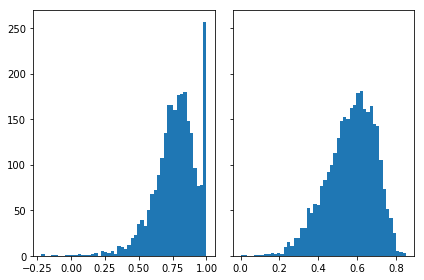

In [46]:
n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(l1, bins=n_bins)
axs[1].hist(l0, bins=n_bins)
plt.show()

In [47]:
def get_binned_data(array, num_bins):
    #input: similarity scores, number of bins
    array.sort()
    count = 0
    binned_array = []
    bins = np.linspace(0,1,num_bins)
    bin_ind = 1
    for score in array:
        if score <= bins[bin_ind]:
            count+=1
        else:
            binned_array.append(count)
            bin_ind+=1
            if score <= bins[bin_ind]:
                count = 1
            else:
                count = 0
    if count!=0:
        binned_array.append(count)
    for i in range(len(bins) - len(binned_array)):
        binned_array.append(0)
    
    return bins, binned_array

In [48]:
label1_scores = [score for score in label1_scores if score >=0 and score <=1]
print(np.mean(label1_scores))
print(np.var(label1_scores))
x,y = get_binned_data(label1_scores, 50)
x = x[30:-2]
y = y[30:-2]

0.76586765
0.02288837


/Users/vibhavagarwal/miniconda2/envs/dl_torch_py2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


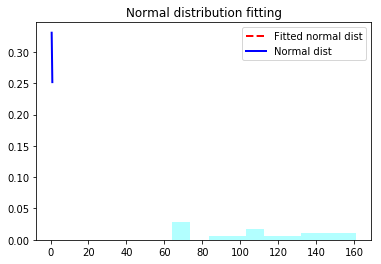

In [49]:
from scipy.stats import norm

parameters  = norm.fit(y)

fitted_pdf = norm.pdf(x, loc = parameters[0], scale = parameters[1])
normal_pdf = norm.pdf(x)
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(y,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
# insert a legend in the plot (using label)
plt.legend()

# we finally show our work
plt.show()


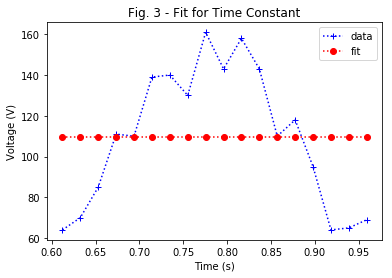

In [50]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = ar(x)
y = ar(y)

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()